<a href="https://colab.research.google.com/github/svenschultze/Lidar-Localization-DL/blob/main/notebooks/network_activations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget -q http://dev.sschultze.de:9999/residual_gazebo.h5
! pip install -q git+https://github.com/svenschultze/Lidar-Localization-DL

In [2]:
import os
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model

import lldl

# Load LiDAR sample

In [3]:
x, y = lldl.dataset.load("gazebo")

Loading LiDAR data...


100%|██████████| 12/12 [00:06<00:00,  1.98it/s]


Loading coordinate data...


100%|██████████| 12/12 [00:00<00:00, 13.61it/s]


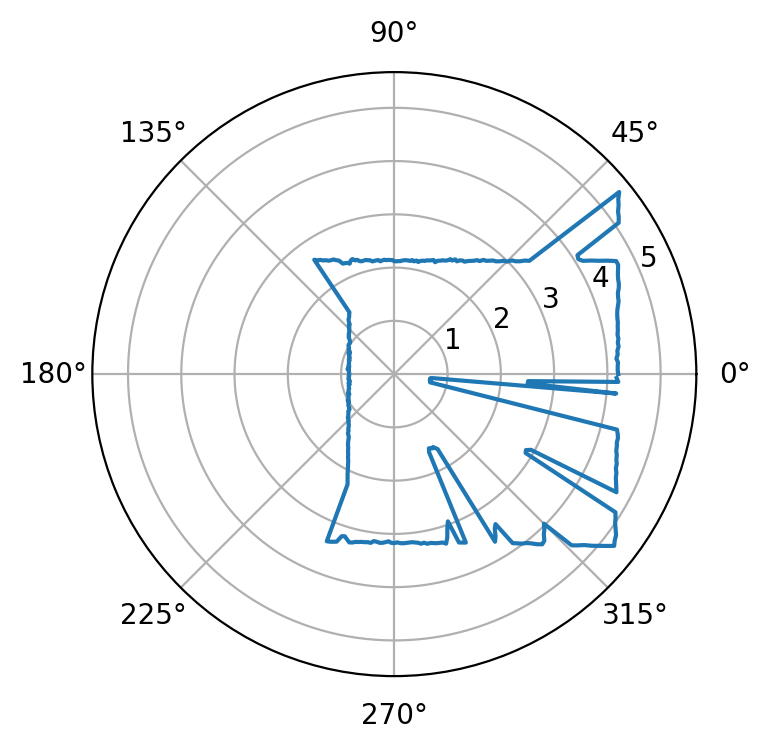

In [4]:
plt.figure(dpi=200)
plt.polar(np.radians(np.flip(np.arange(0, 360, 360 / len(x[0])))), x[0])
plt.show()

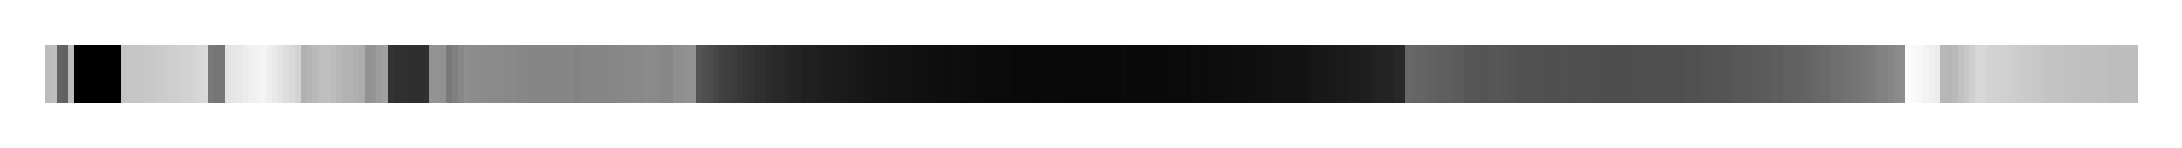

In [5]:
plt.figure(dpi=450)
plt.axis("off")
plt.imshow(np.transpose(np.hstack([x[0]]*10)), "gray")
plt.show()

# Load architecture and weights

In [6]:
model = lldl.model.load("residual")
model.load_weights("residual_gazebo.h5")

# Visualize hidden activations

input_1 (360,)


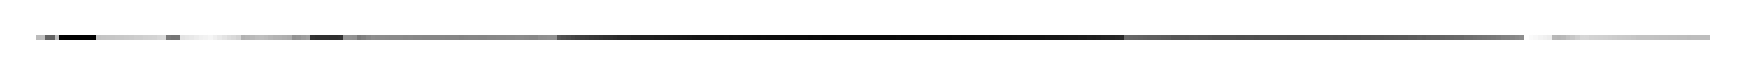

lambda (380,)


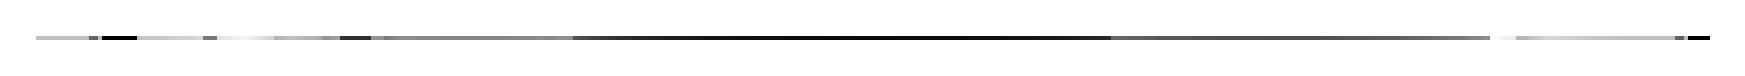

conv1d (360, 16)


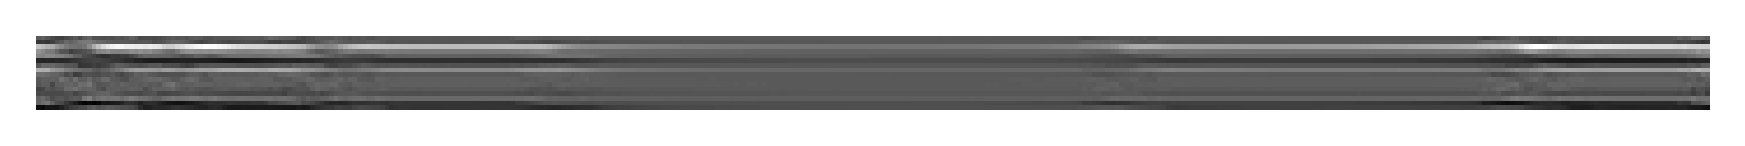

batch_normalization (360, 16)


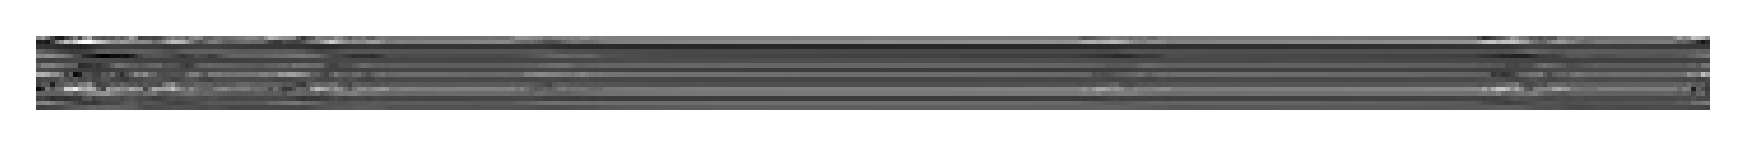

re_lu (360, 16)


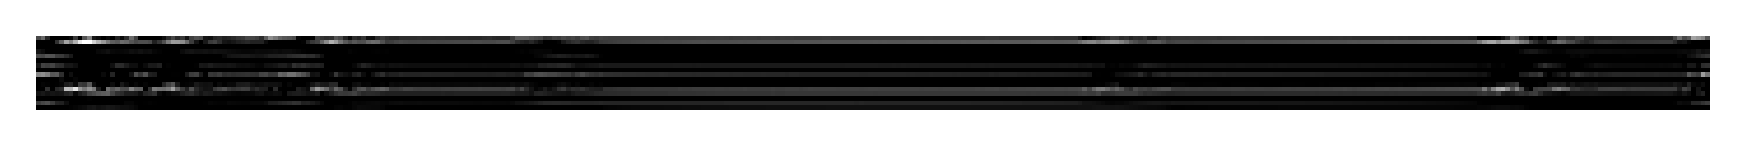

lambda_1 (380, 16)


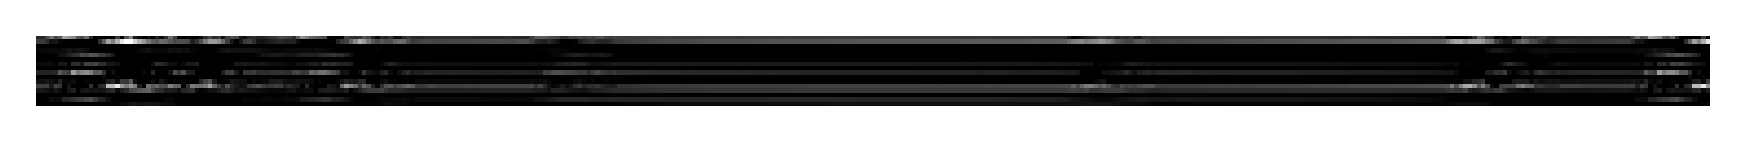

conv1d_1 (360, 16)


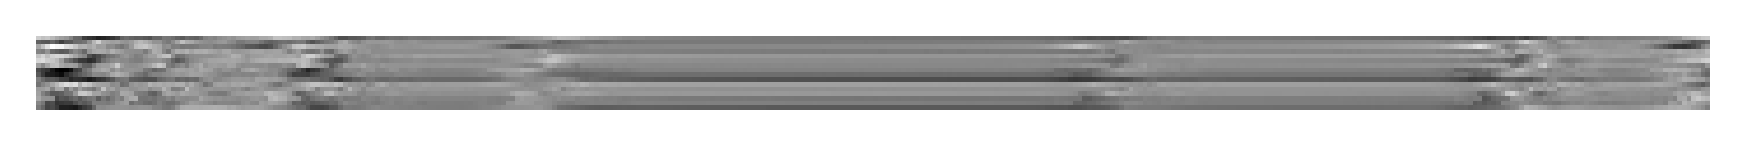

batch_normalization_1 (360, 16)


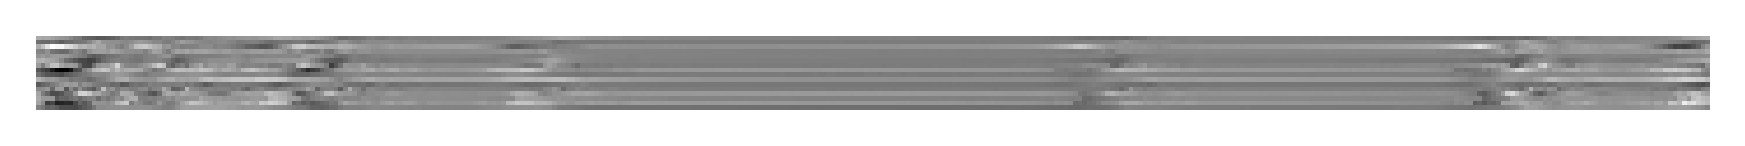

re_lu_1 (360, 16)


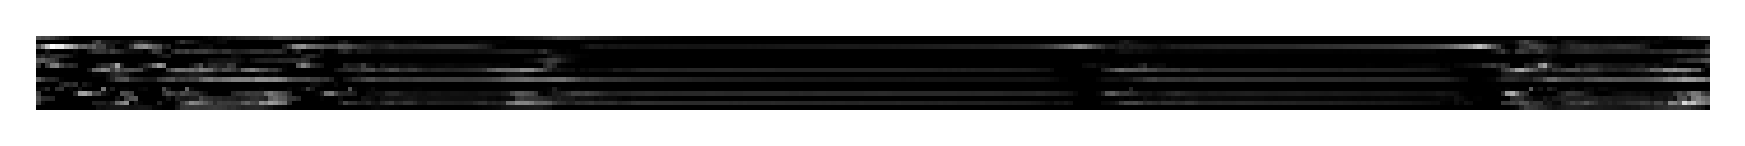

max_pooling1d (180, 16)


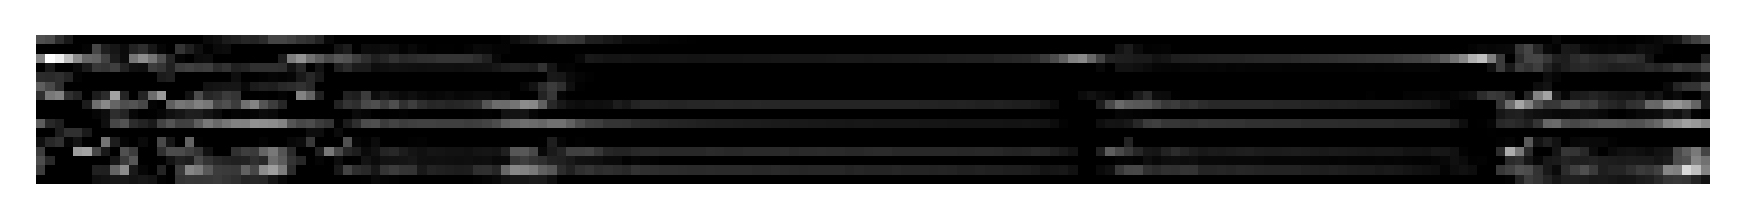

lambda_2 (188, 16)


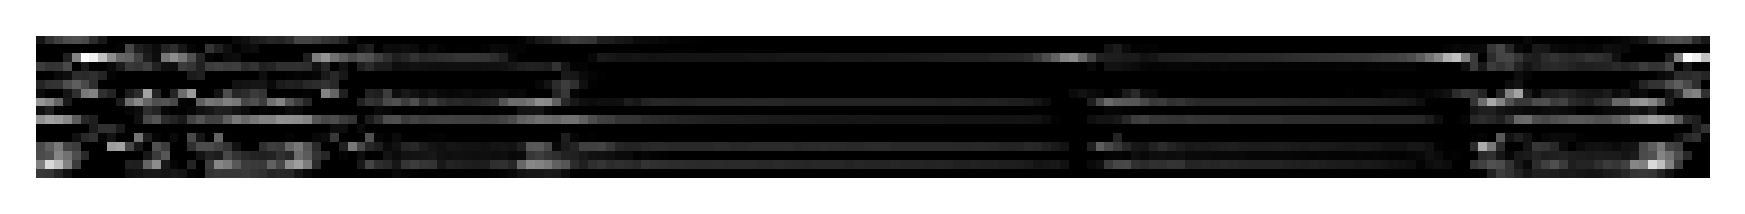

conv1d_2 (180, 16)


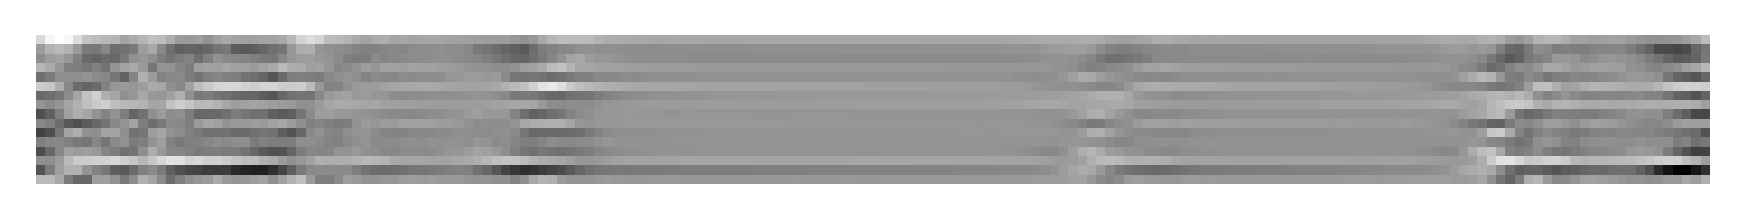

batch_normalization_2 (180, 16)


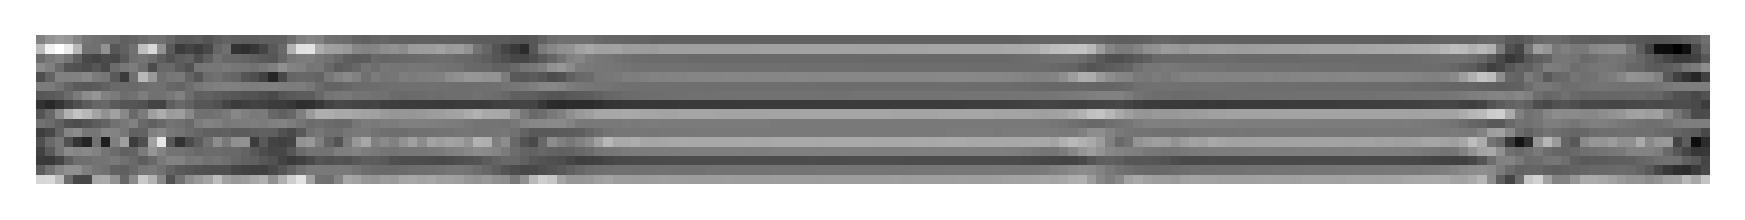

re_lu_2 (180, 16)


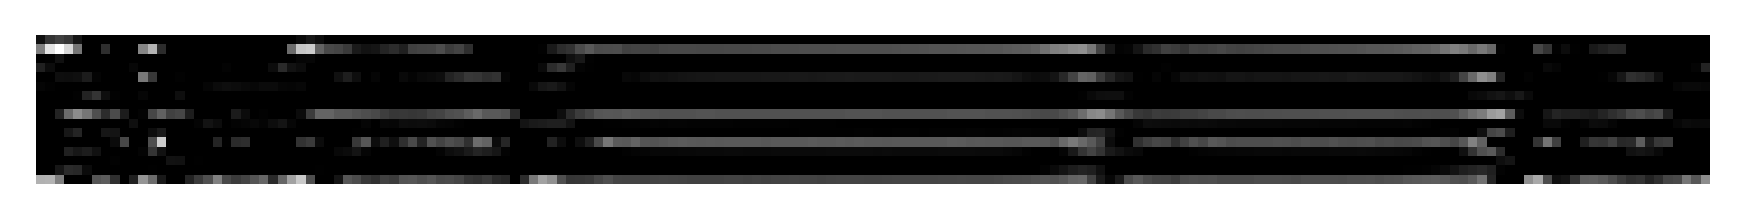

lambda_3 (188, 16)


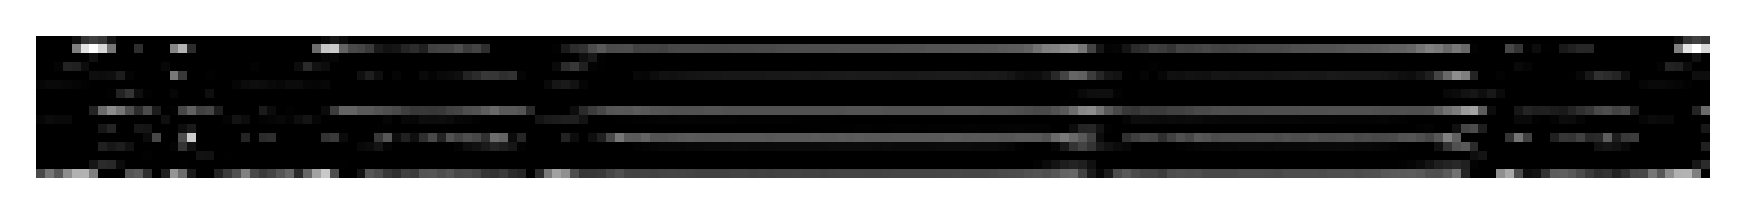

conv1d_3 (180, 16)


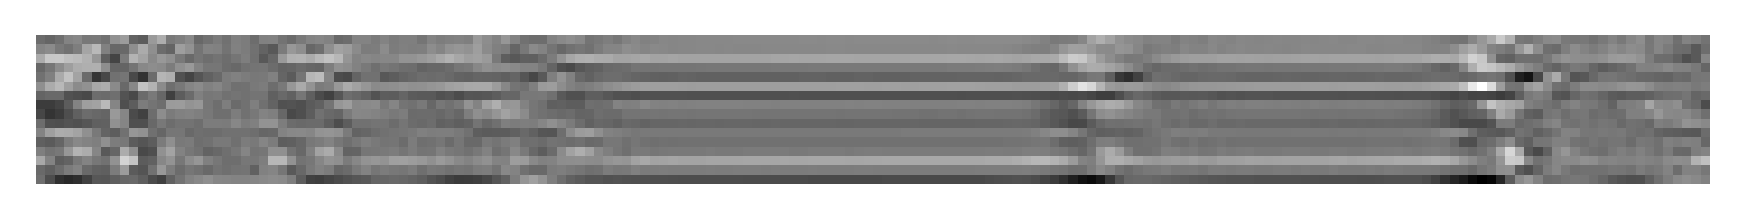

batch_normalization_3 (180, 16)


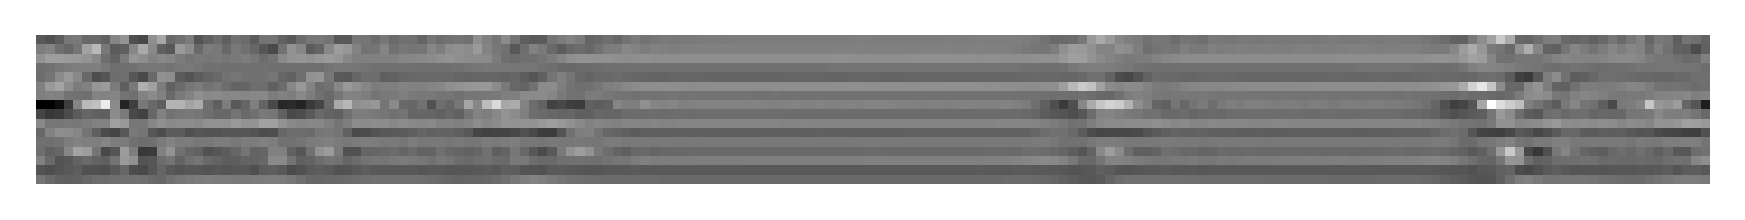

add (180, 16)


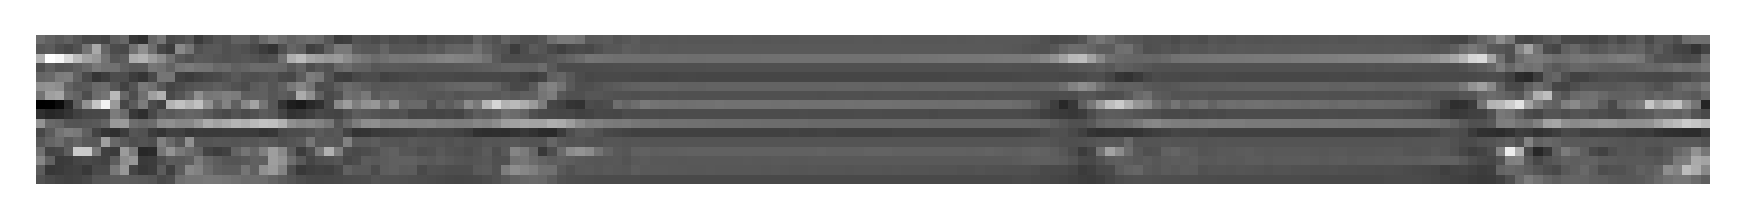

re_lu_3 (180, 16)


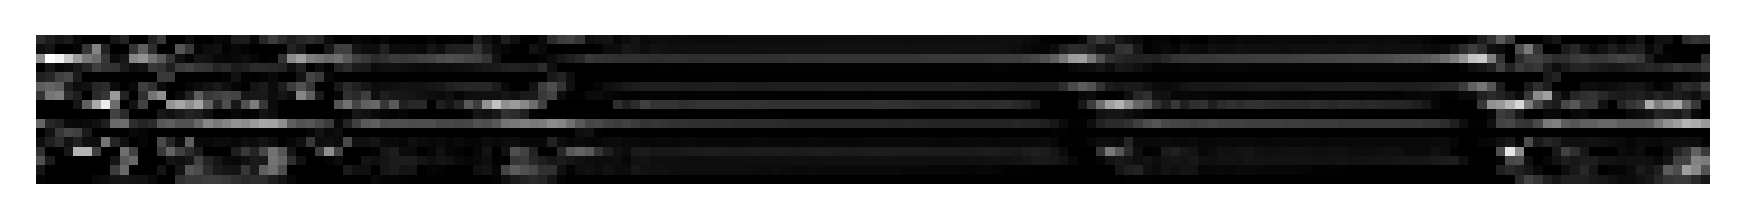

lambda_4 (188, 16)


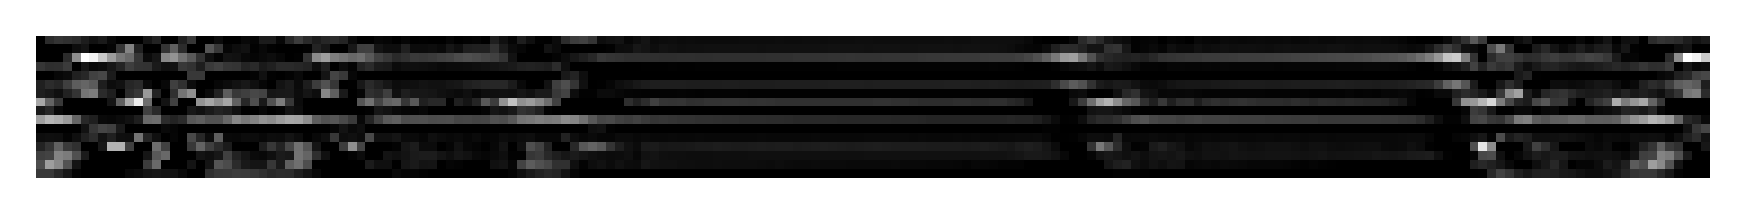

conv1d_4 (180, 16)


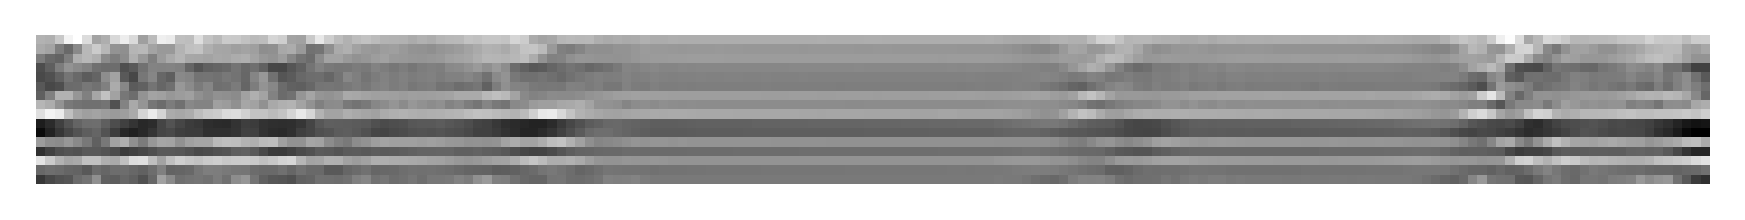

batch_normalization_4 (180, 16)


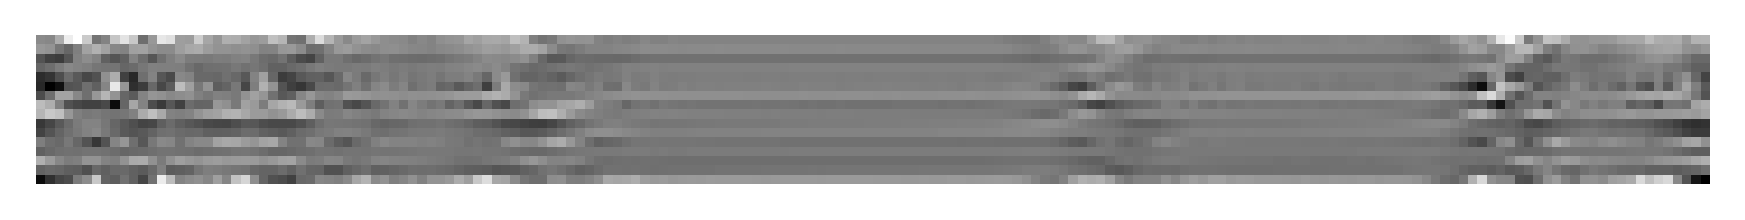

re_lu_4 (180, 16)


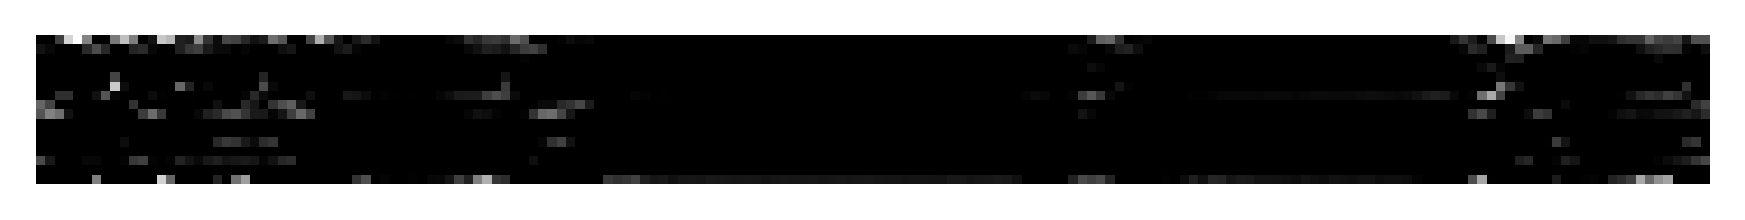

lambda_5 (188, 16)


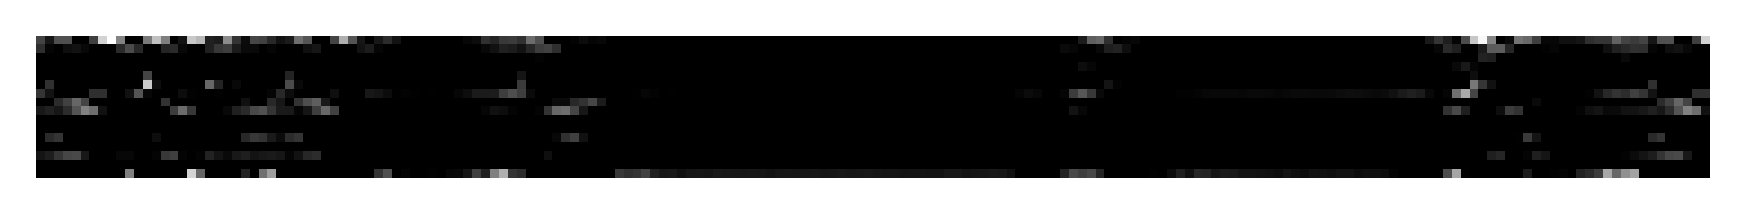

conv1d_5 (180, 16)


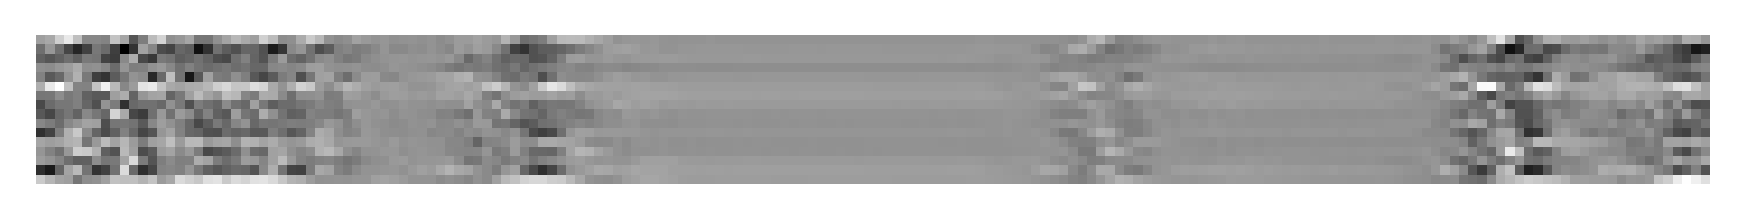

batch_normalization_5 (180, 16)


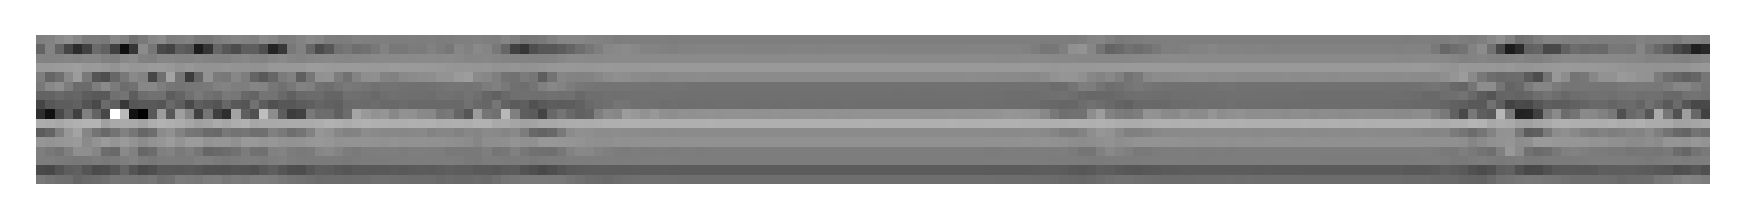

add_1 (180, 16)


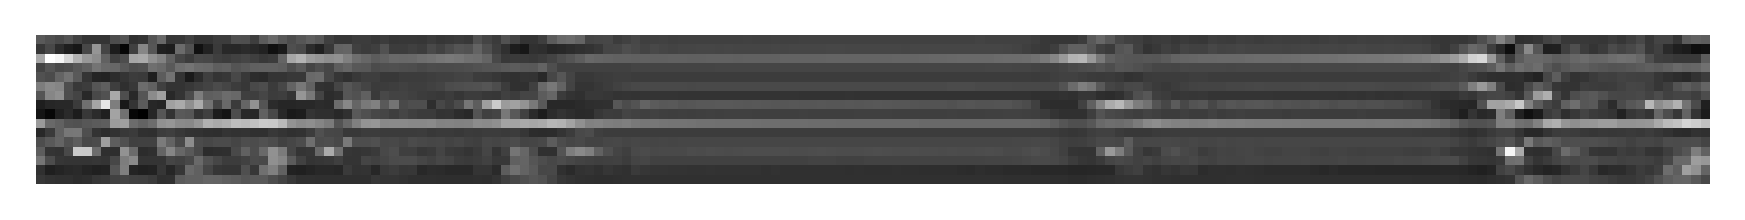

re_lu_5 (180, 16)


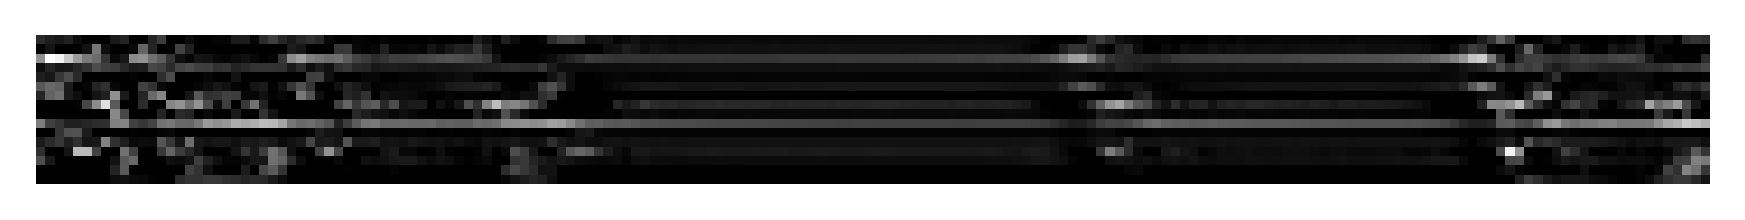

lambda_6 (188, 16)


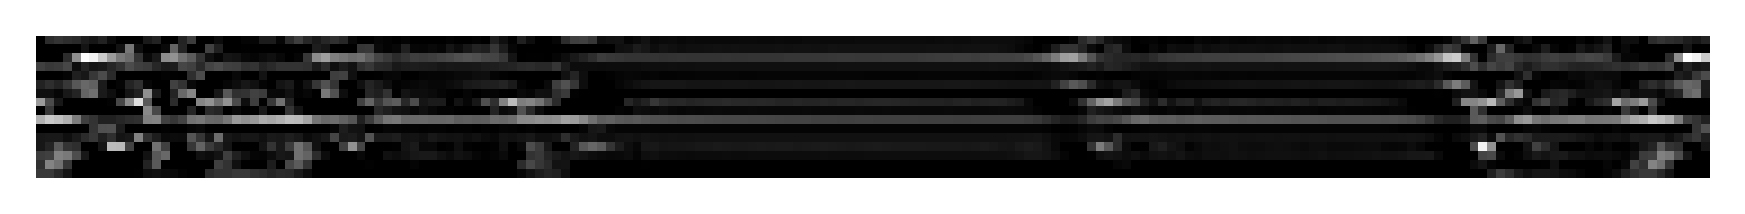

conv1d_6 (180, 16)


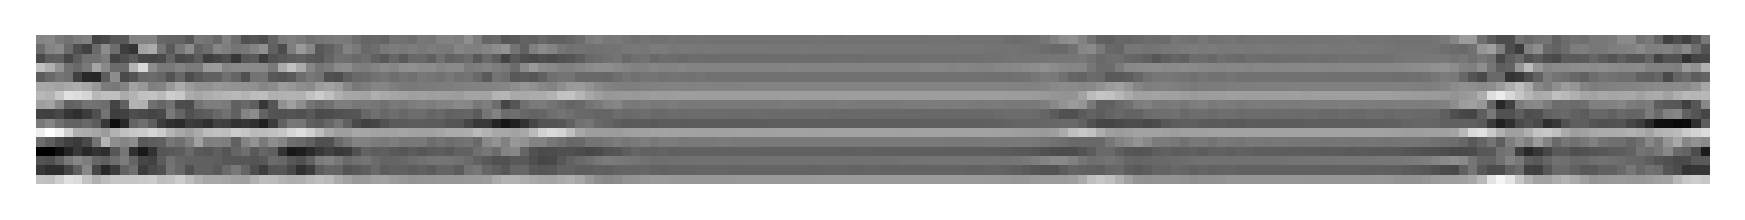

batch_normalization_6 (180, 16)


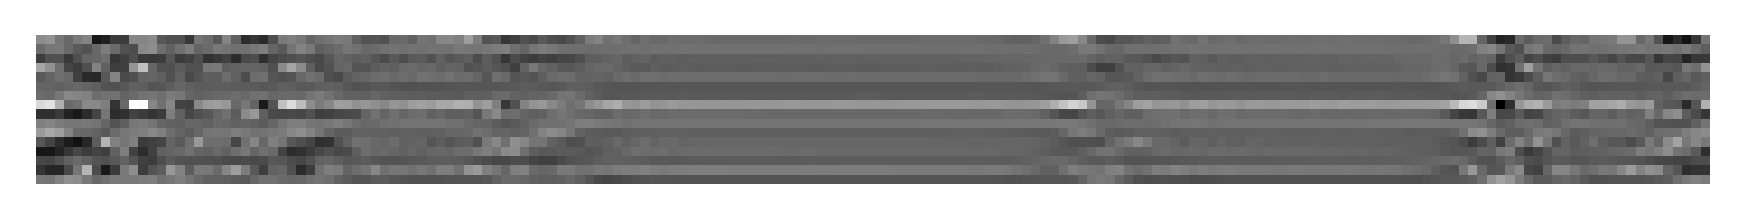

re_lu_6 (180, 16)


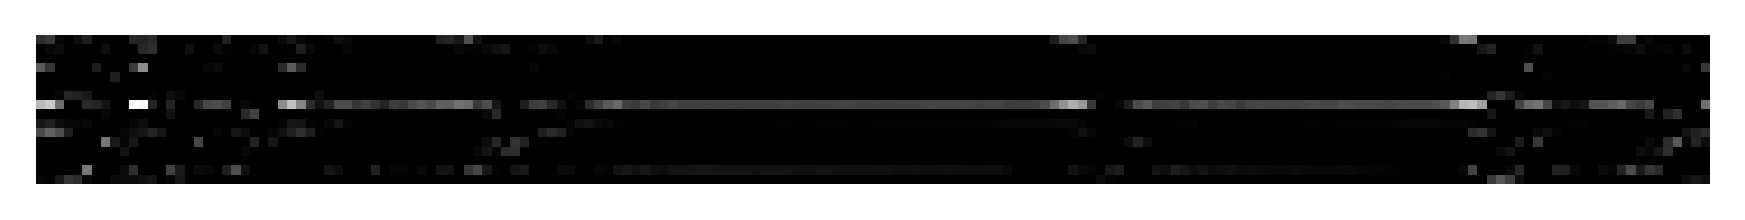

lambda_7 (188, 16)


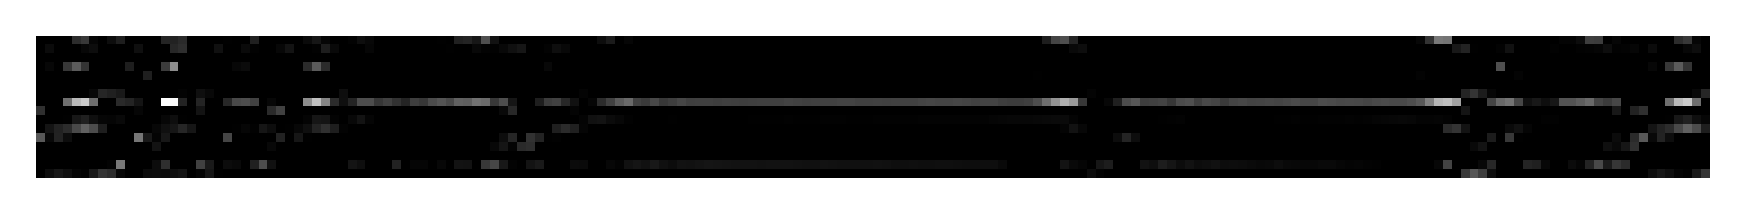

conv1d_7 (180, 16)


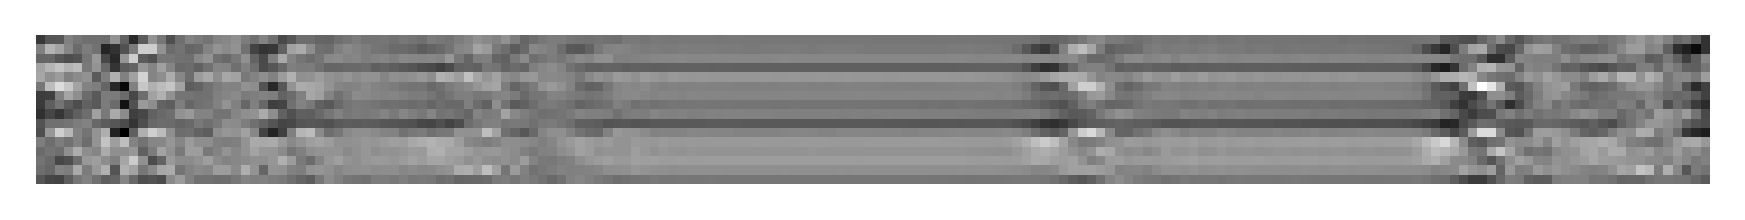

batch_normalization_7 (180, 16)


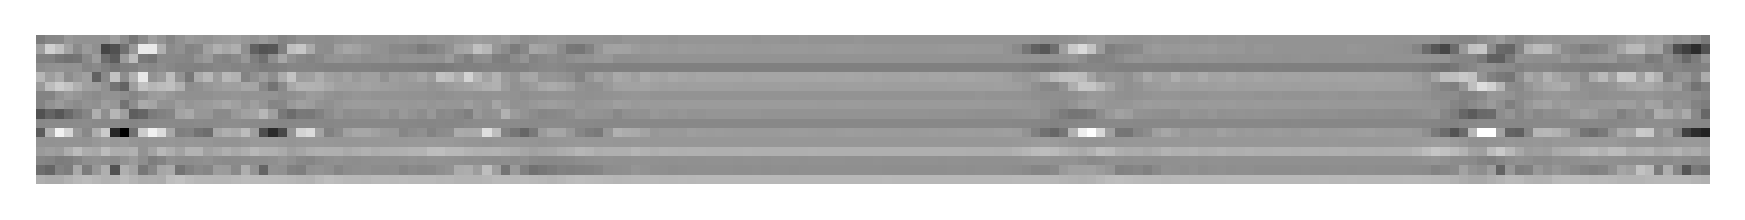

add_2 (180, 16)


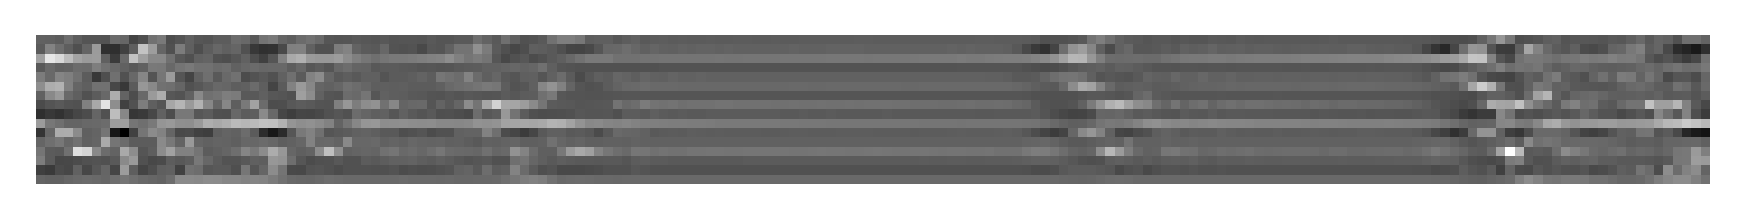

re_lu_7 (180, 16)


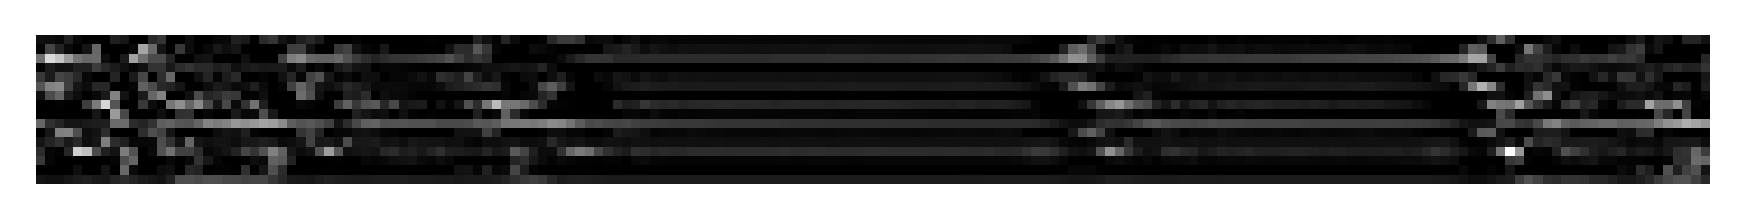

max_pooling1d_1 (90, 16)


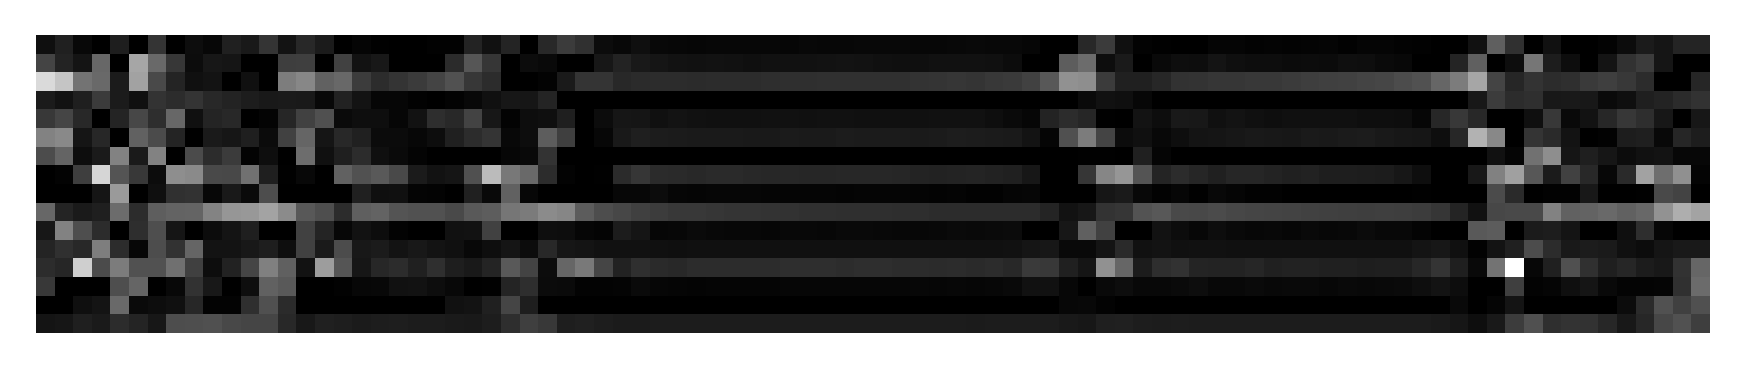

lambda_8 (98, 16)


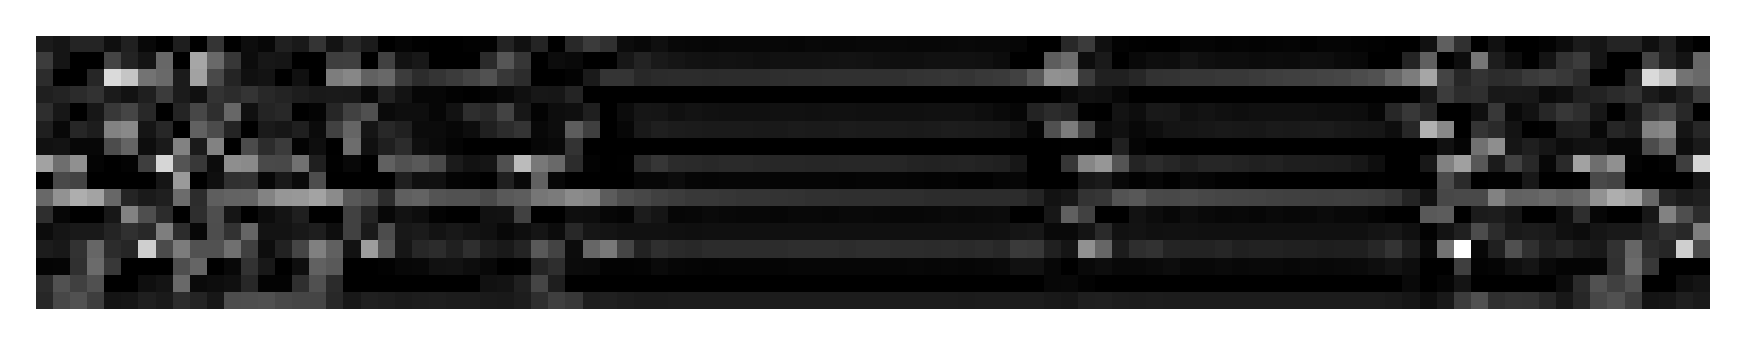

conv1d_8 (90, 32)


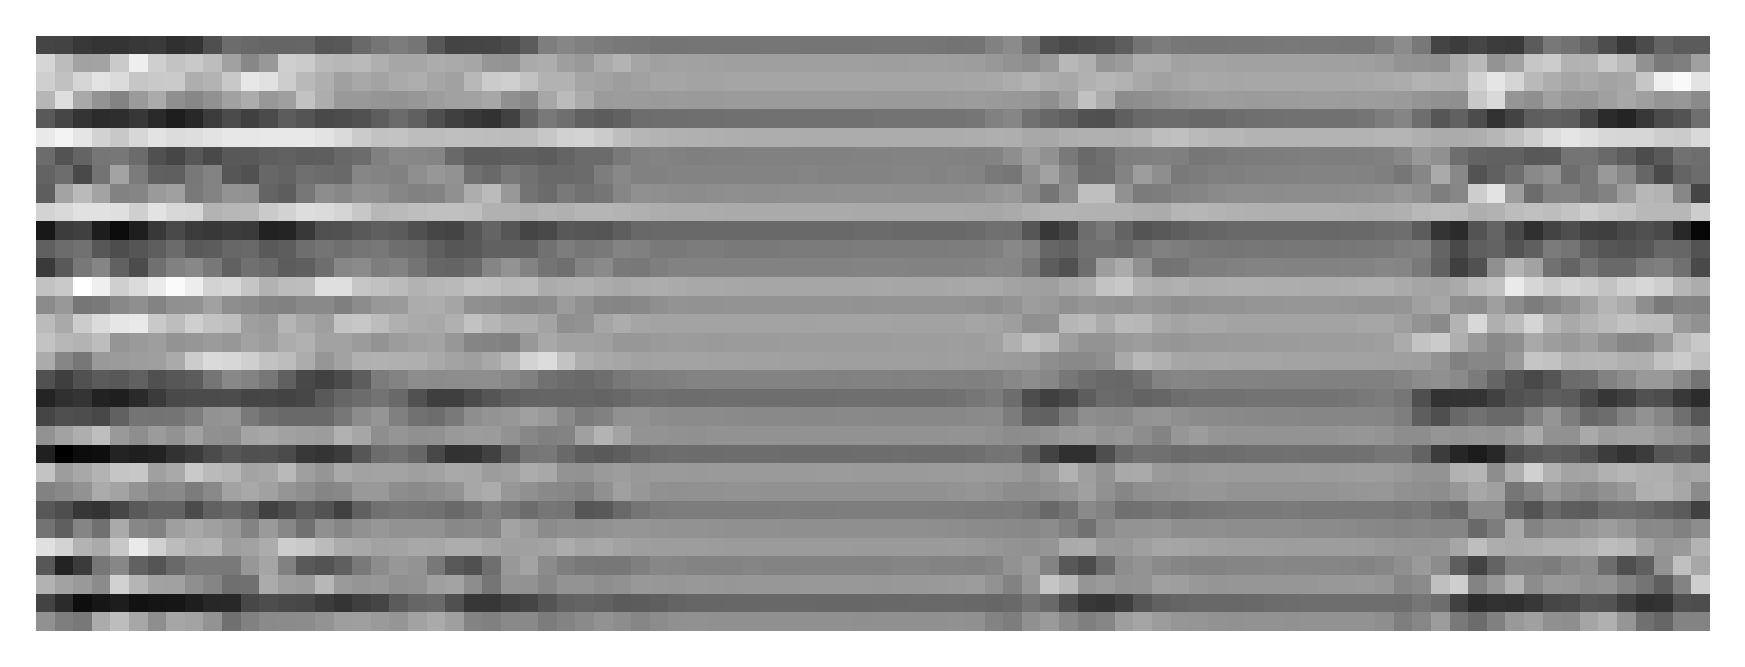

batch_normalization_8 (90, 32)


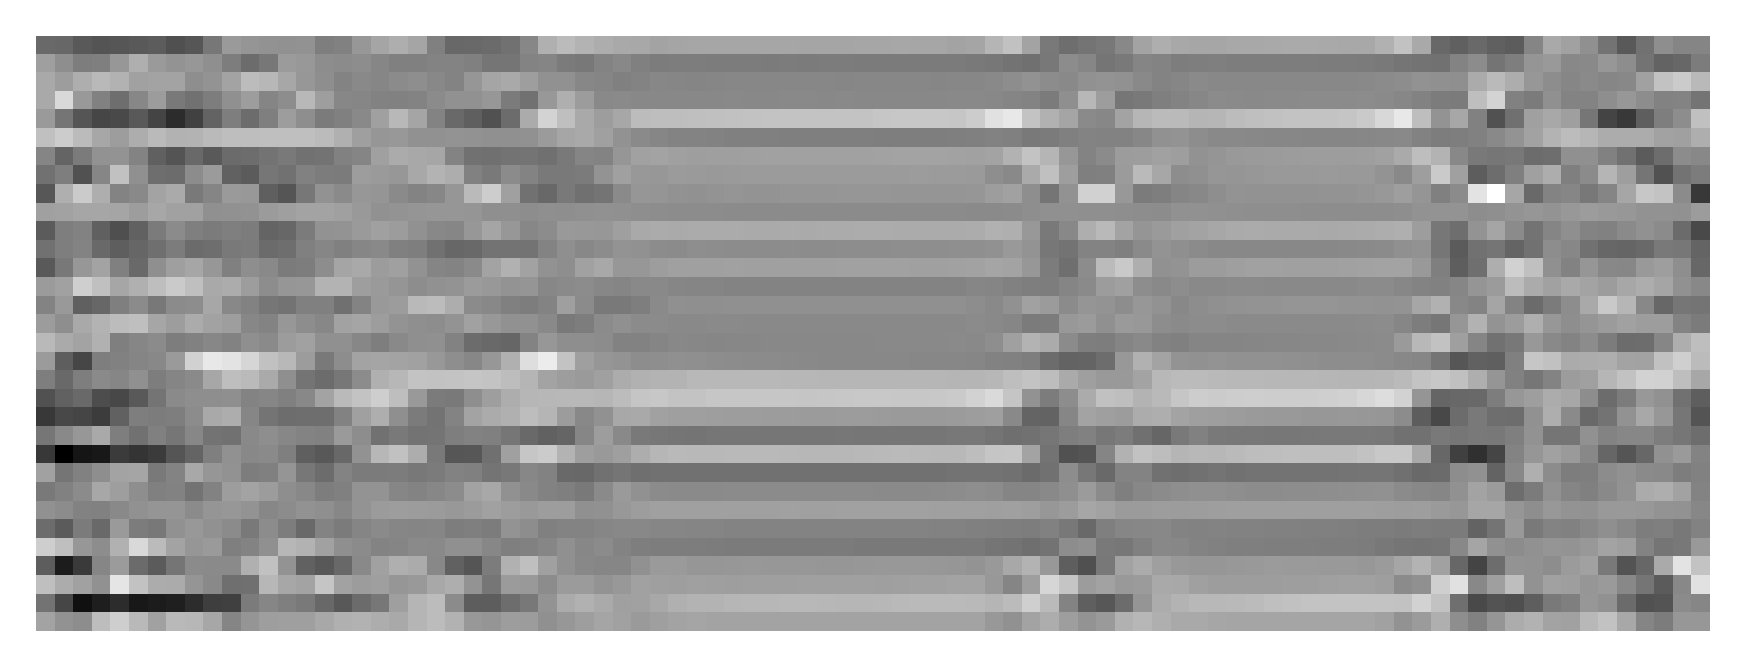

re_lu_8 (90, 32)


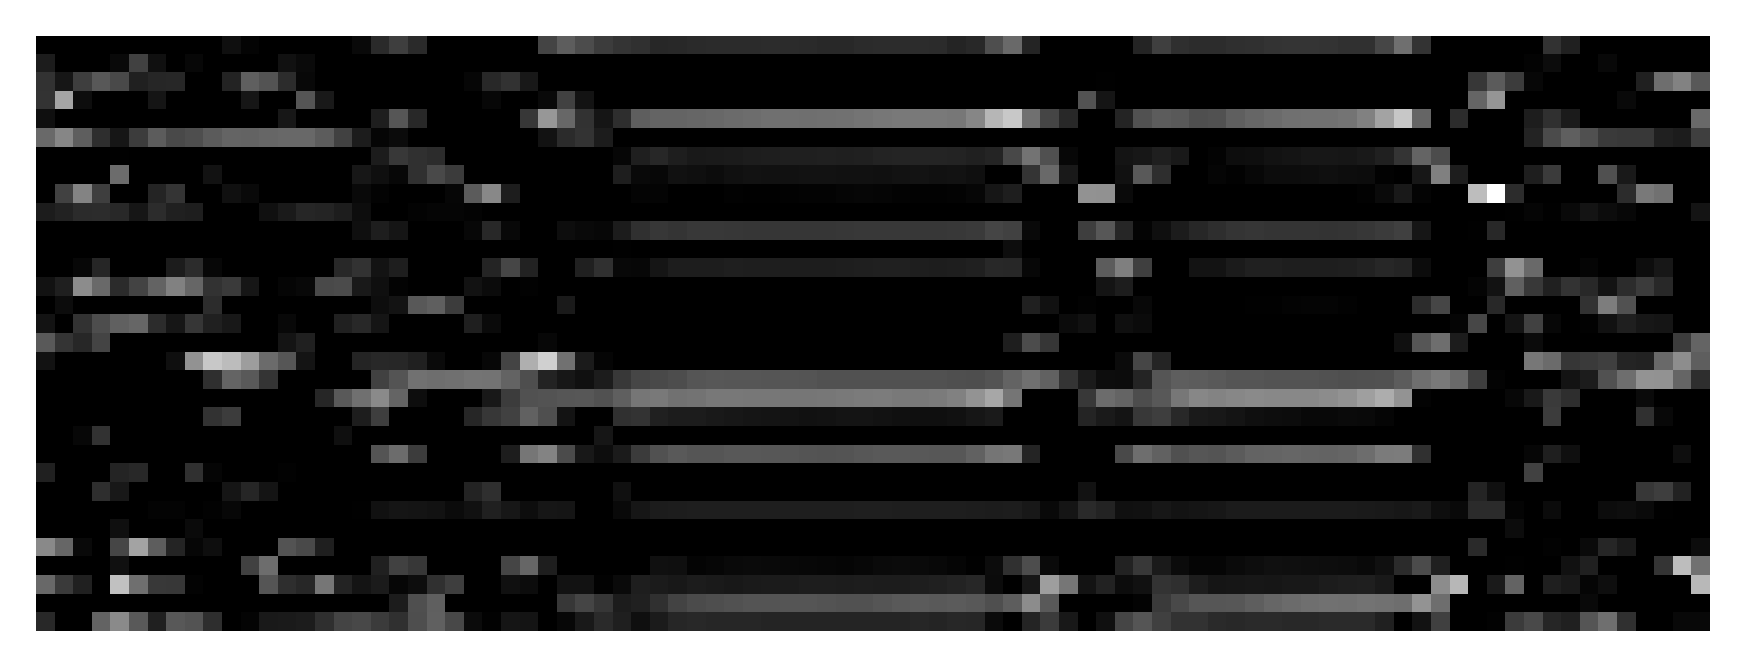

lambda_9 (98, 32)


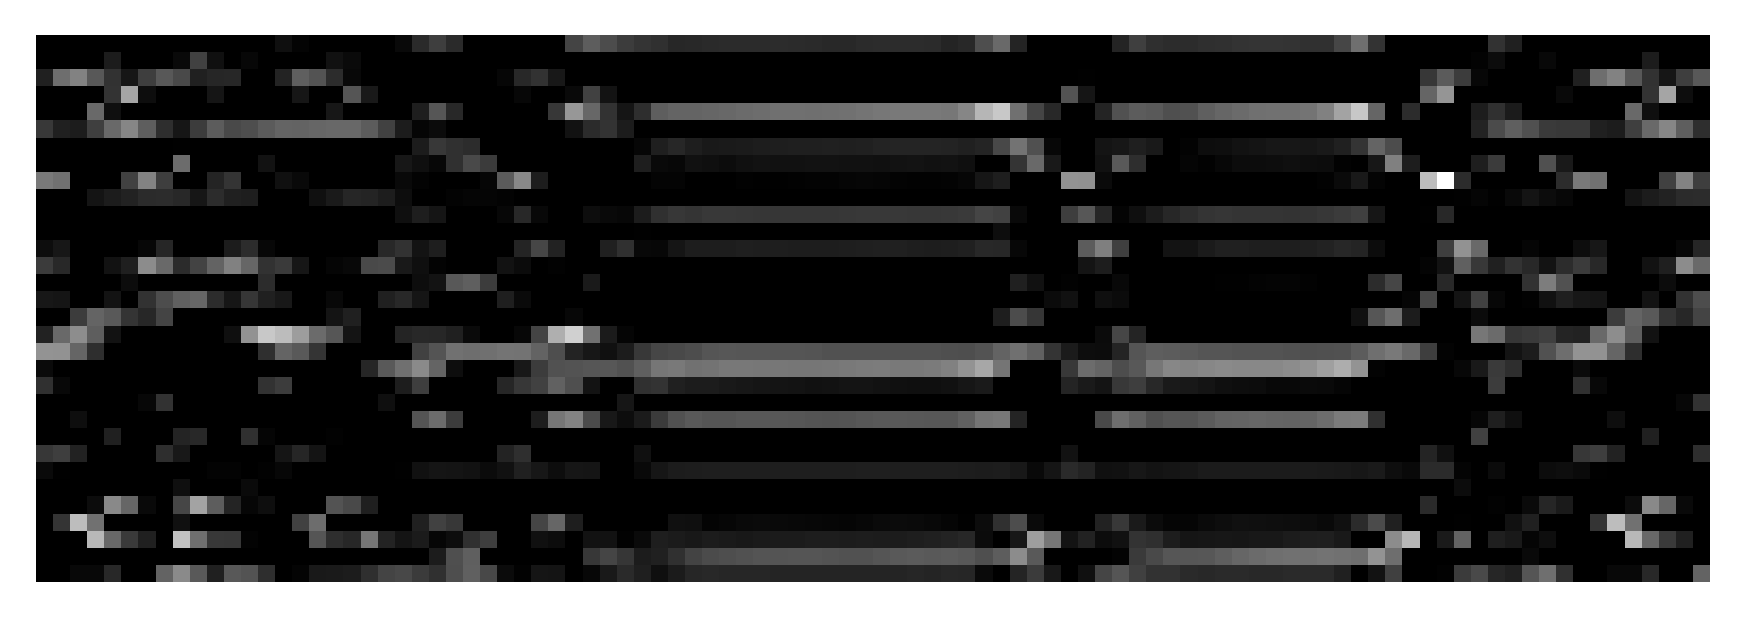

conv1d_9 (90, 32)


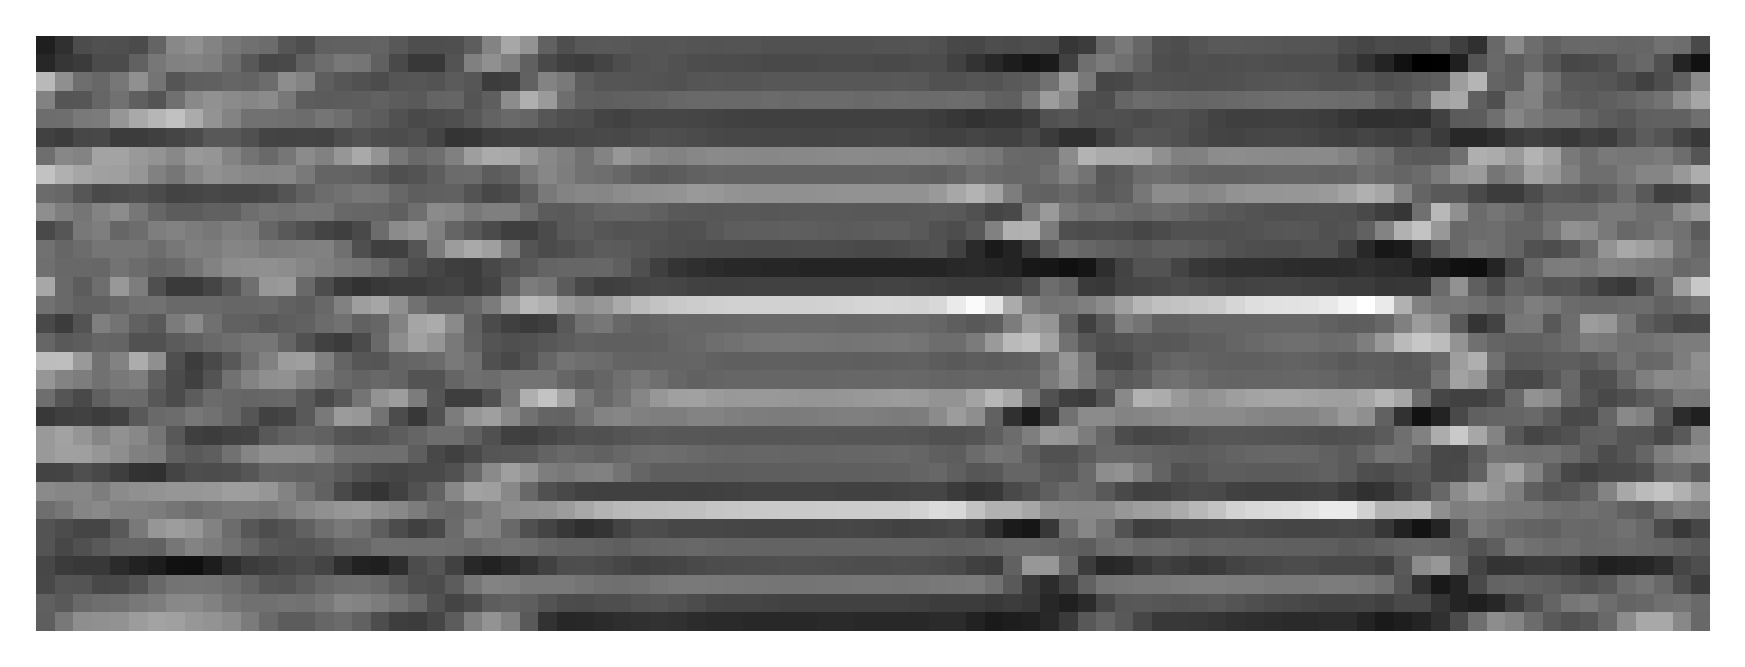

batch_normalization_9 (90, 32)


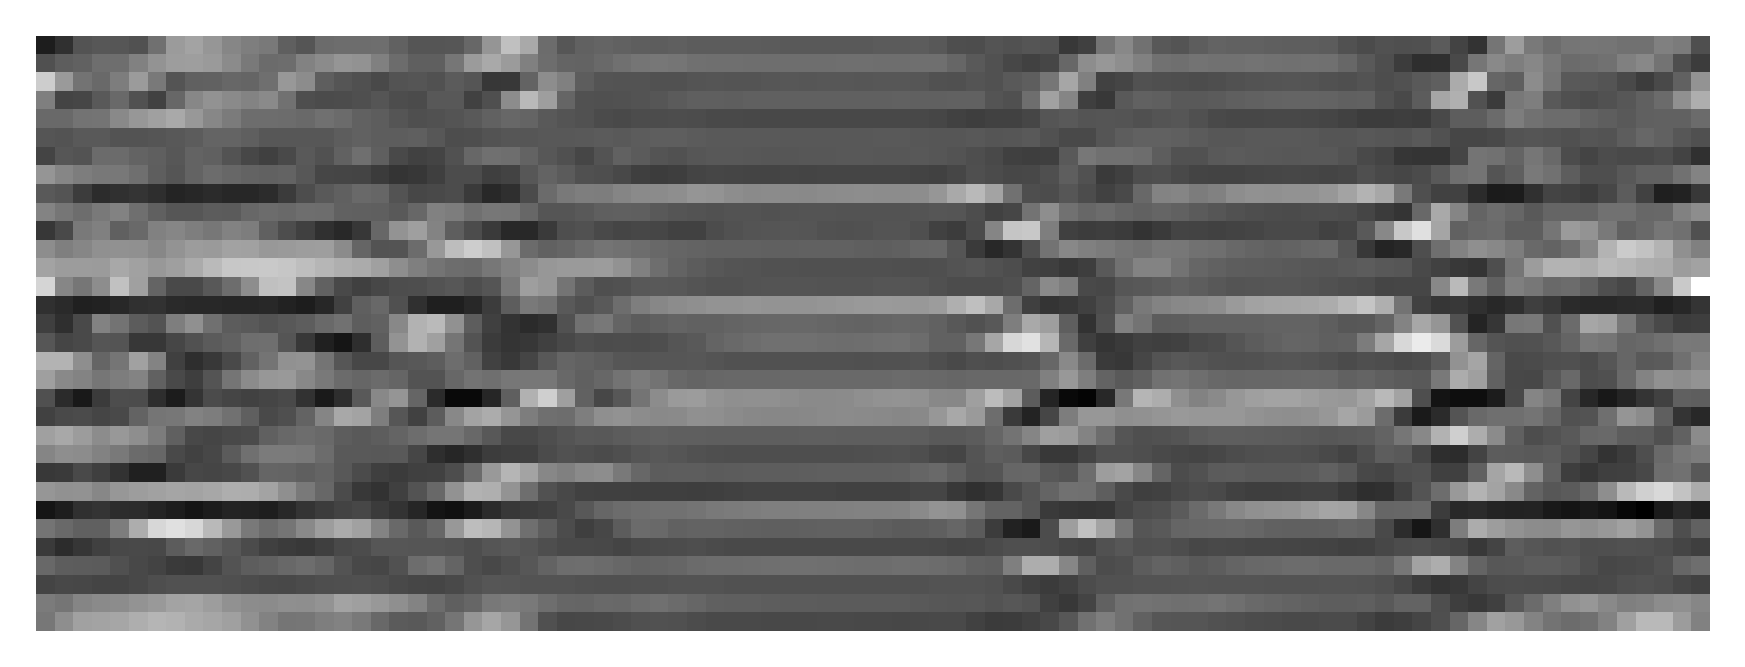

re_lu_9 (90, 32)


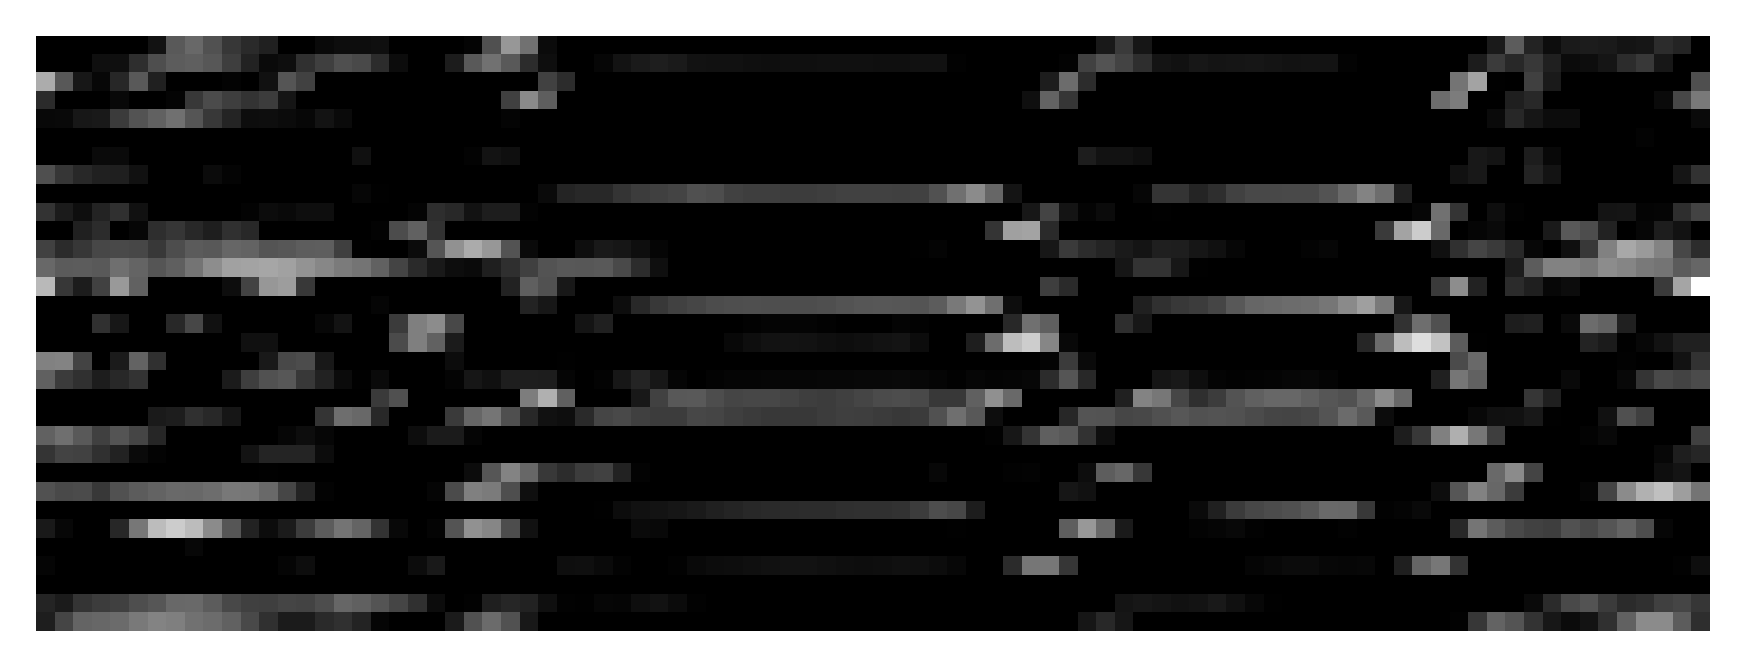

lambda_10 (98, 32)


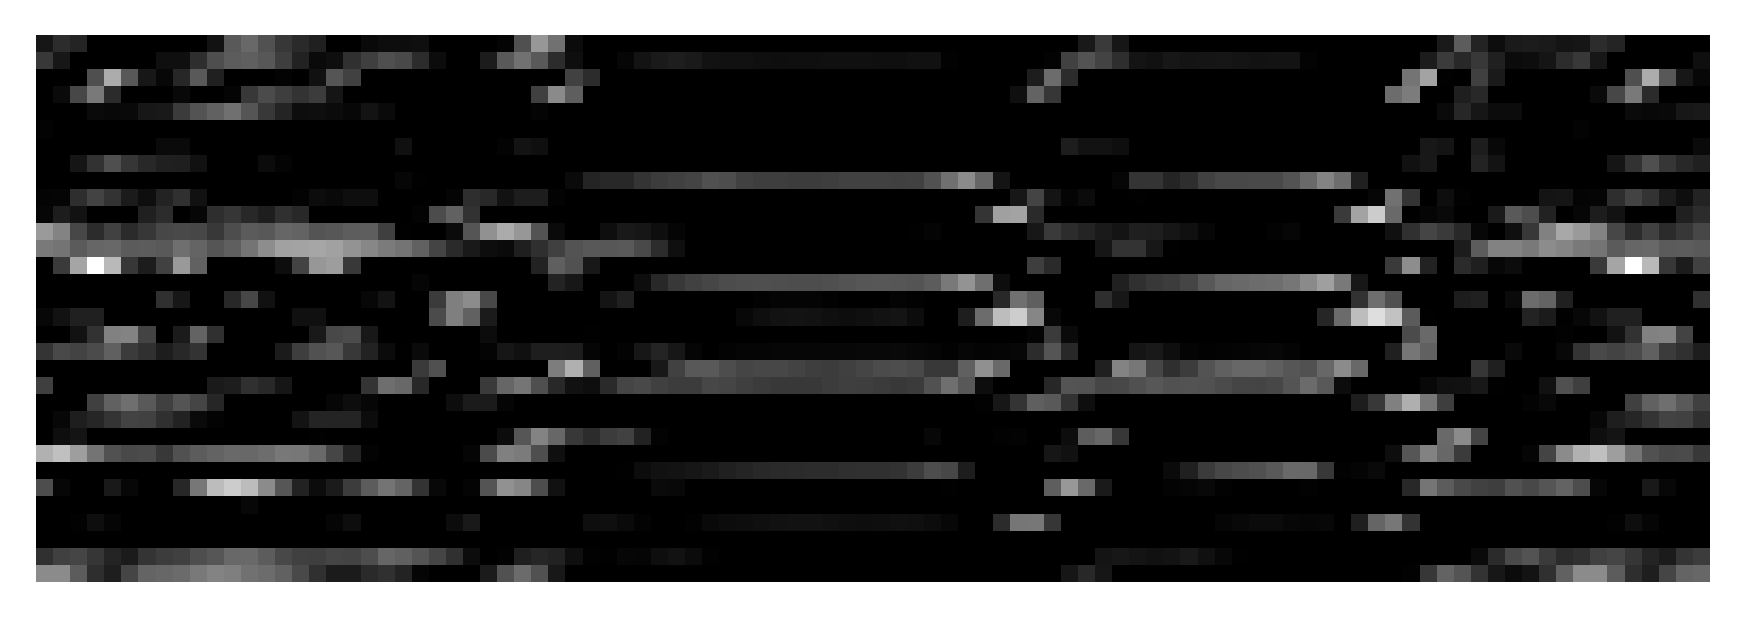

conv1d_10 (90, 32)


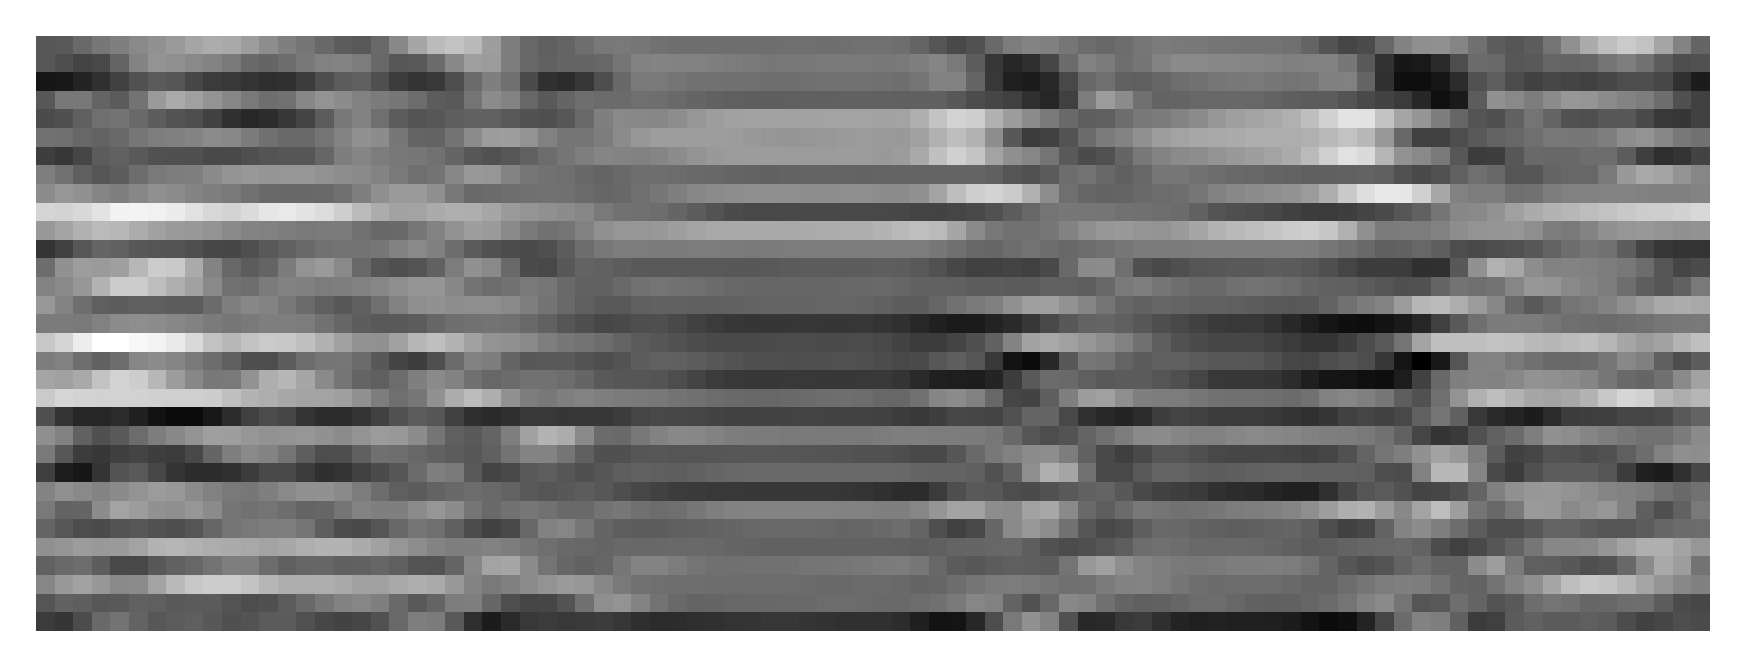

batch_normalization_10 (90, 32)


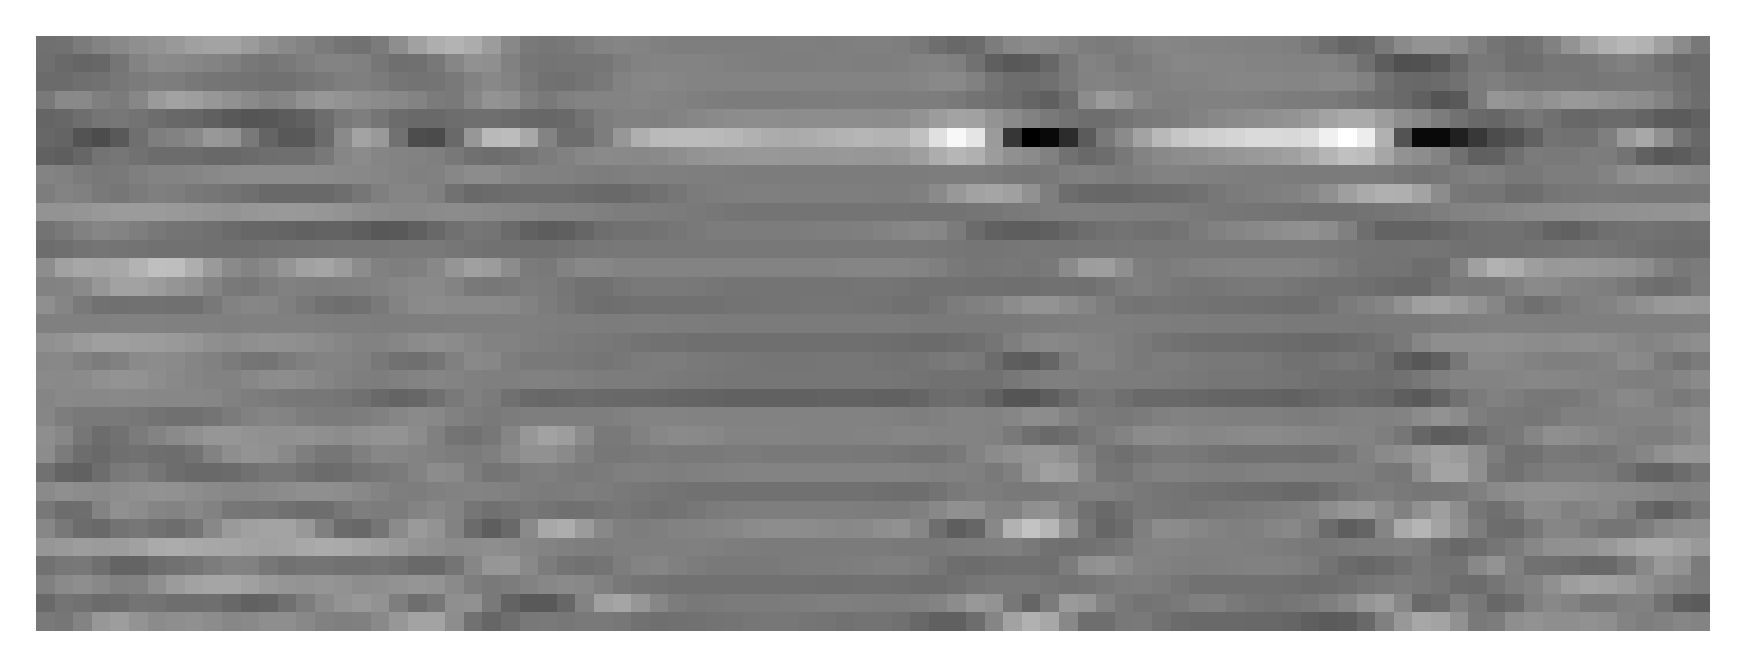

re_lu_10 (90, 32)


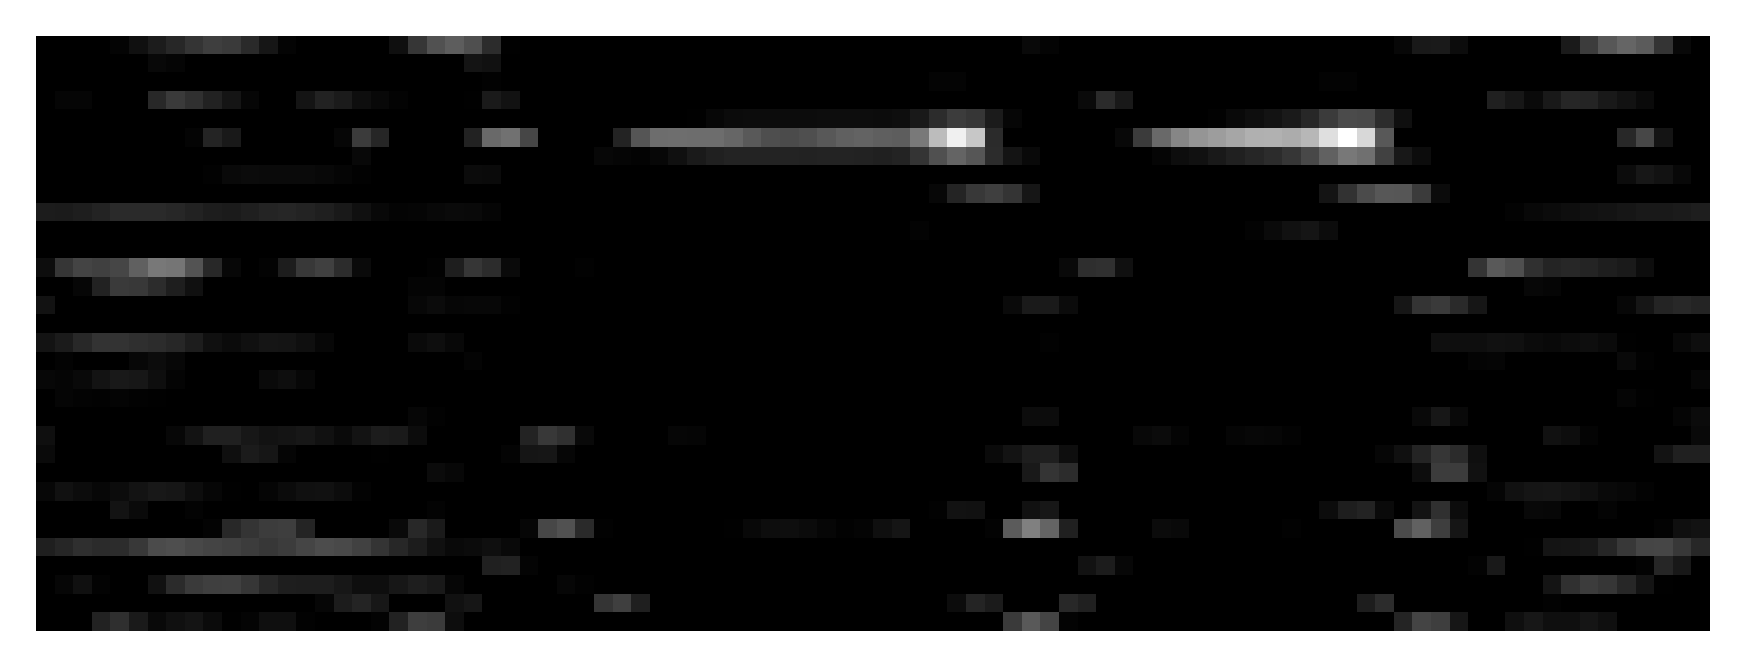

lambda_11 (98, 32)


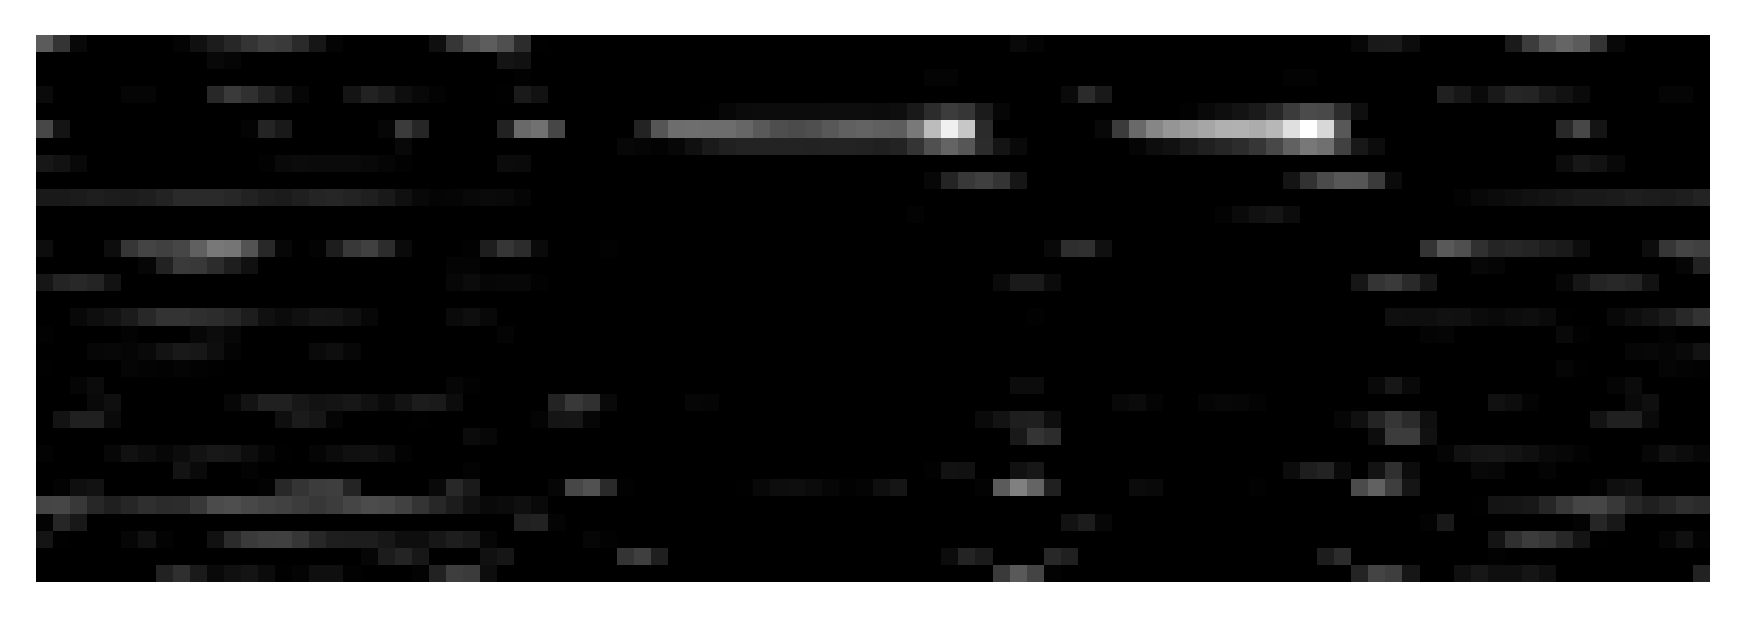

conv1d_11 (90, 32)


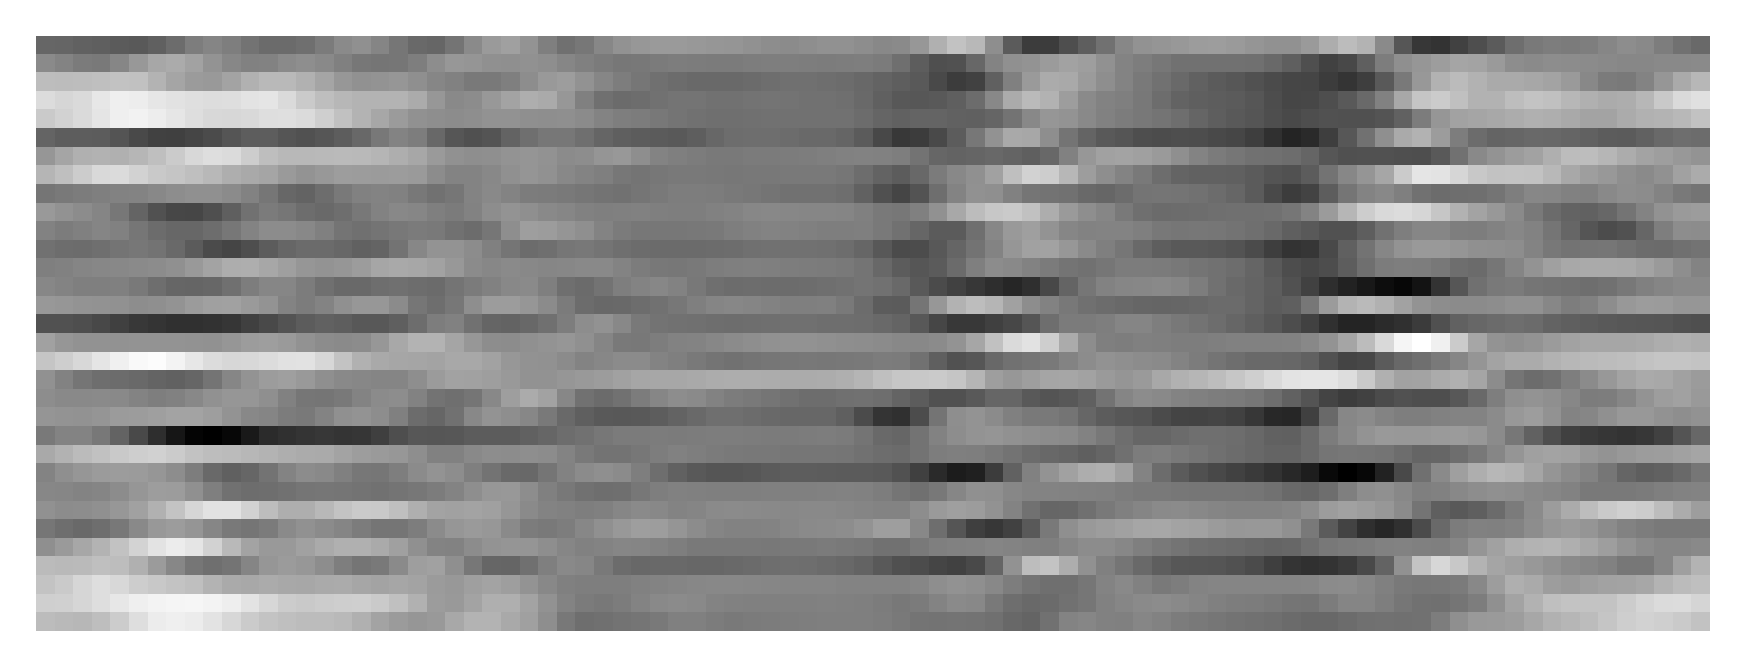

batch_normalization_11 (90, 32)


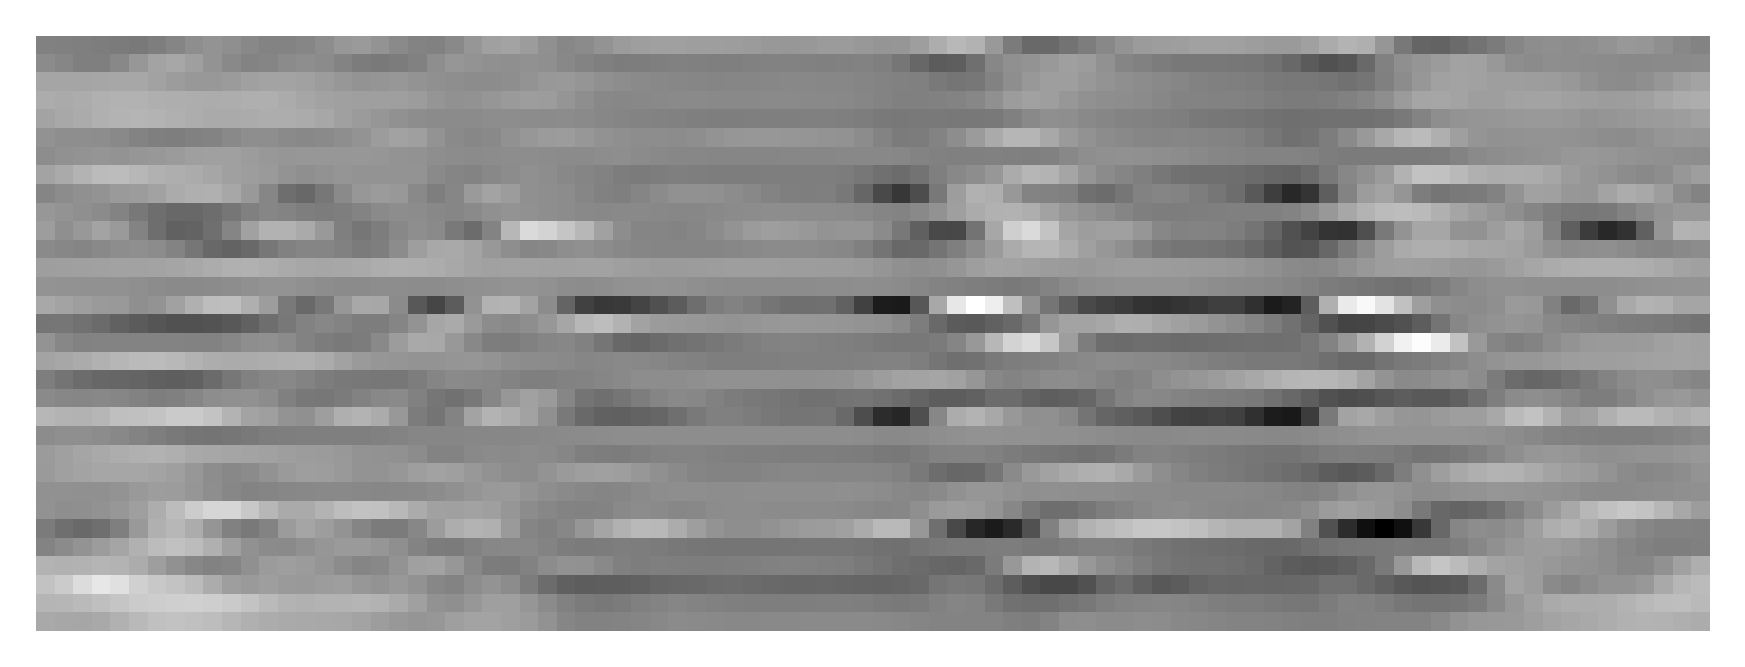

add_3 (90, 32)


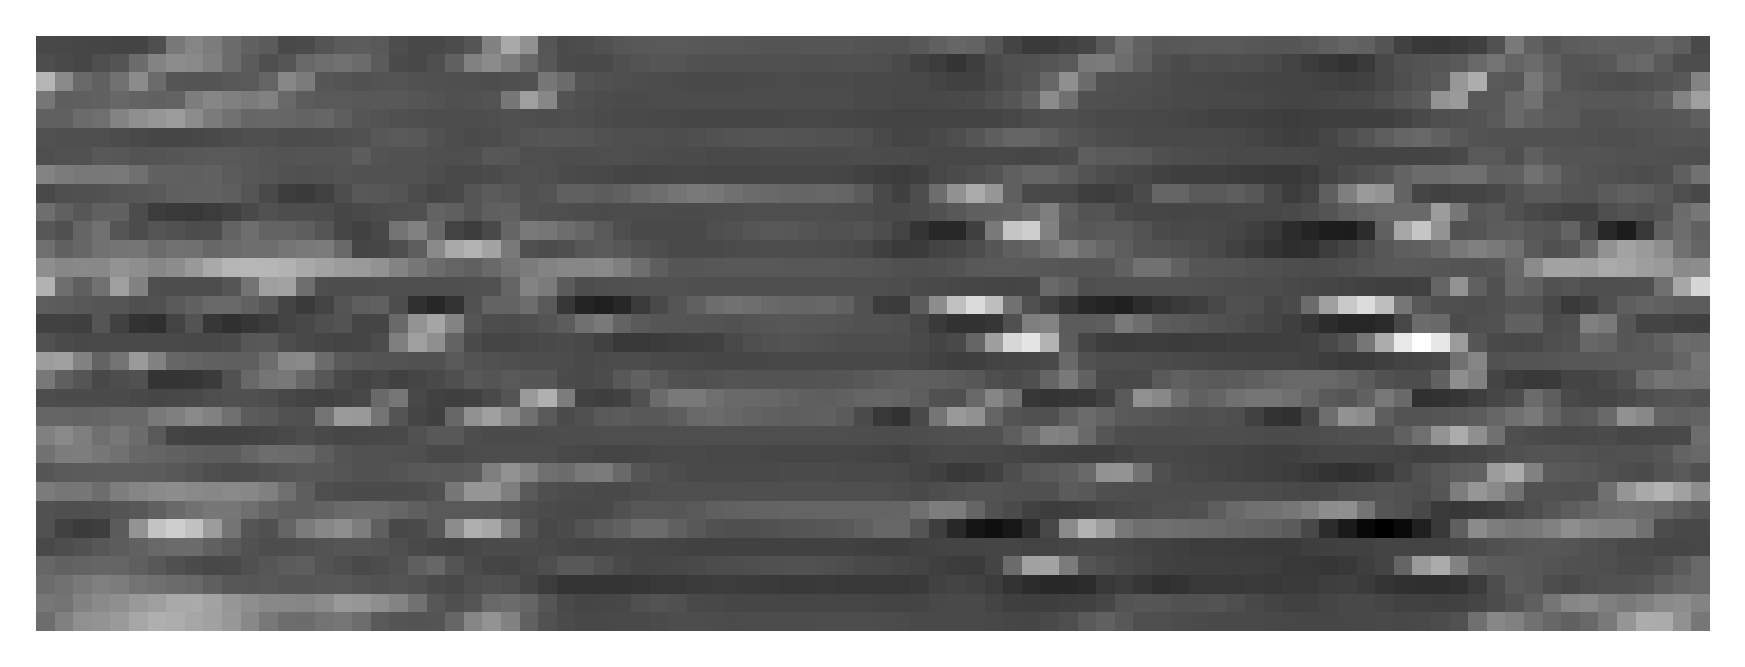

re_lu_11 (90, 32)


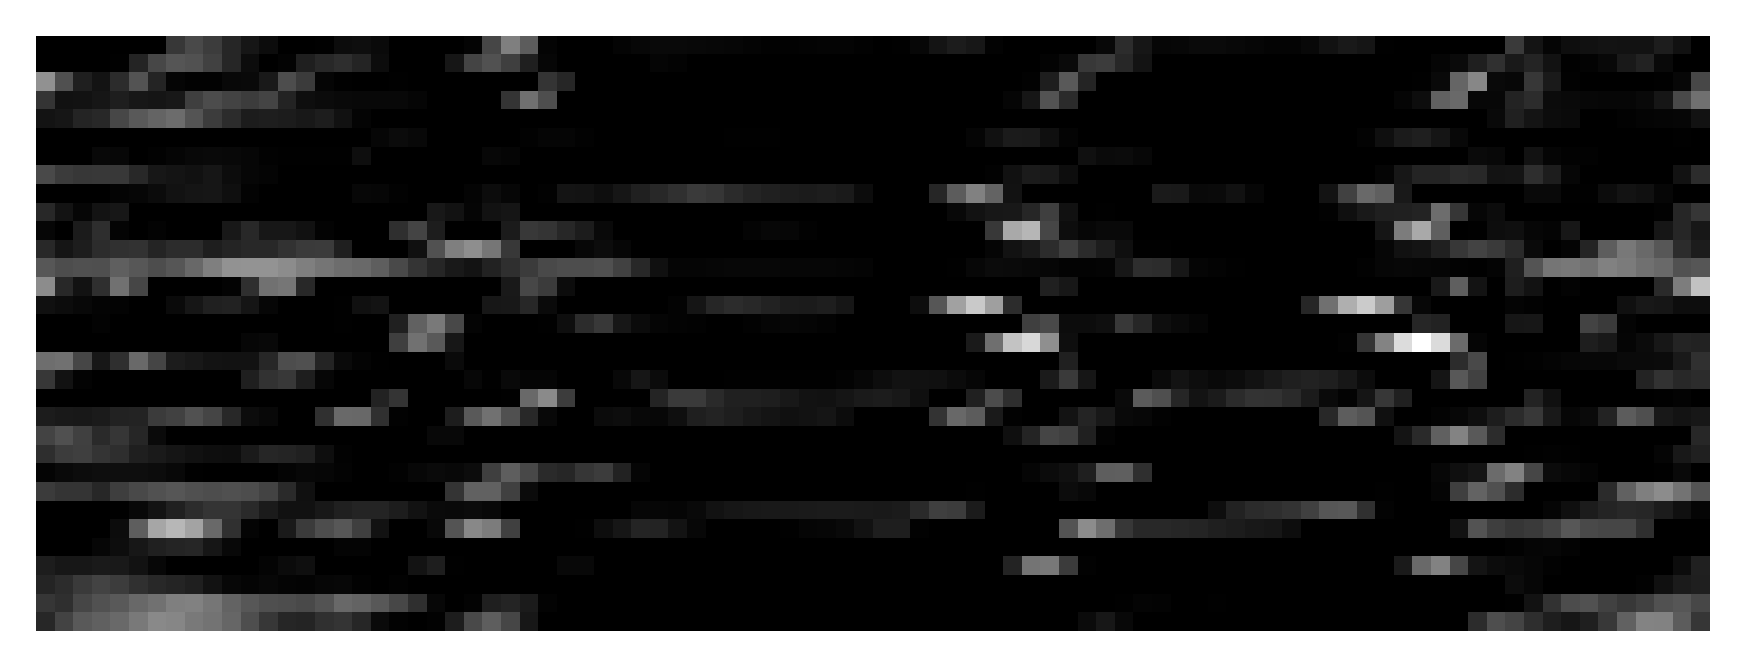

lambda_12 (98, 32)


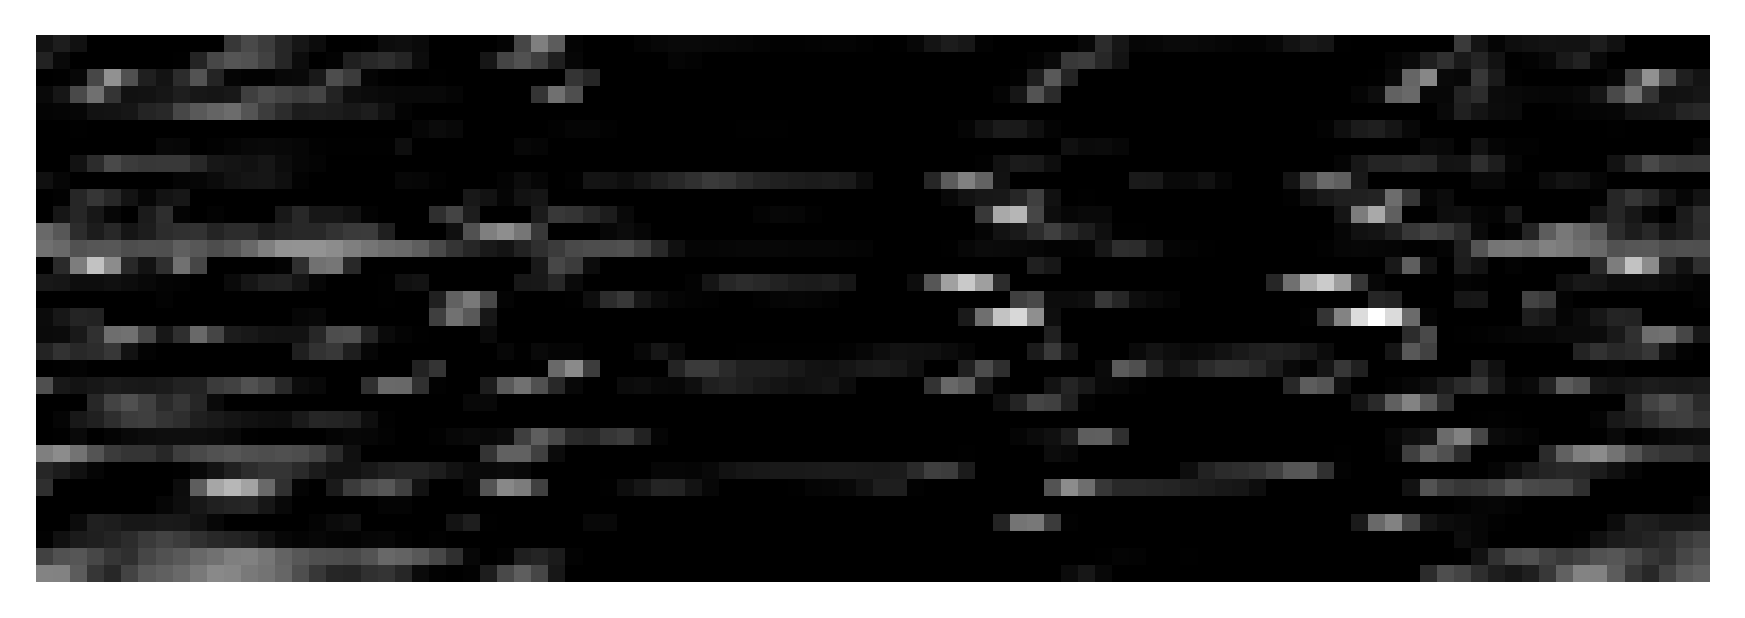

conv1d_12 (90, 32)


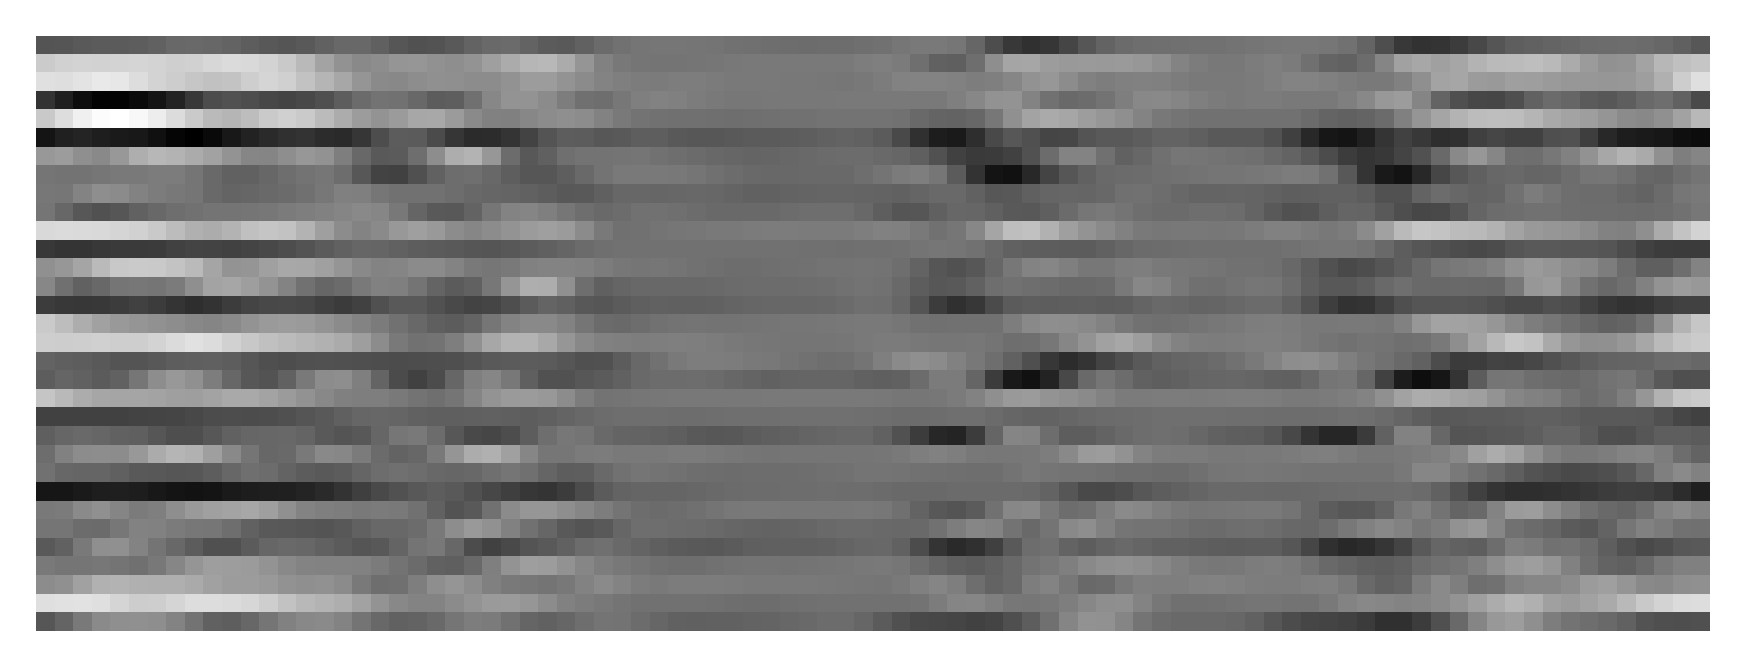

batch_normalization_12 (90, 32)


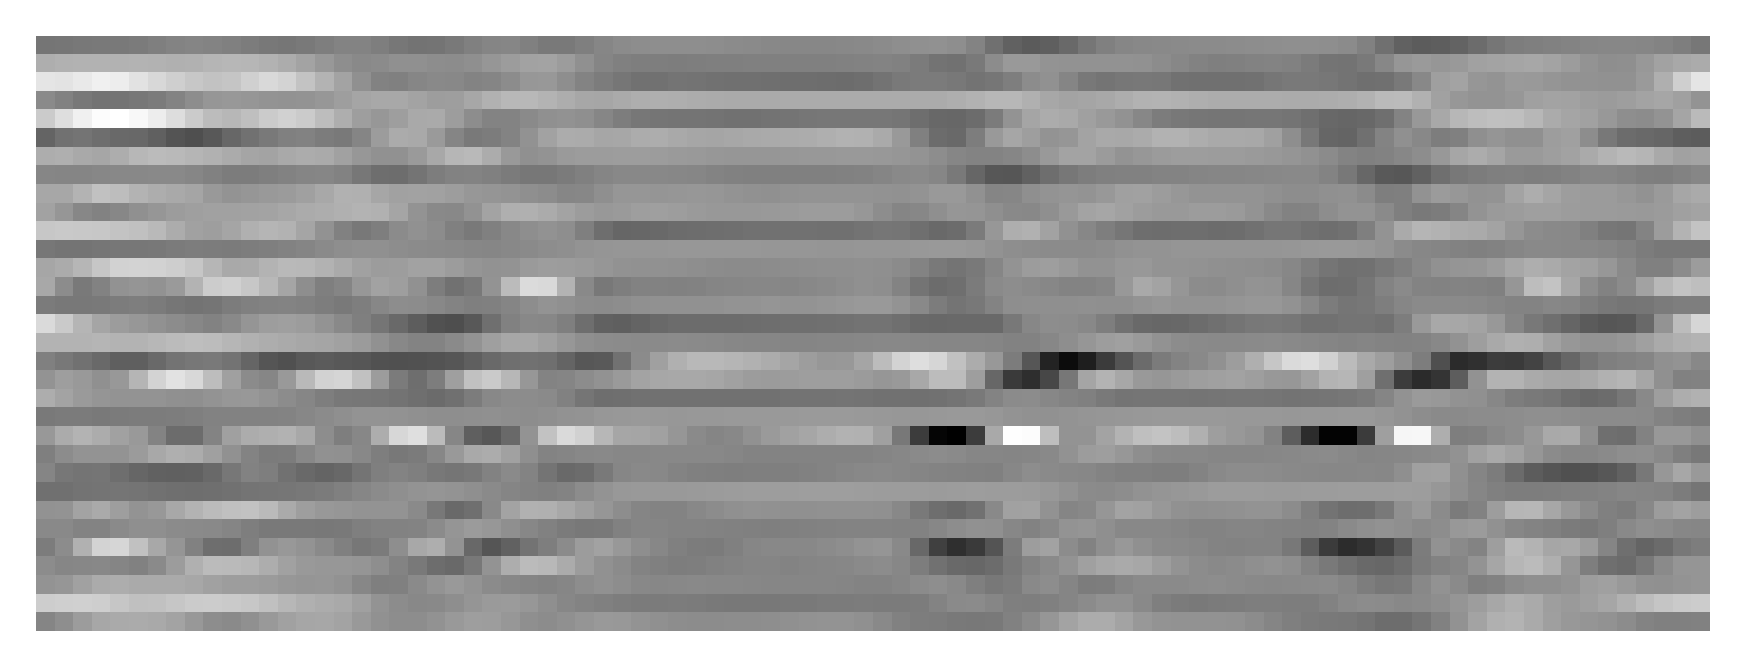

re_lu_12 (90, 32)


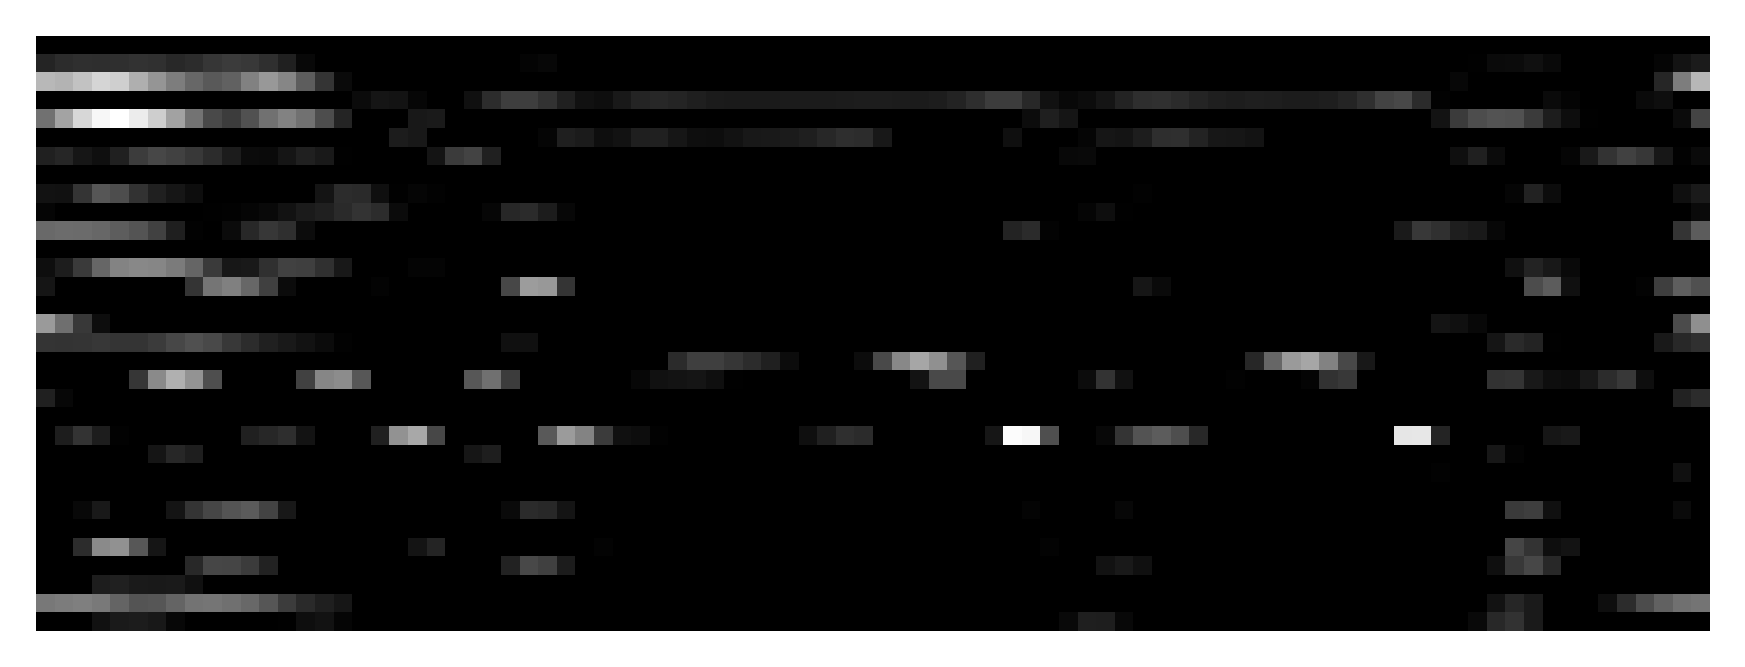

lambda_13 (98, 32)


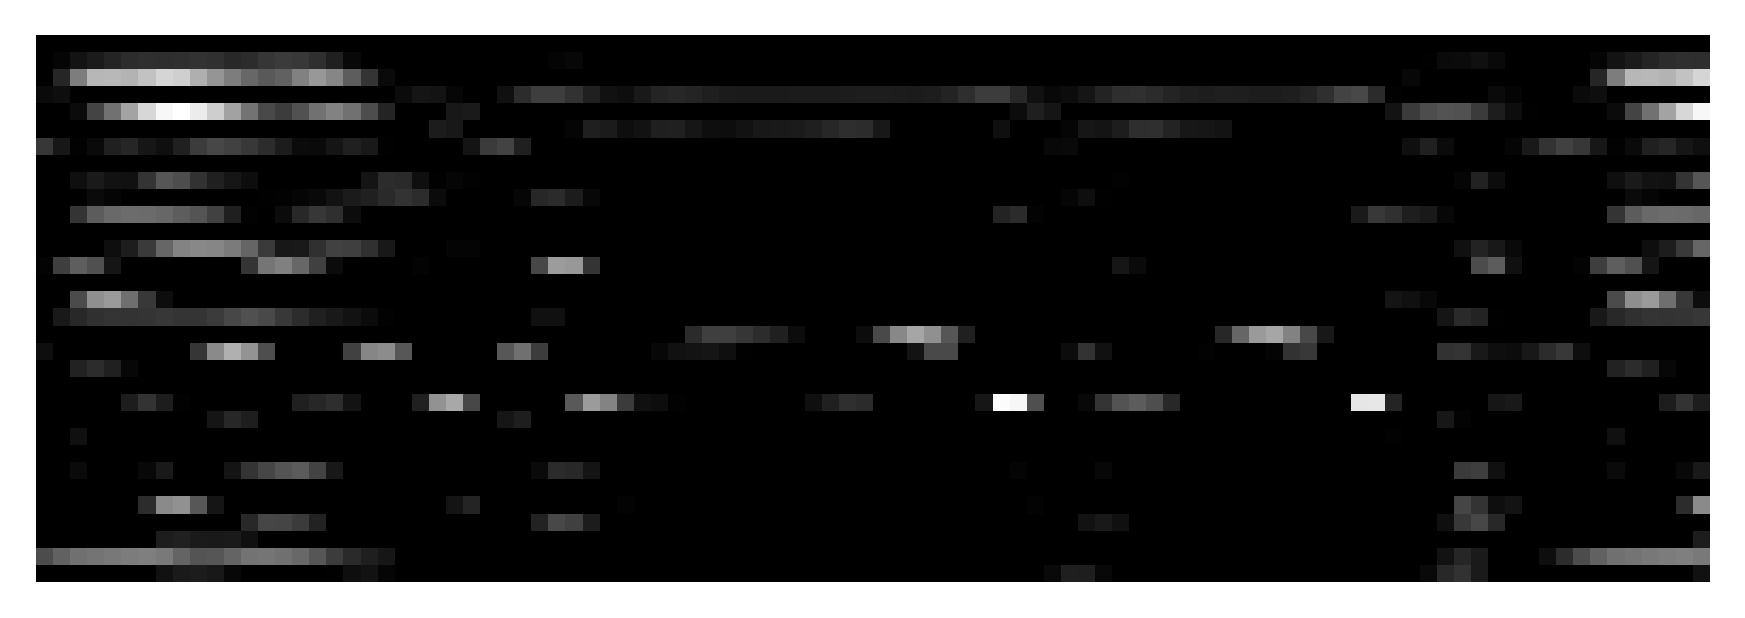

conv1d_13 (90, 32)


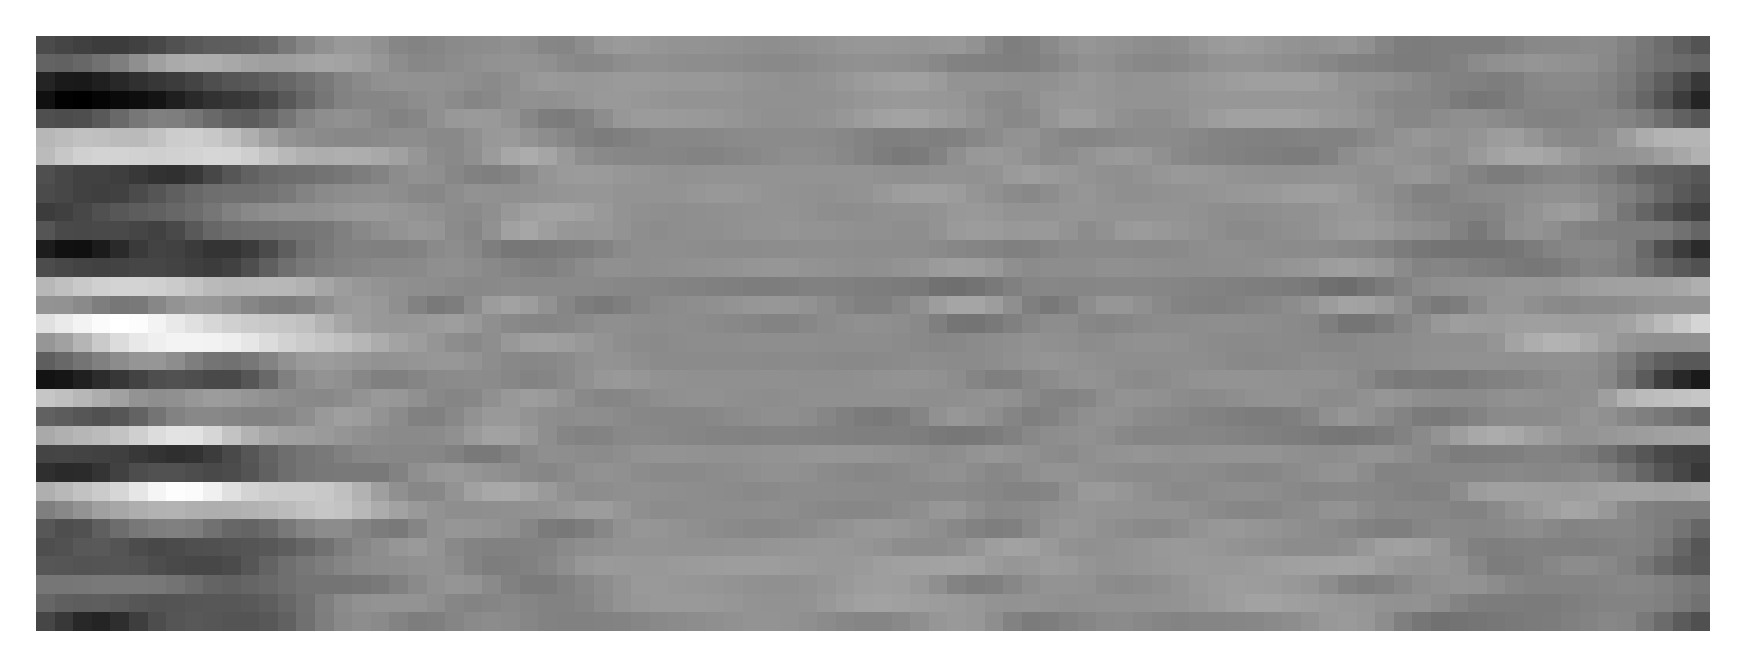

batch_normalization_13 (90, 32)


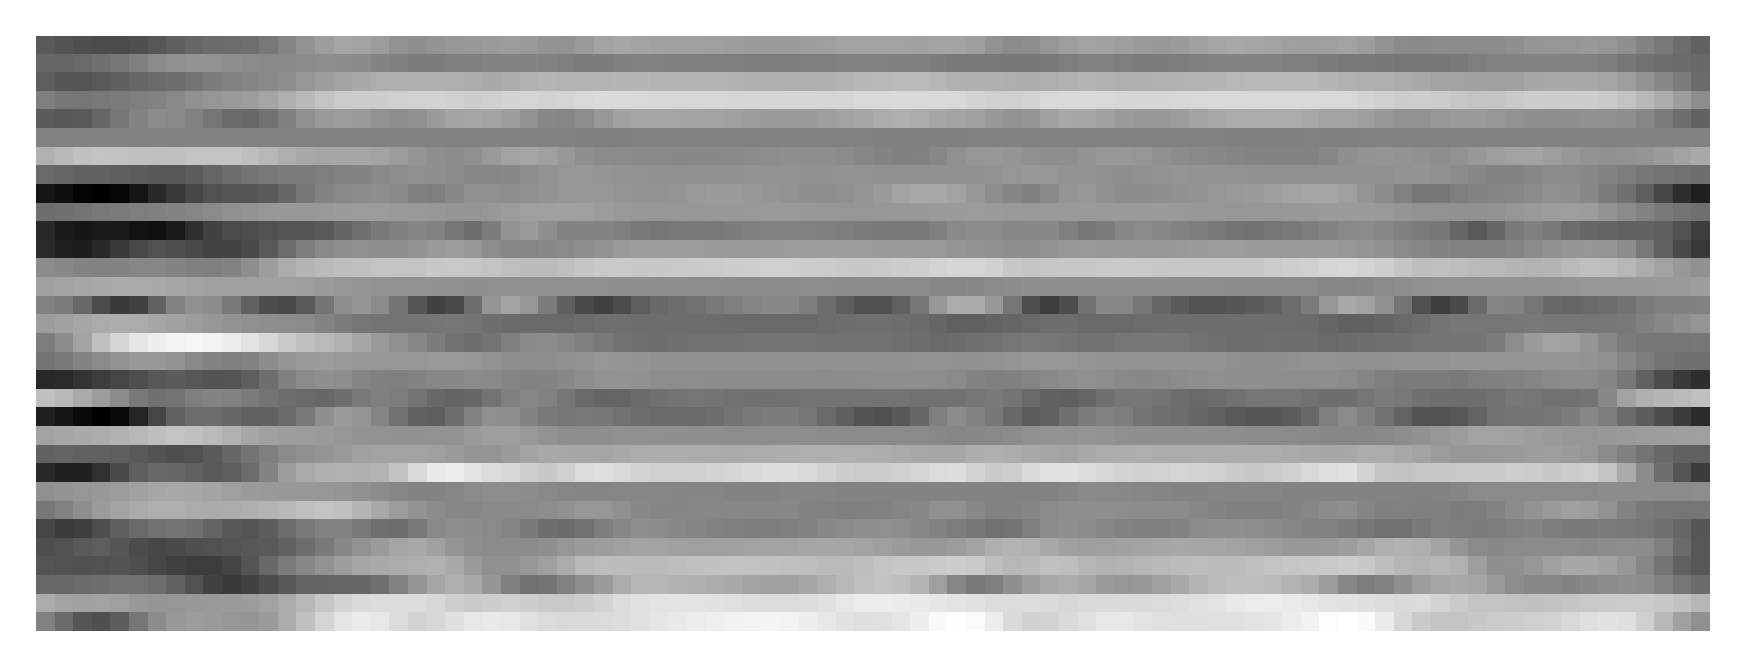

add_4 (90, 32)


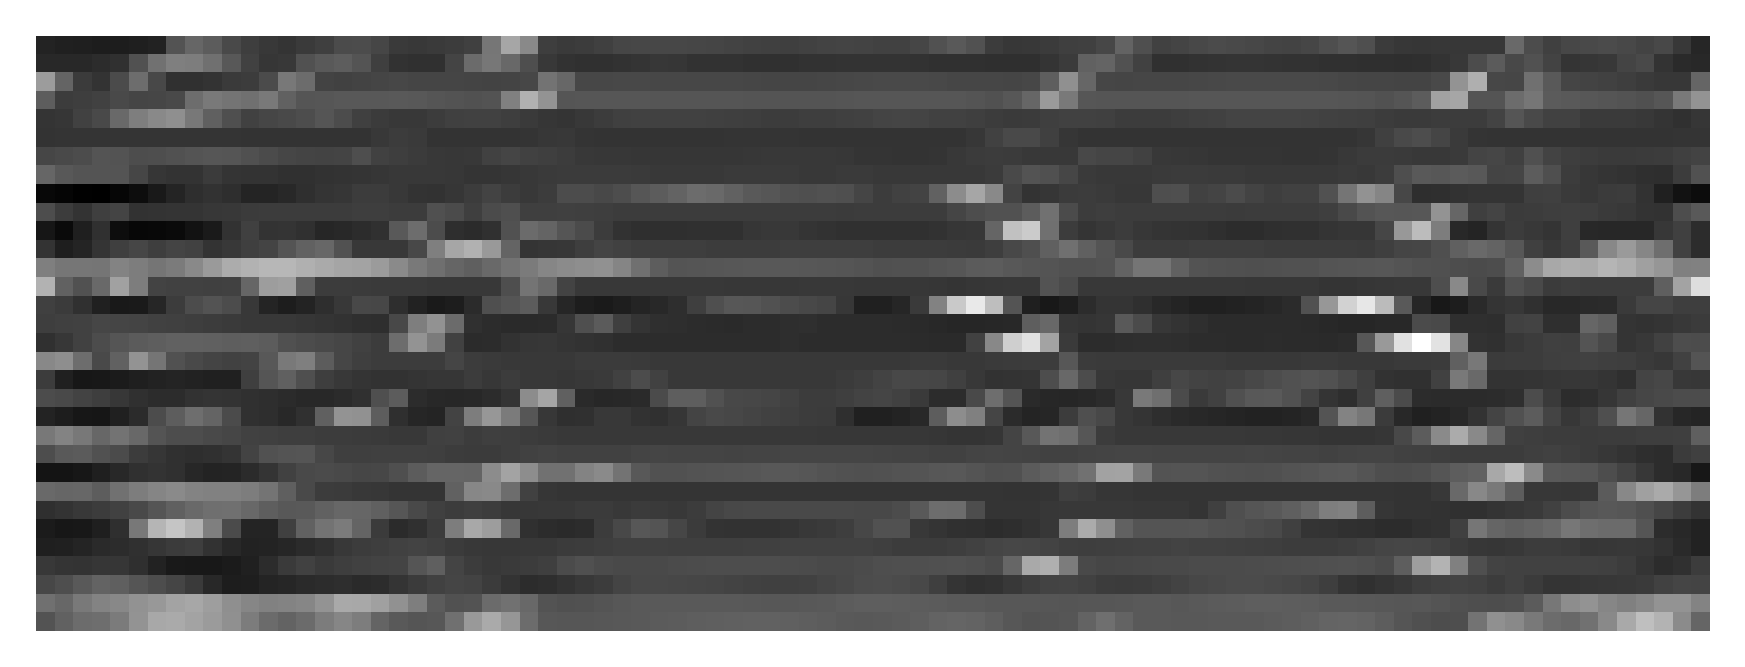

re_lu_13 (90, 32)


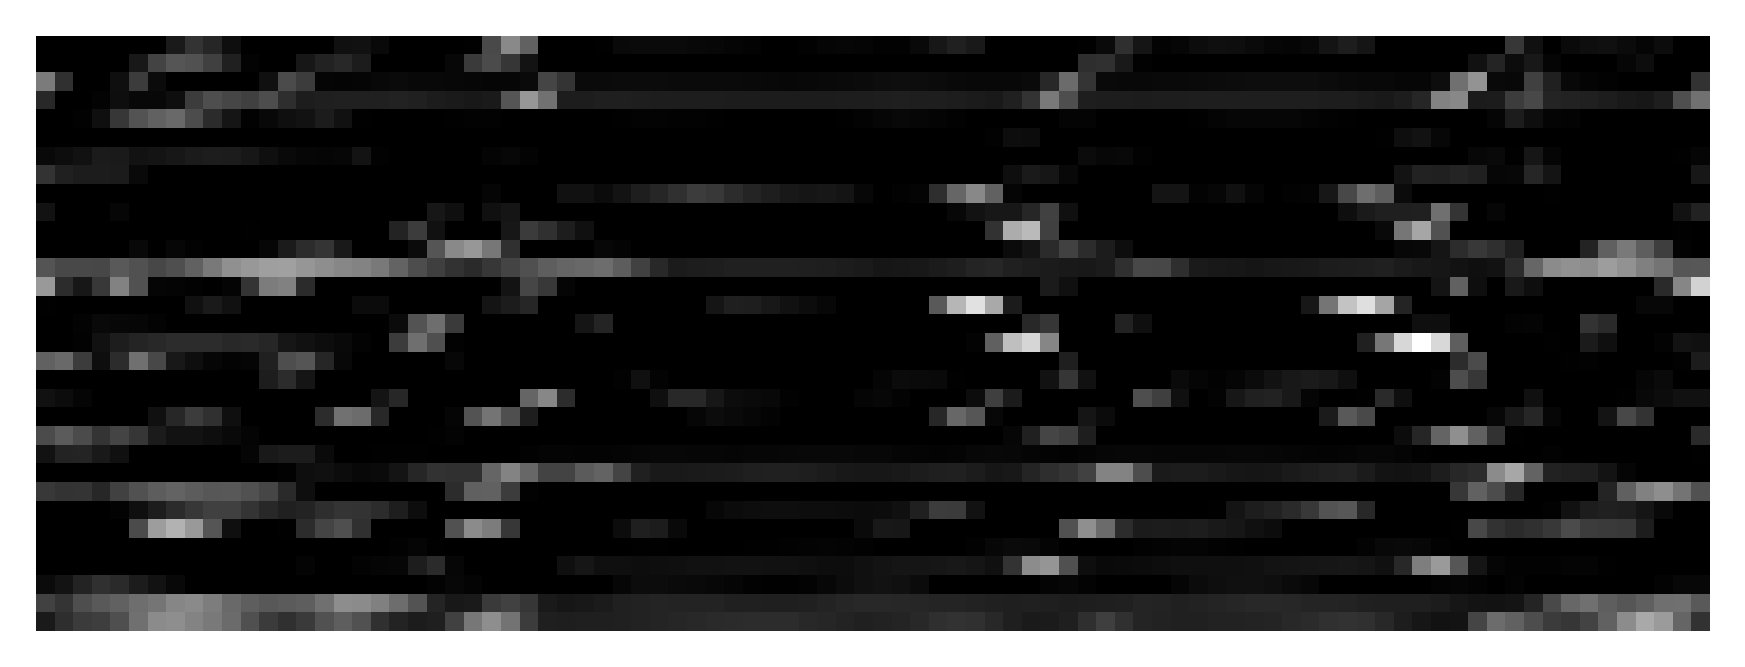

max_pooling1d_2 (45, 32)


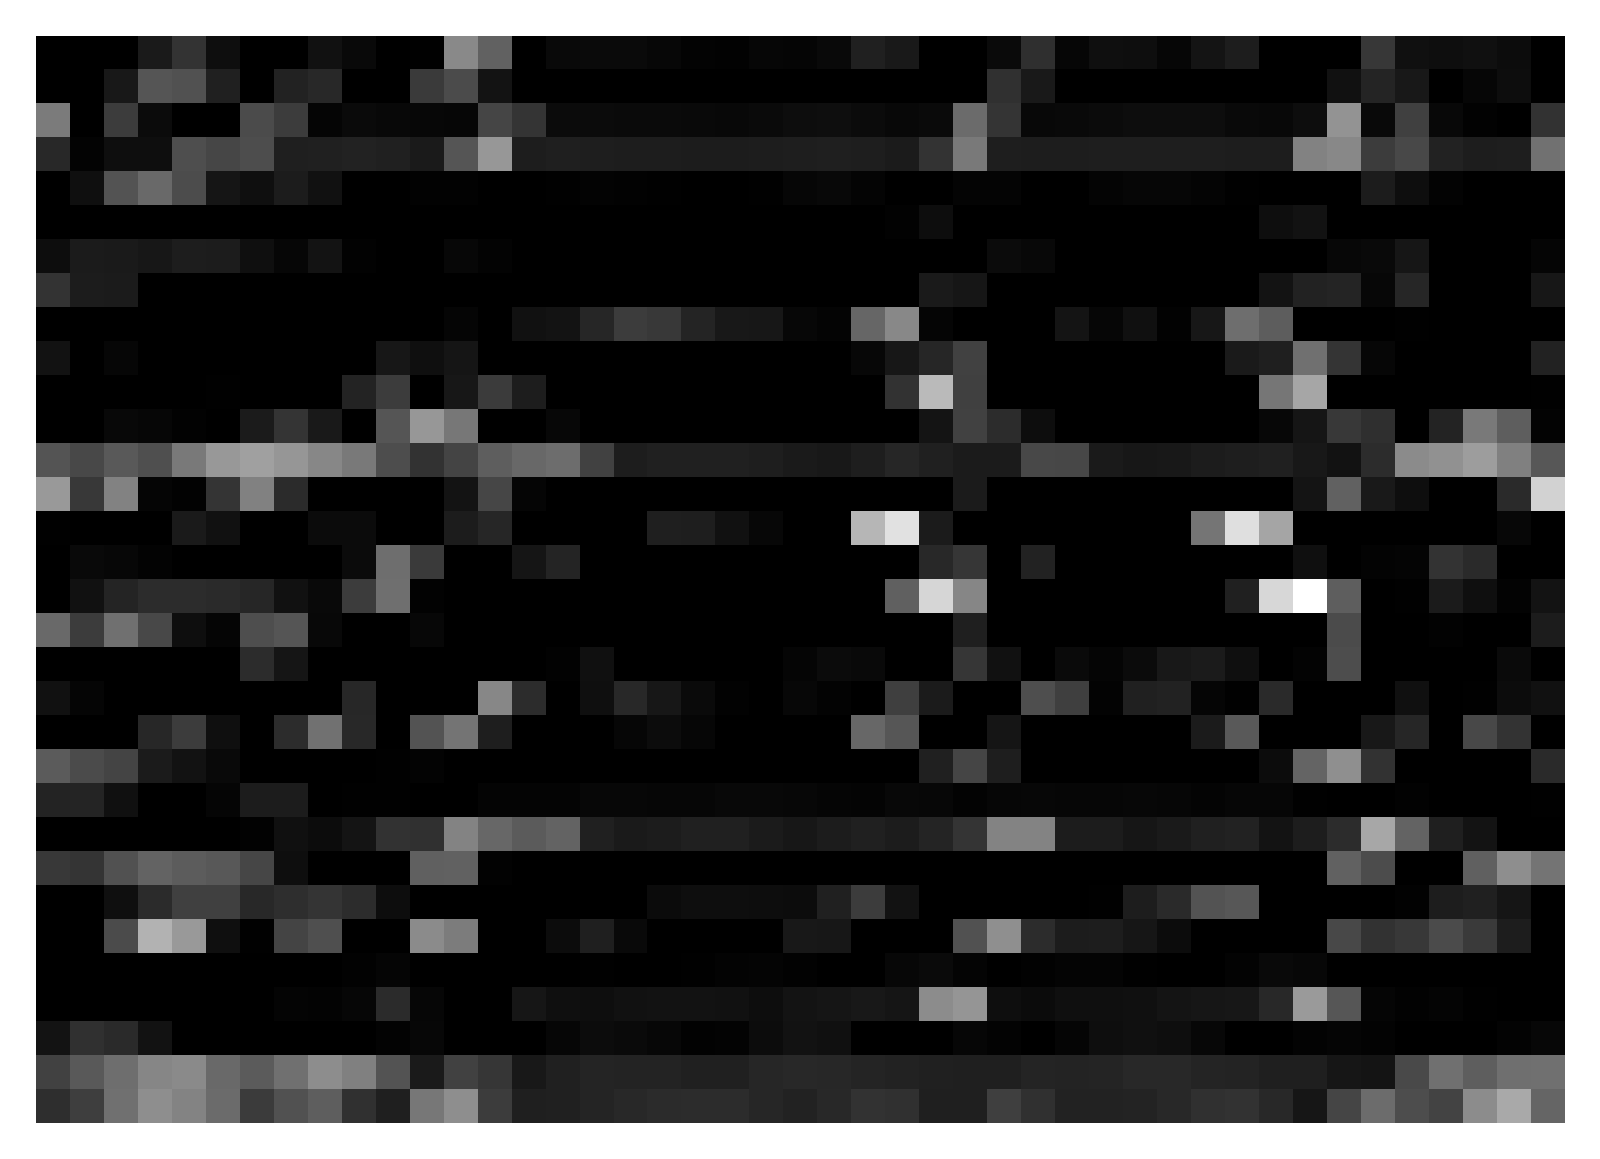

lambda_14 (53, 32)


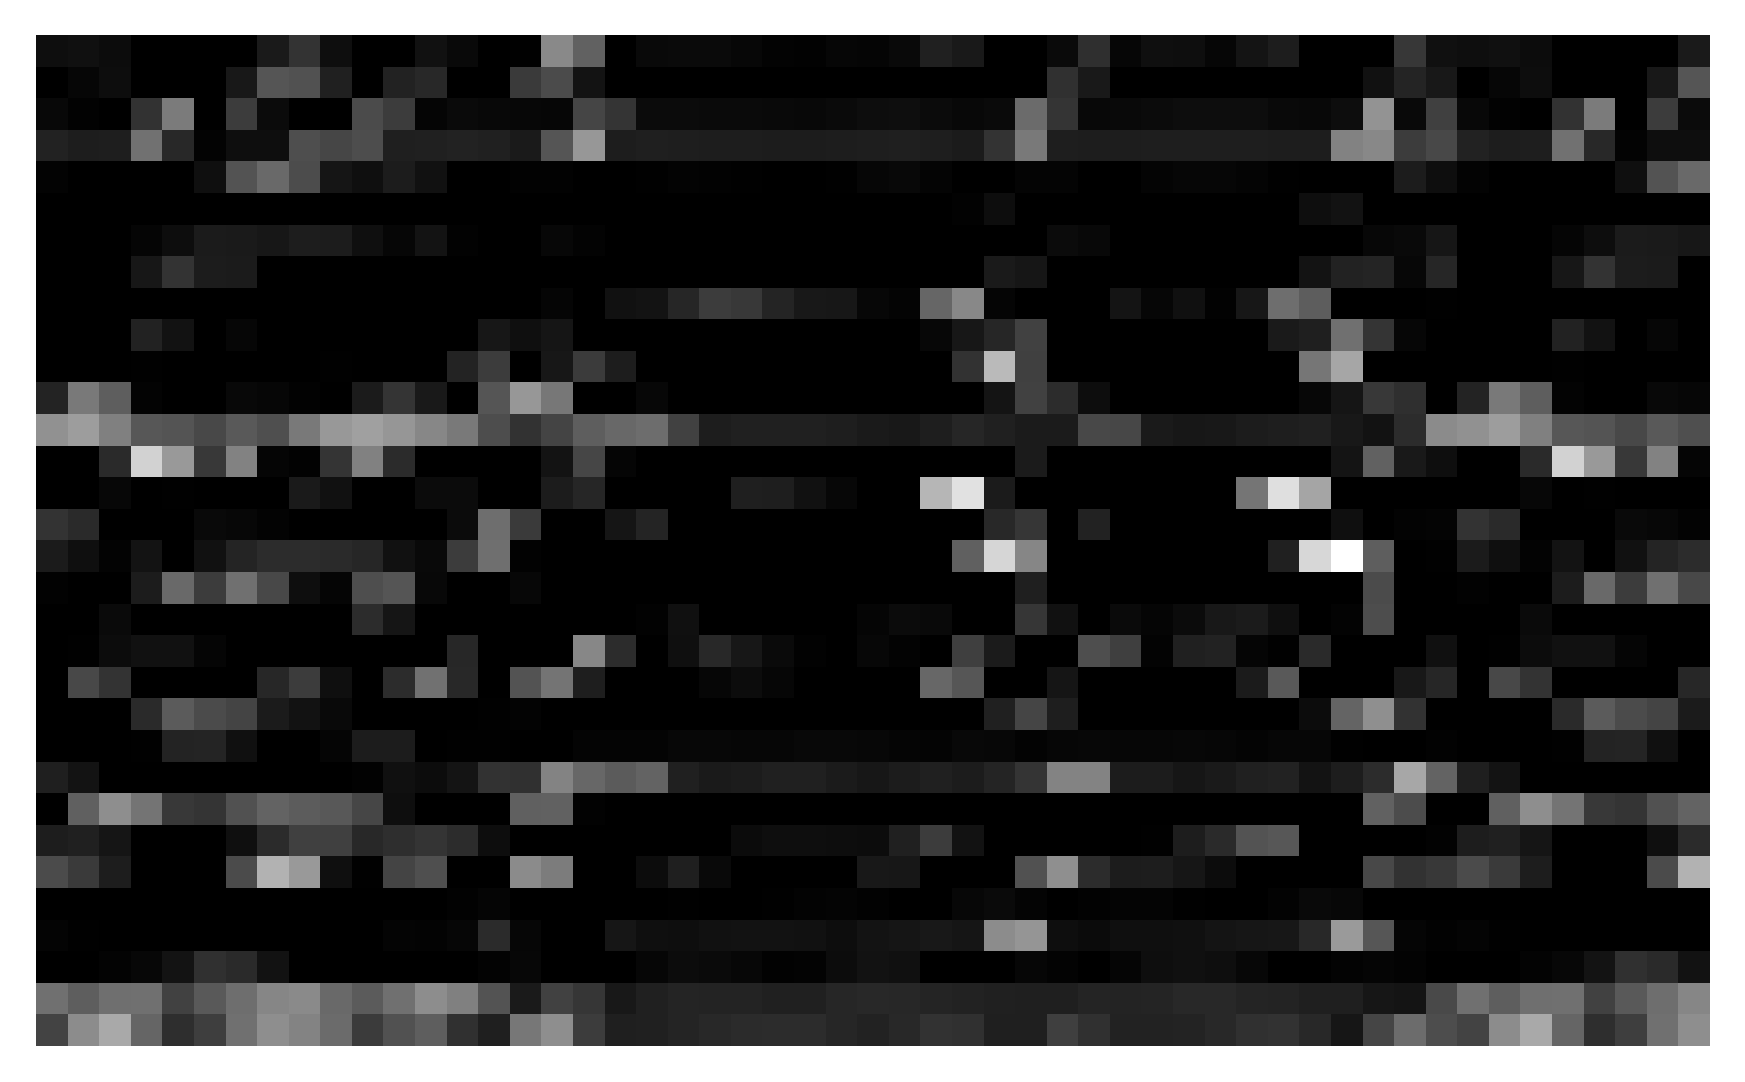

conv1d_14 (45, 64)


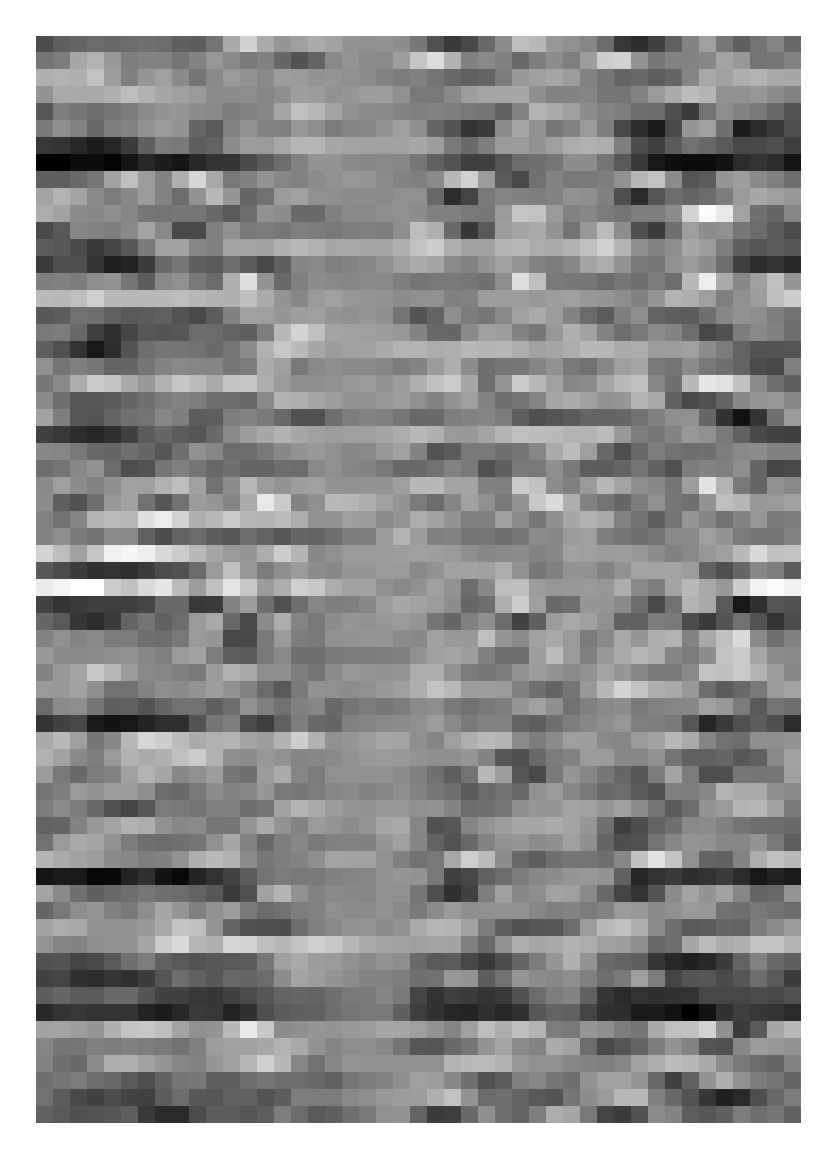

batch_normalization_14 (45, 64)


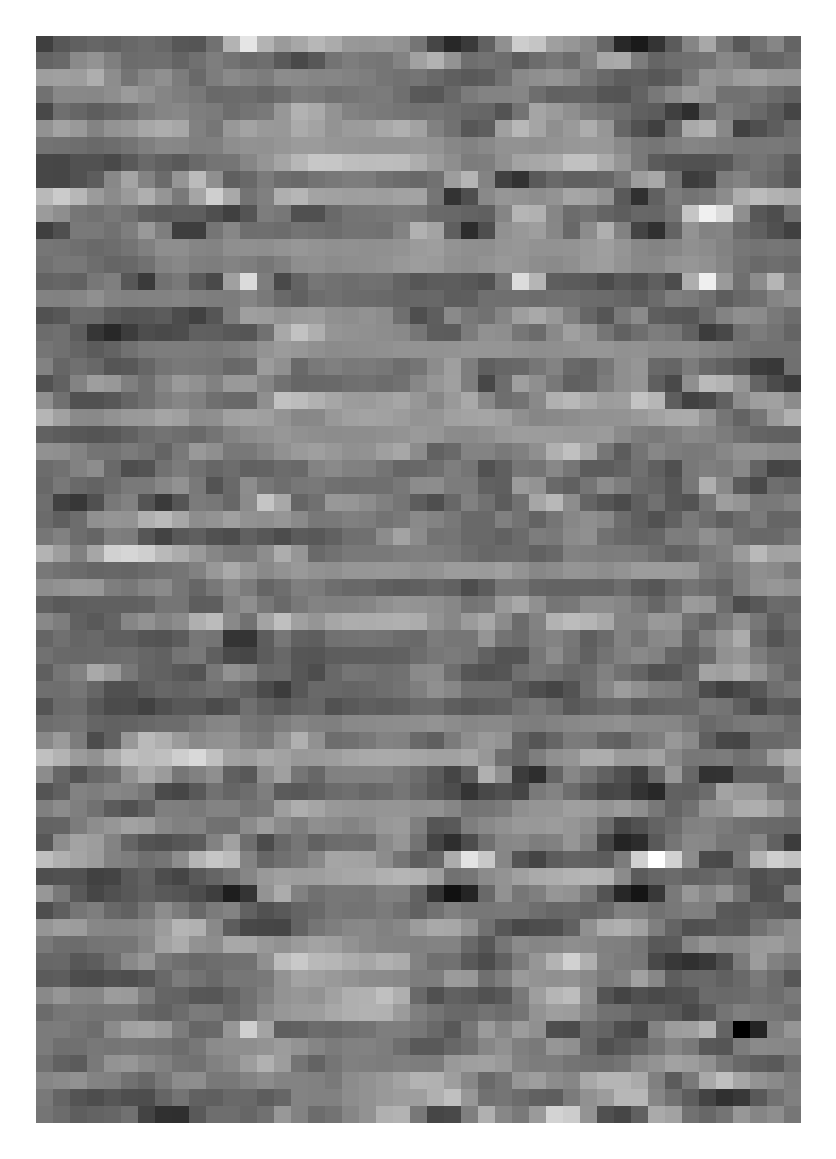

re_lu_14 (45, 64)


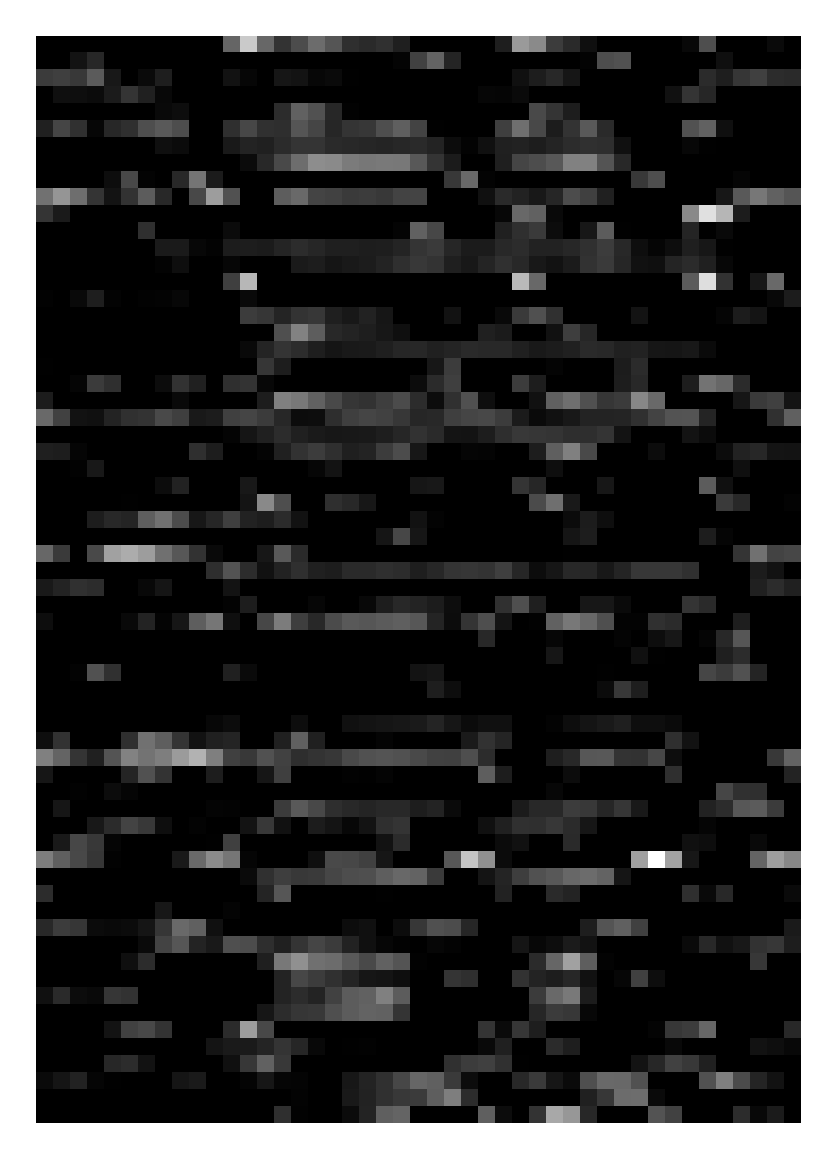

lambda_15 (53, 64)


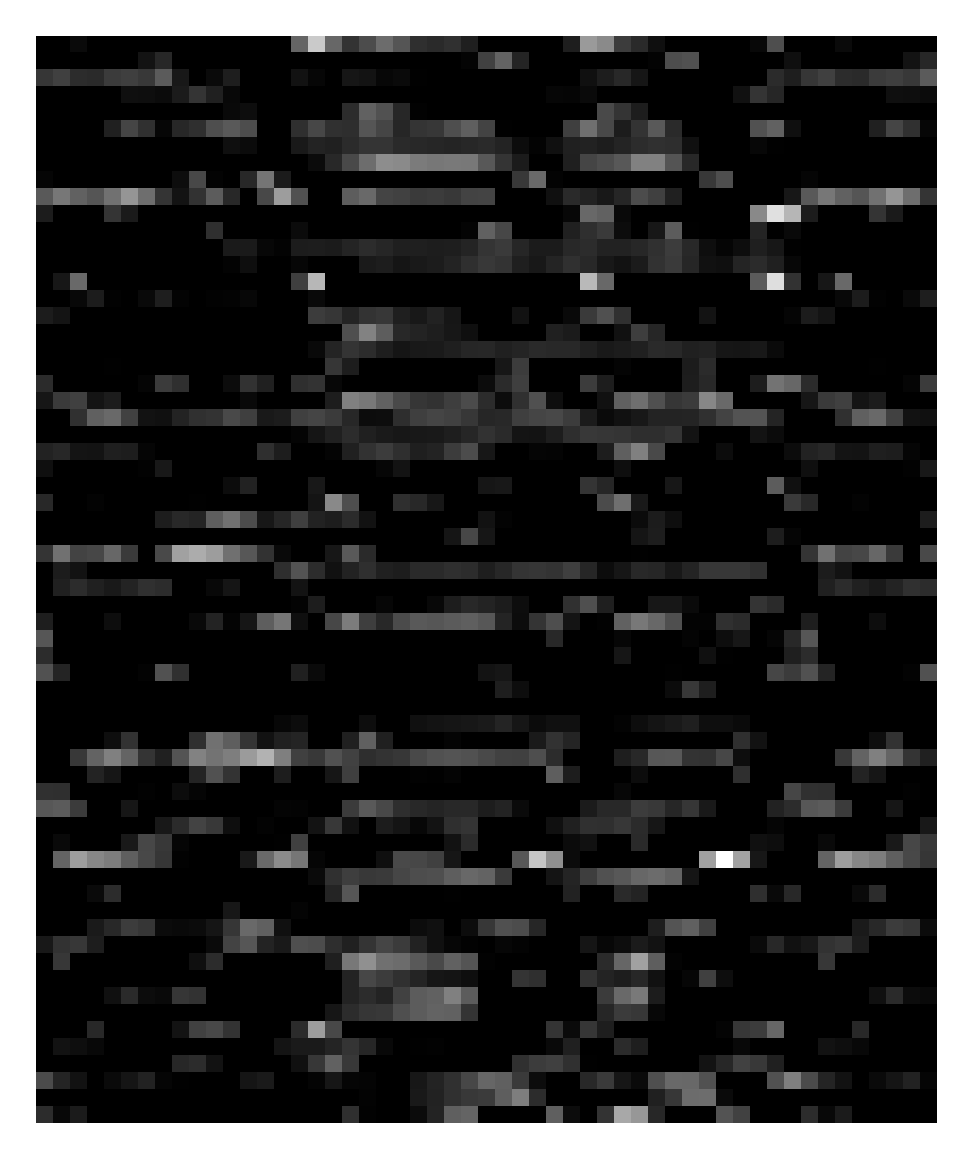

conv1d_15 (45, 64)


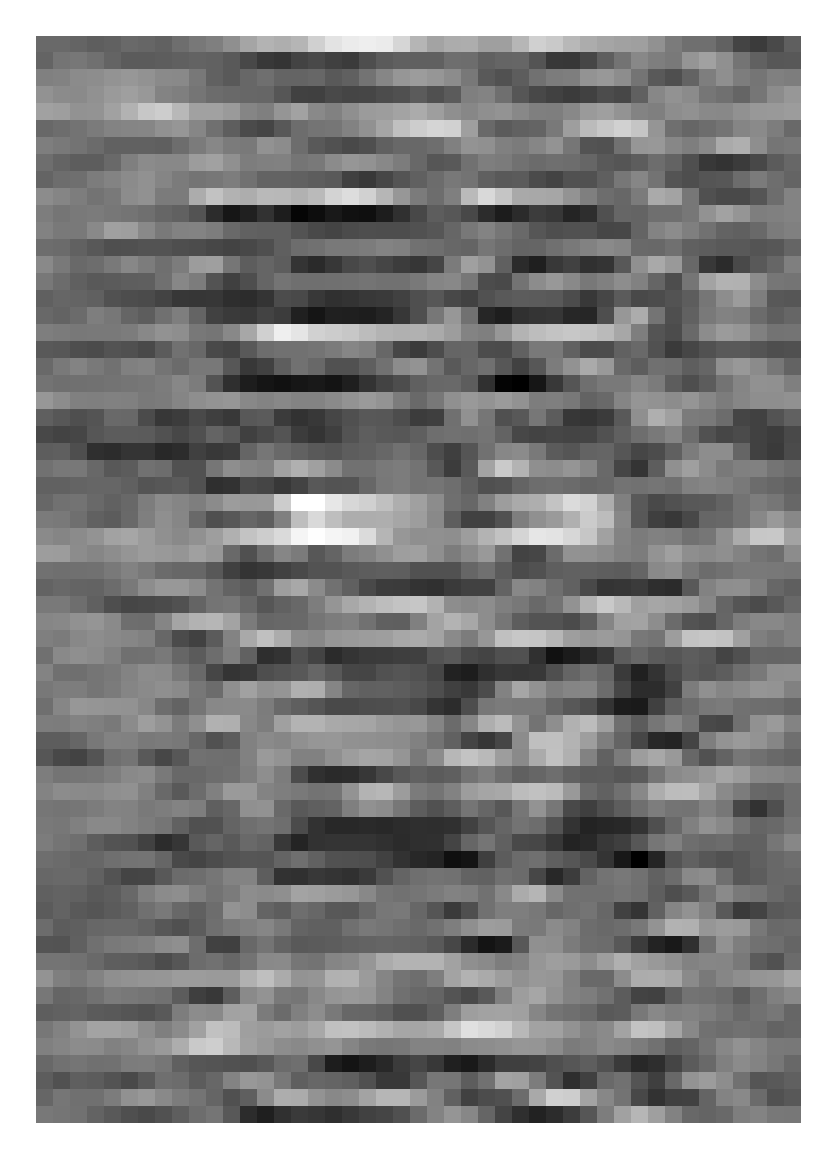

batch_normalization_15 (45, 64)


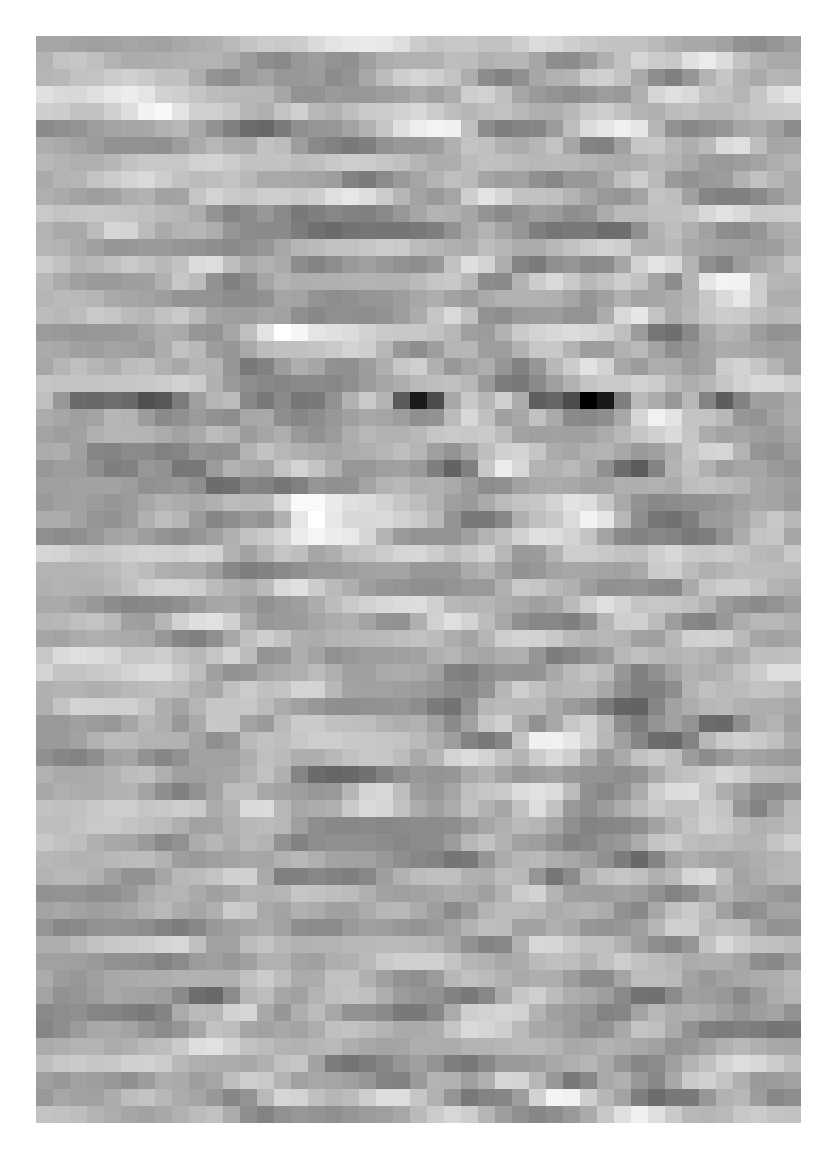

re_lu_15 (45, 64)


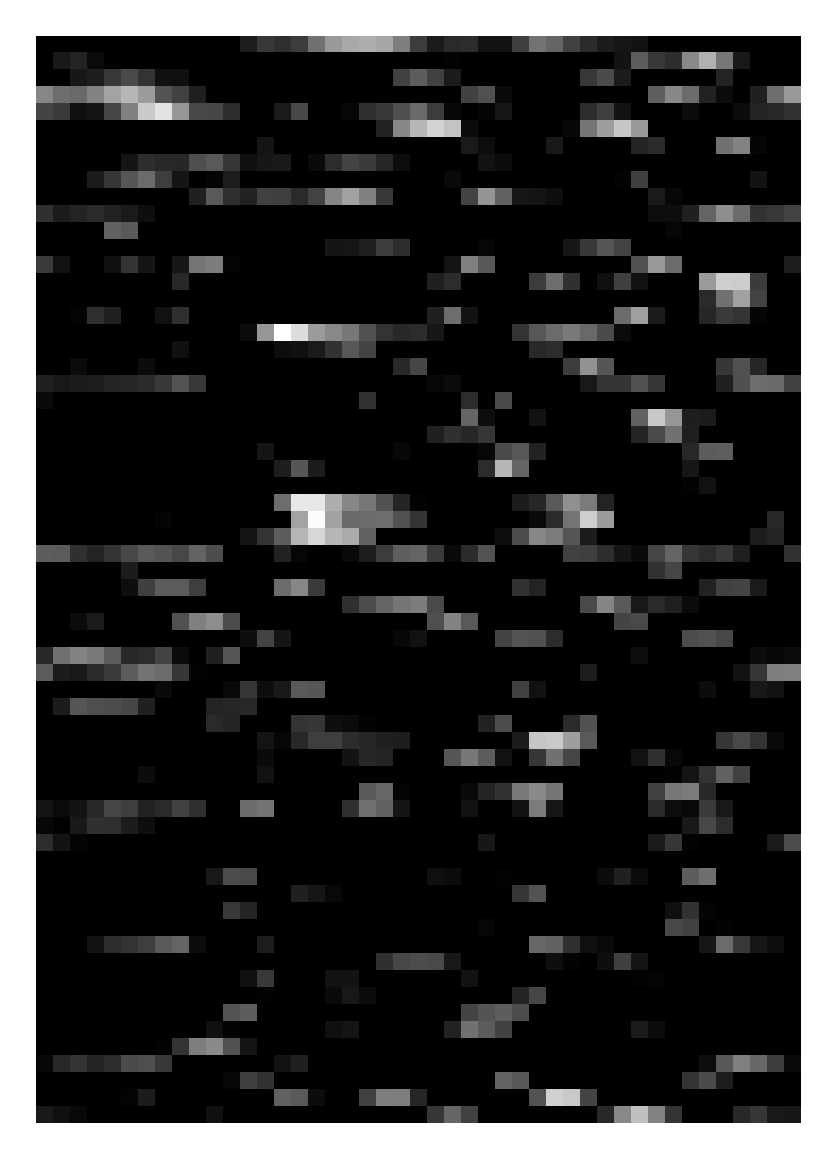

lambda_16 (53, 64)


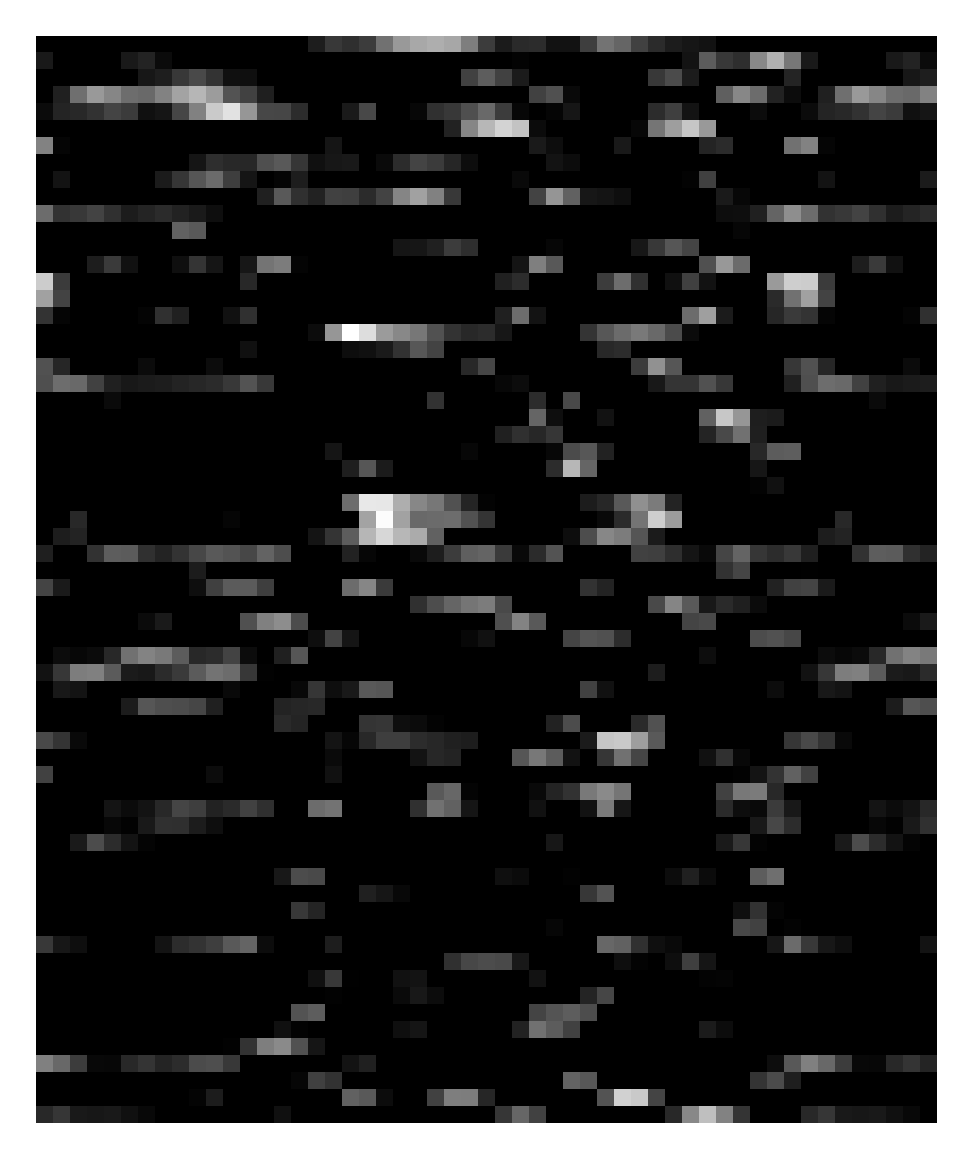

conv1d_16 (45, 64)


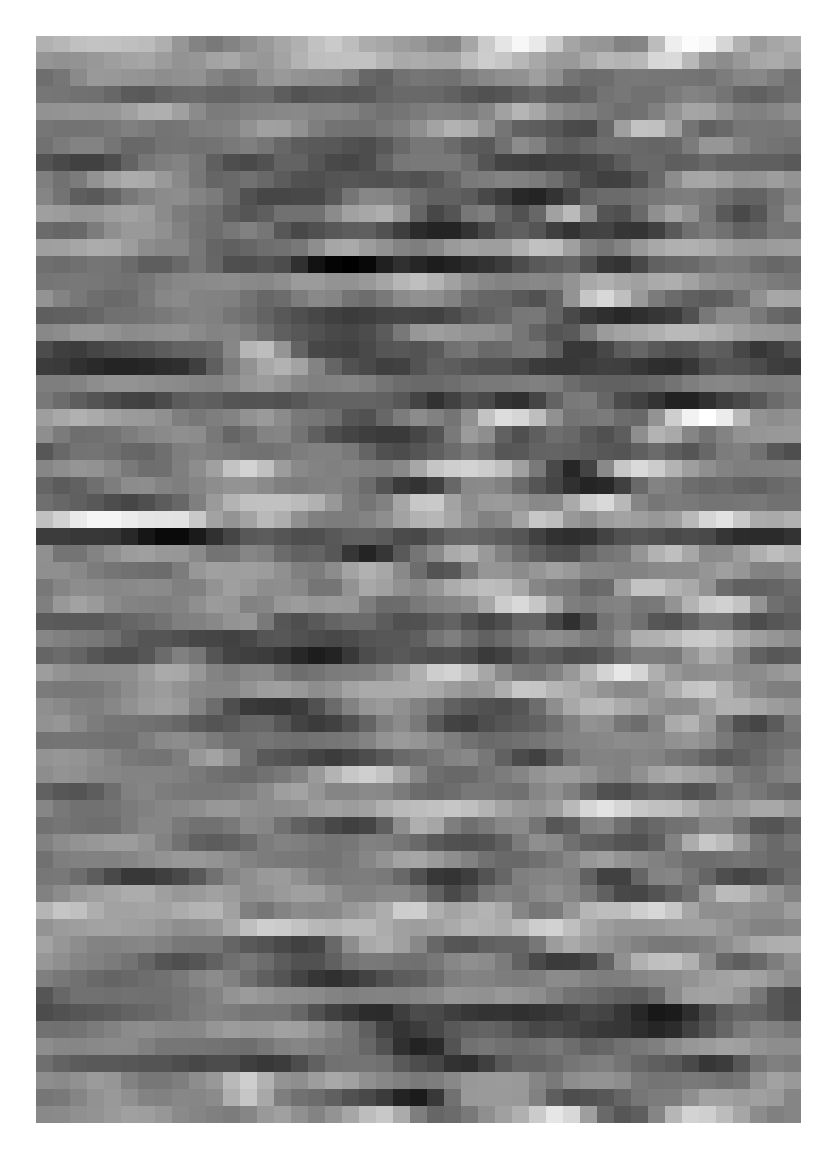

batch_normalization_16 (45, 64)


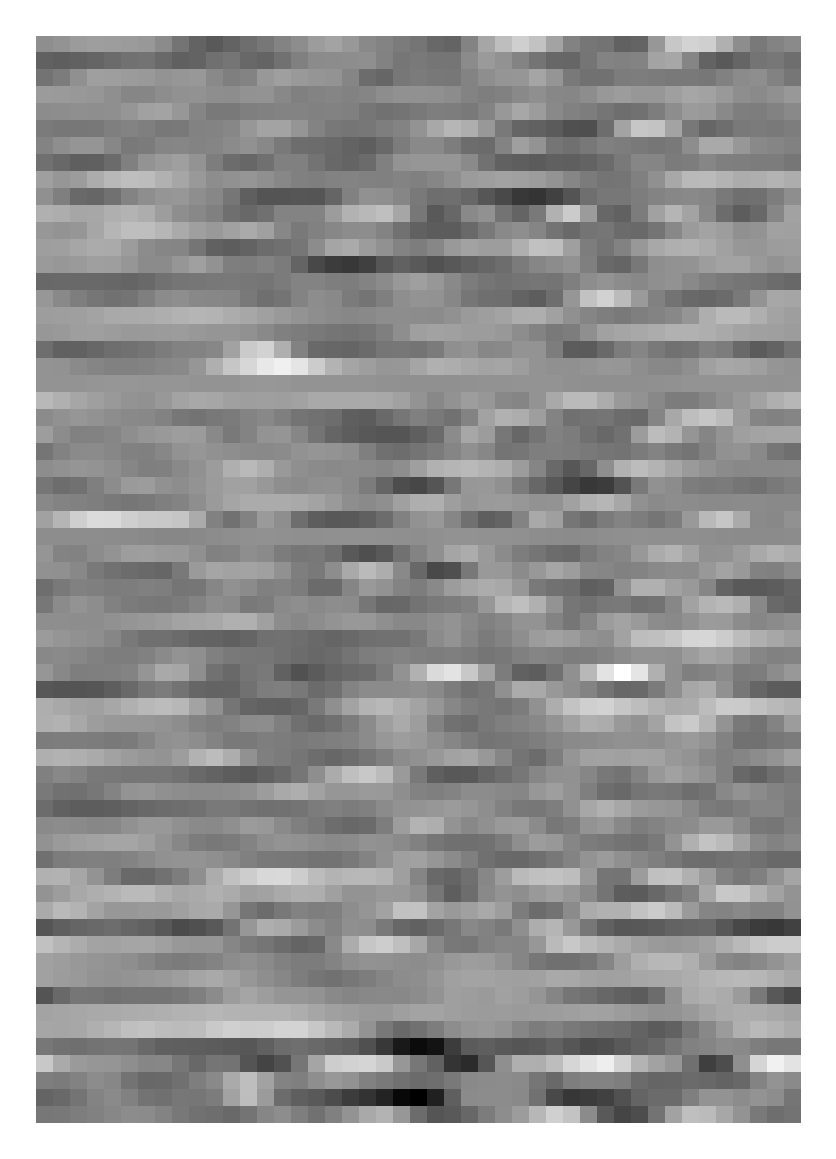

re_lu_16 (45, 64)


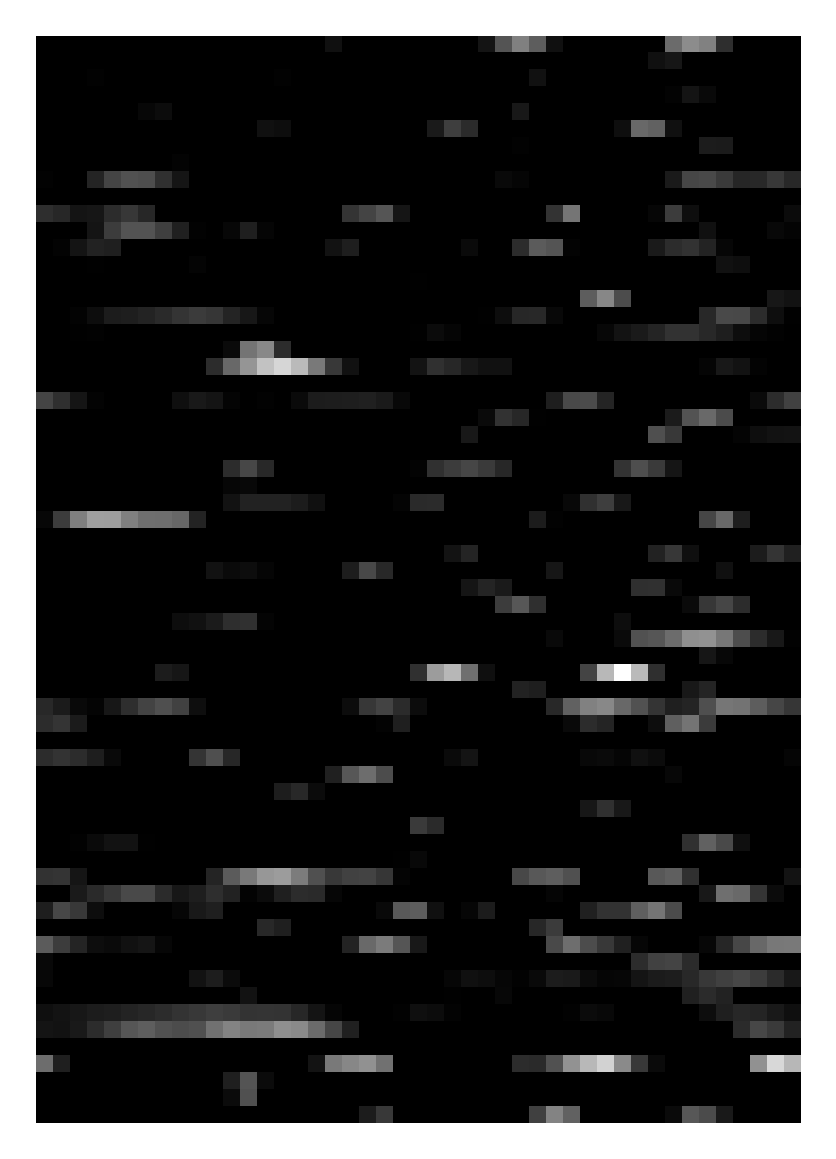

lambda_17 (53, 64)


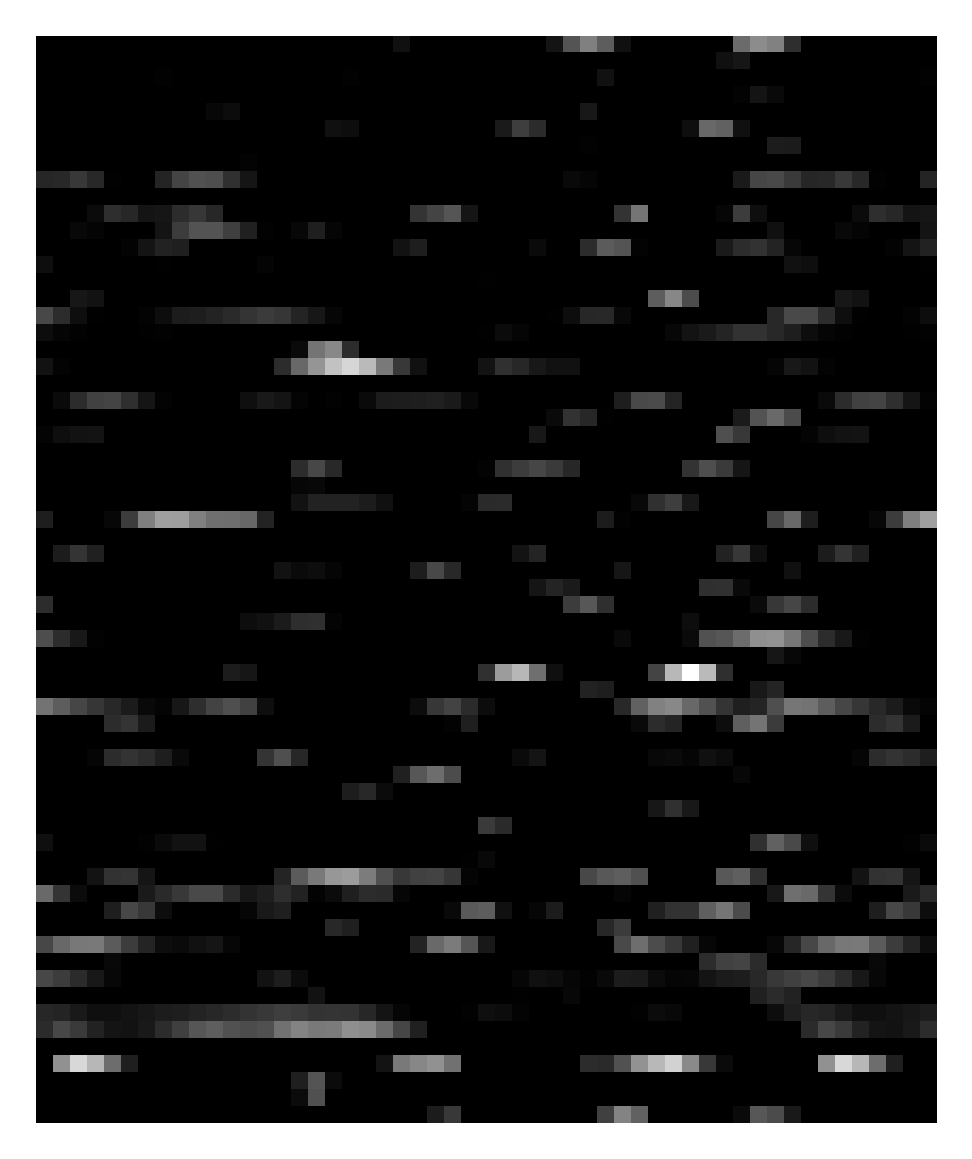

conv1d_17 (45, 64)


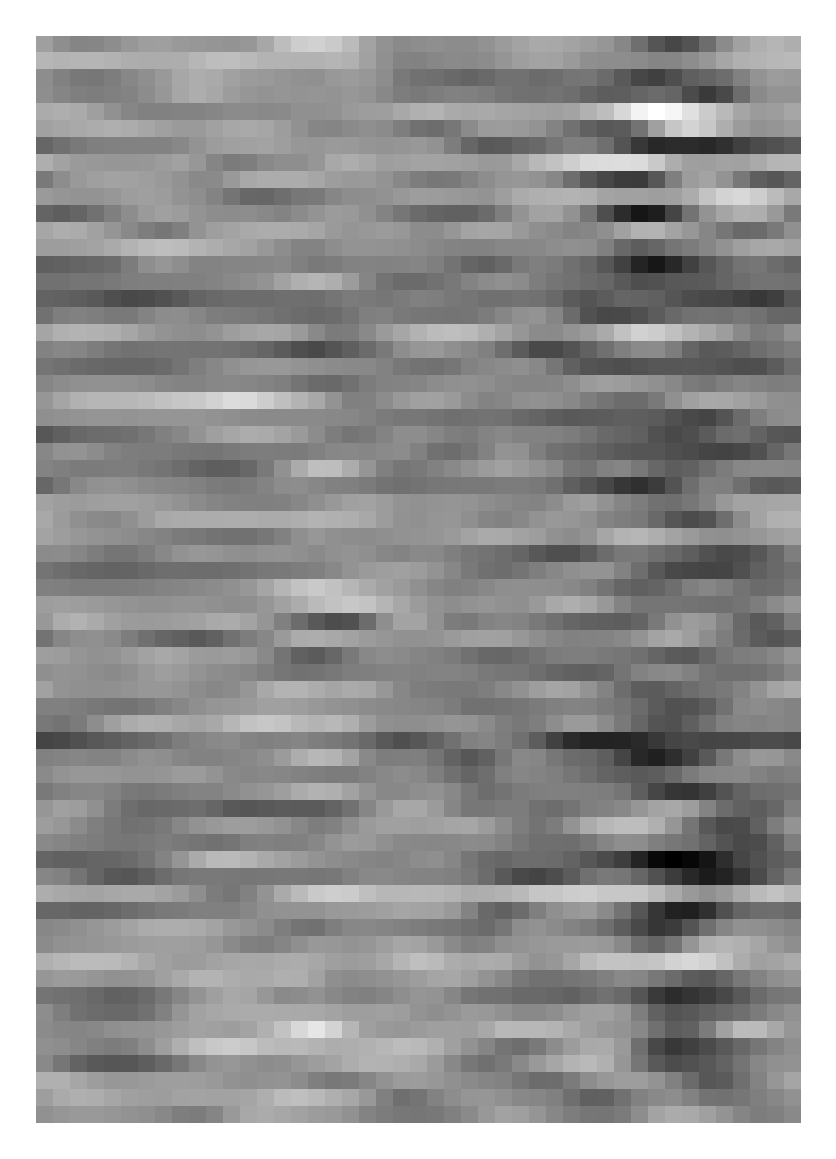

batch_normalization_17 (45, 64)


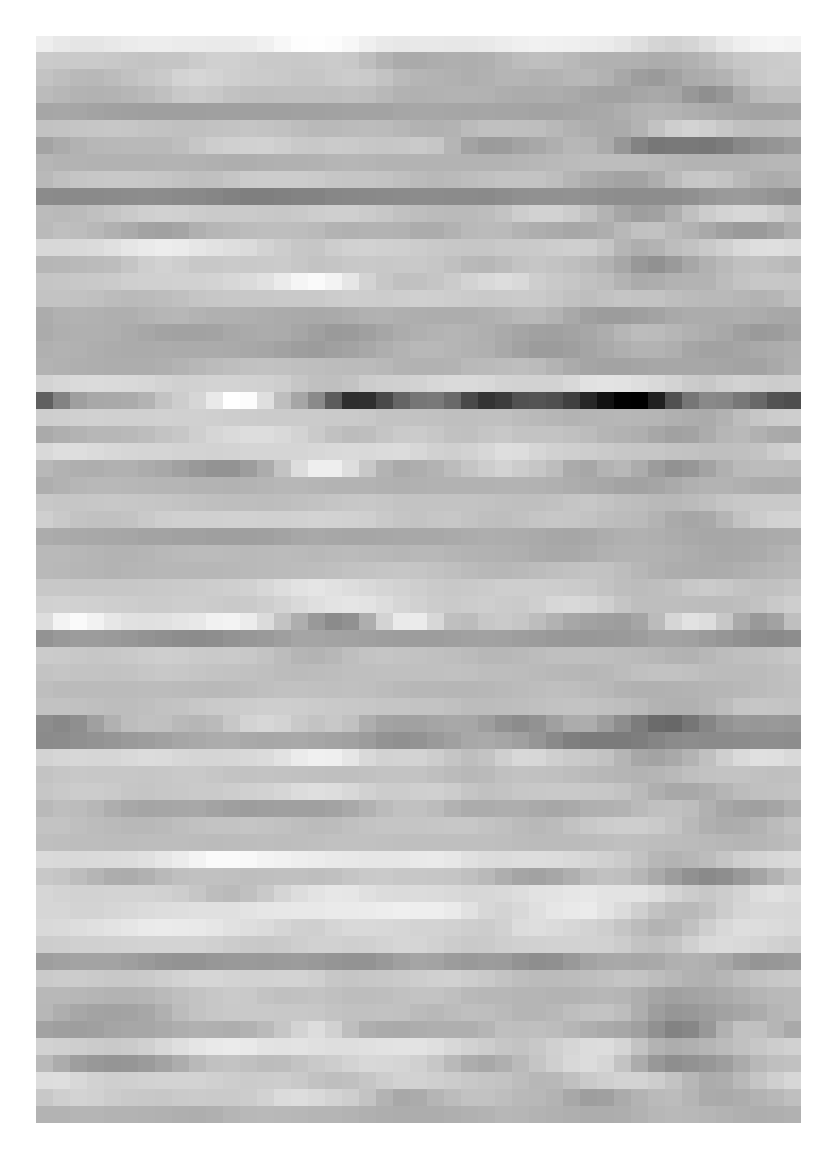

add_5 (45, 64)


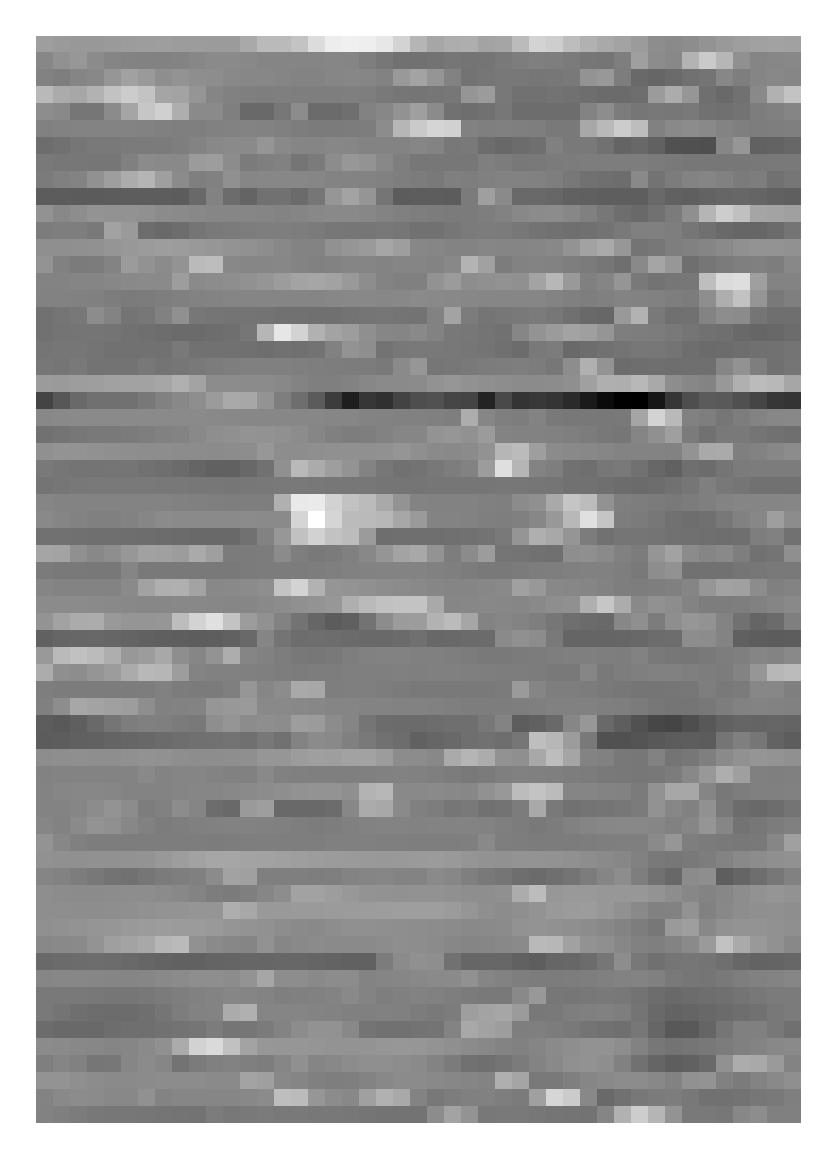

re_lu_17 (45, 64)


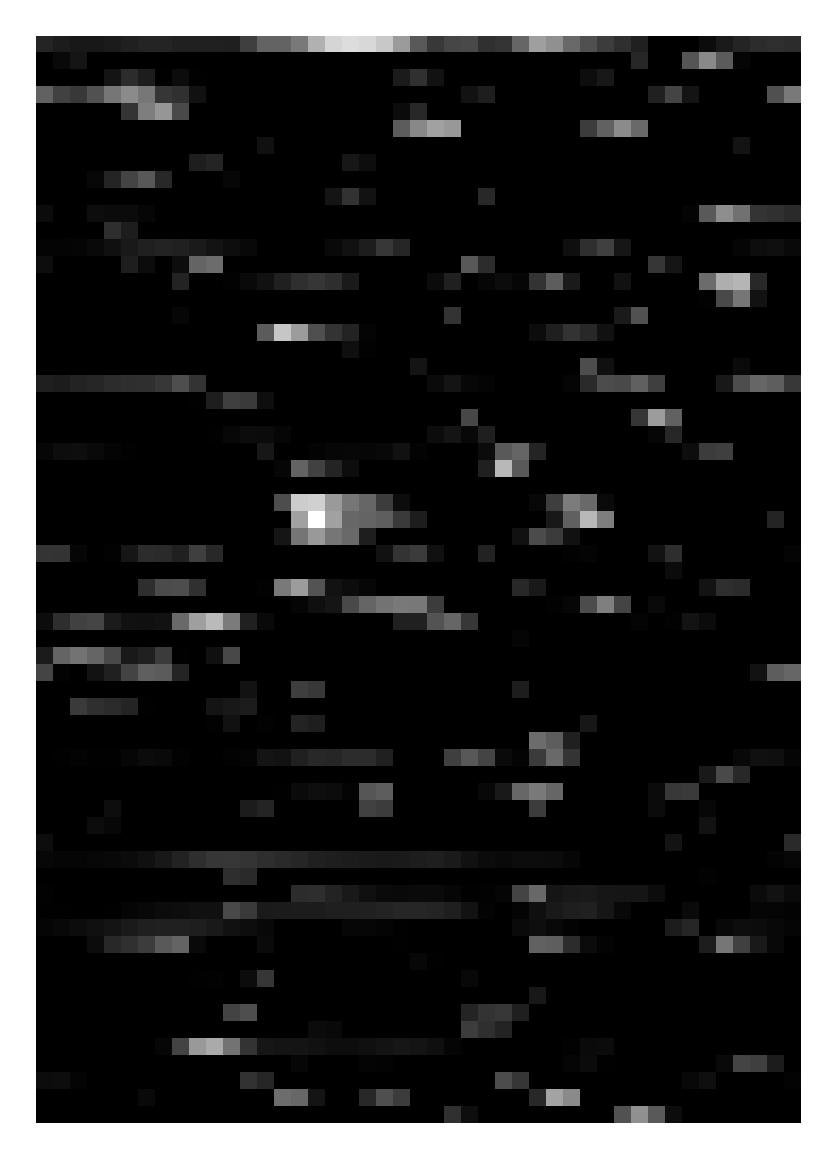

lambda_18 (53, 64)


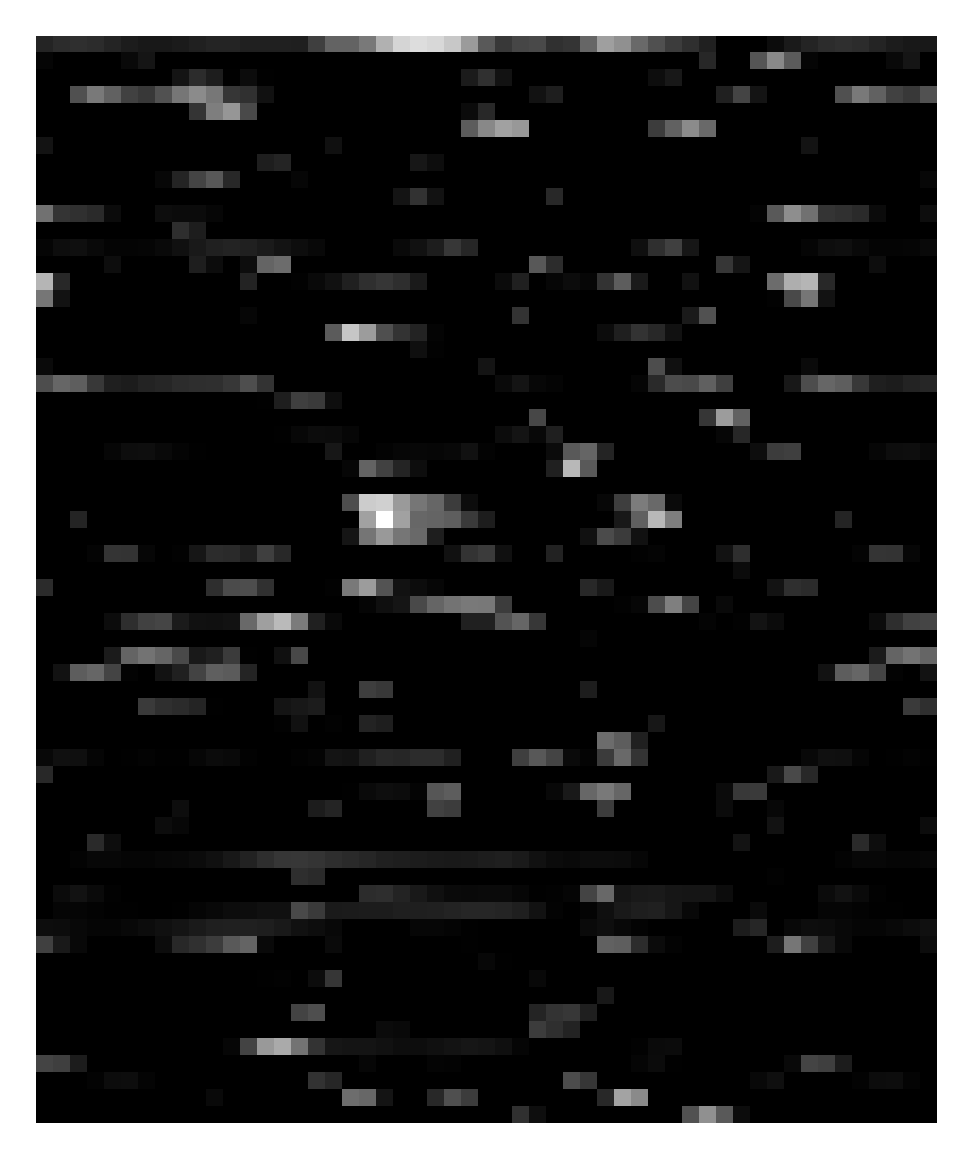

conv1d_18 (45, 64)


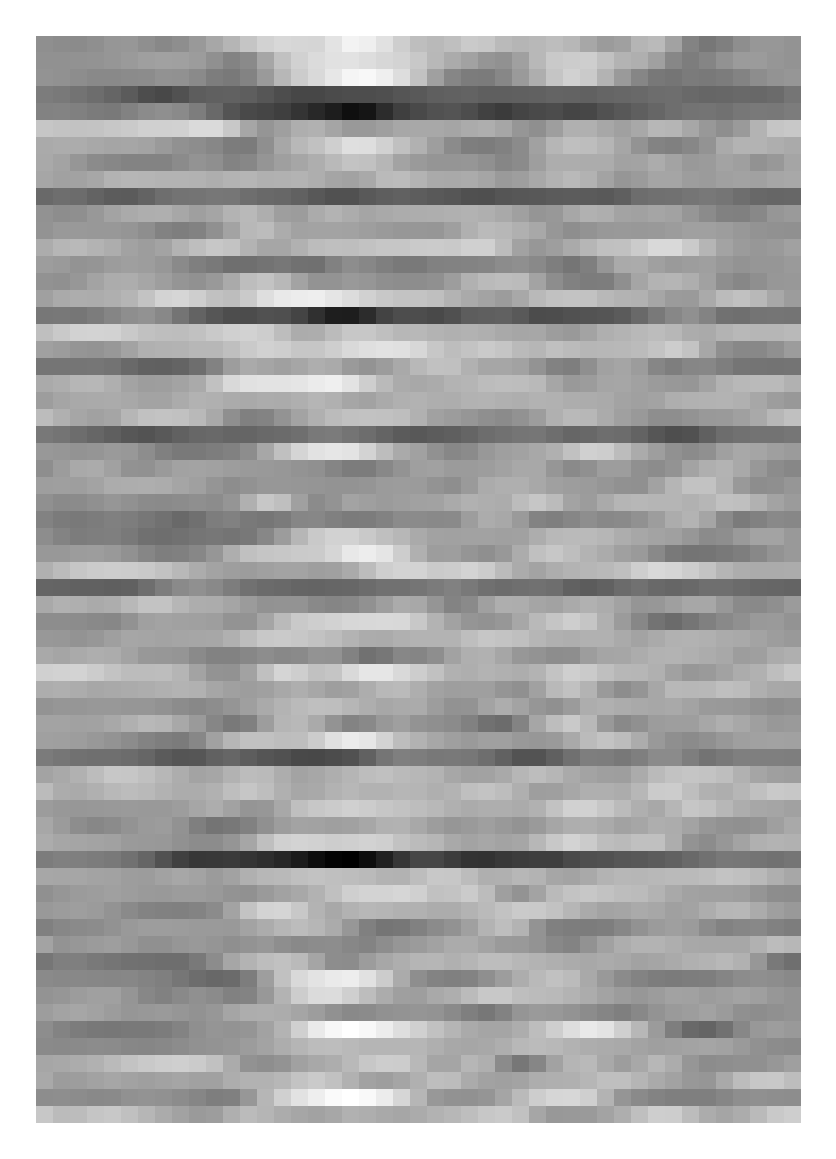

batch_normalization_18 (45, 64)


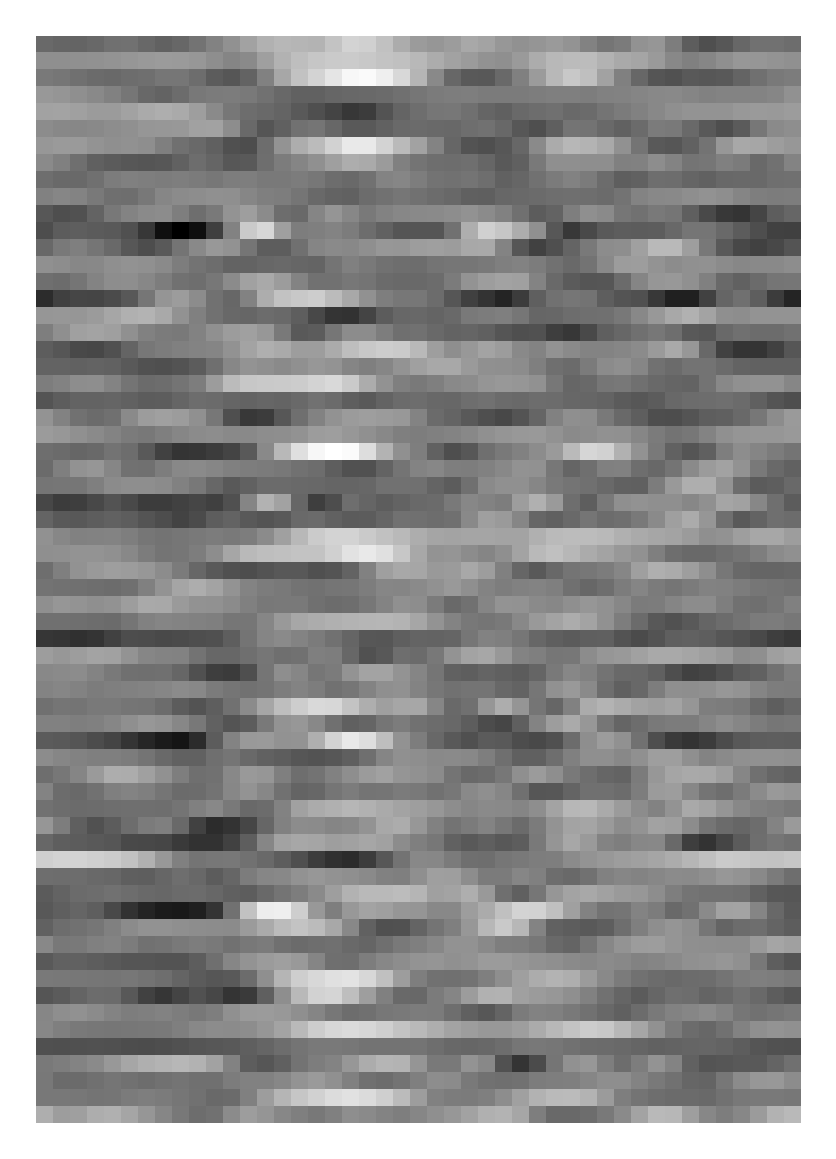

re_lu_18 (45, 64)


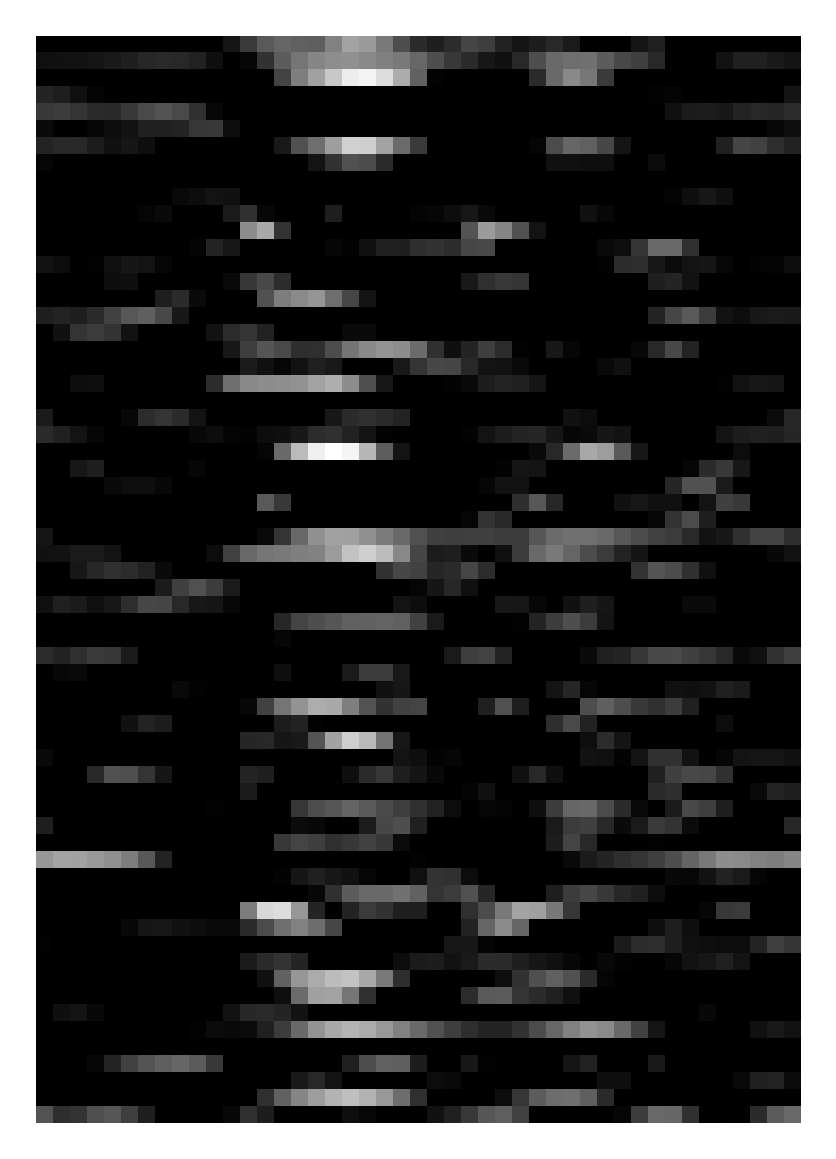

lambda_19 (53, 64)


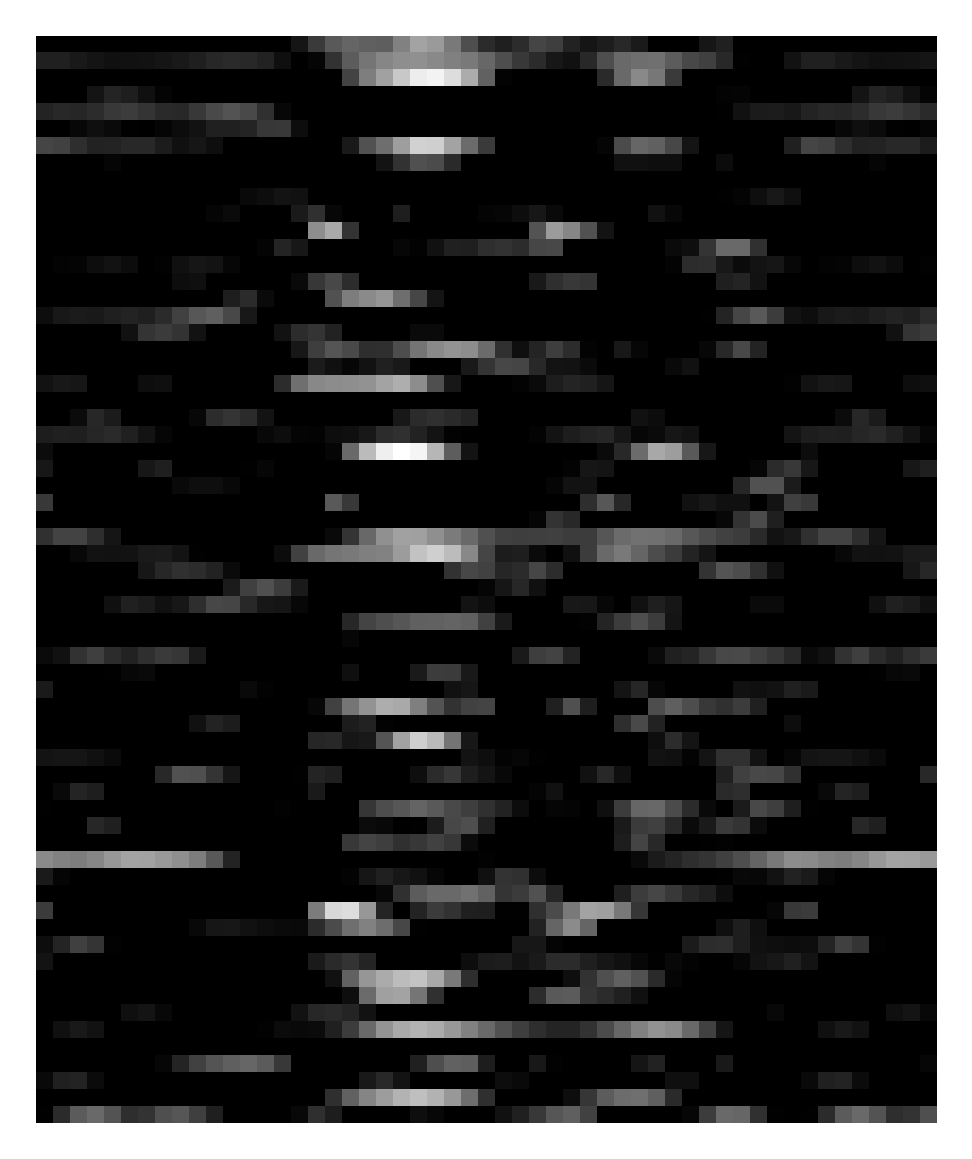

conv1d_19 (45, 64)


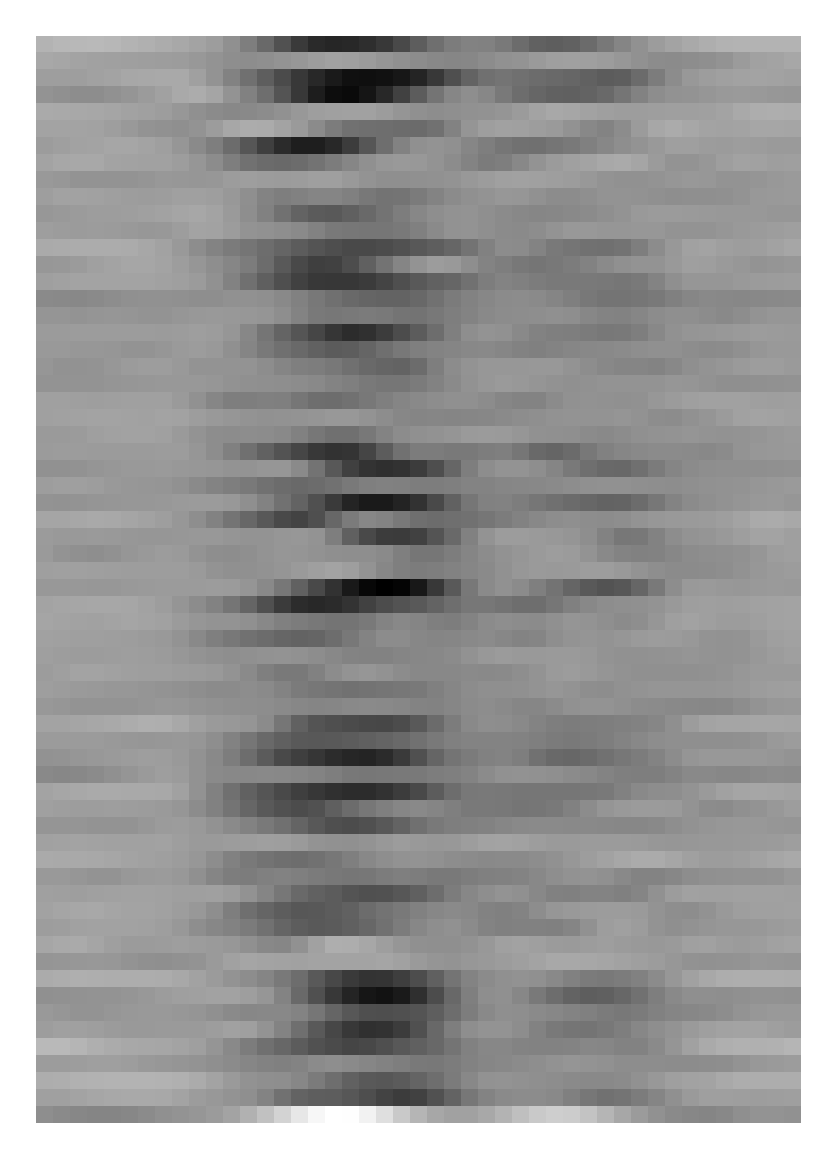

batch_normalization_19 (45, 64)


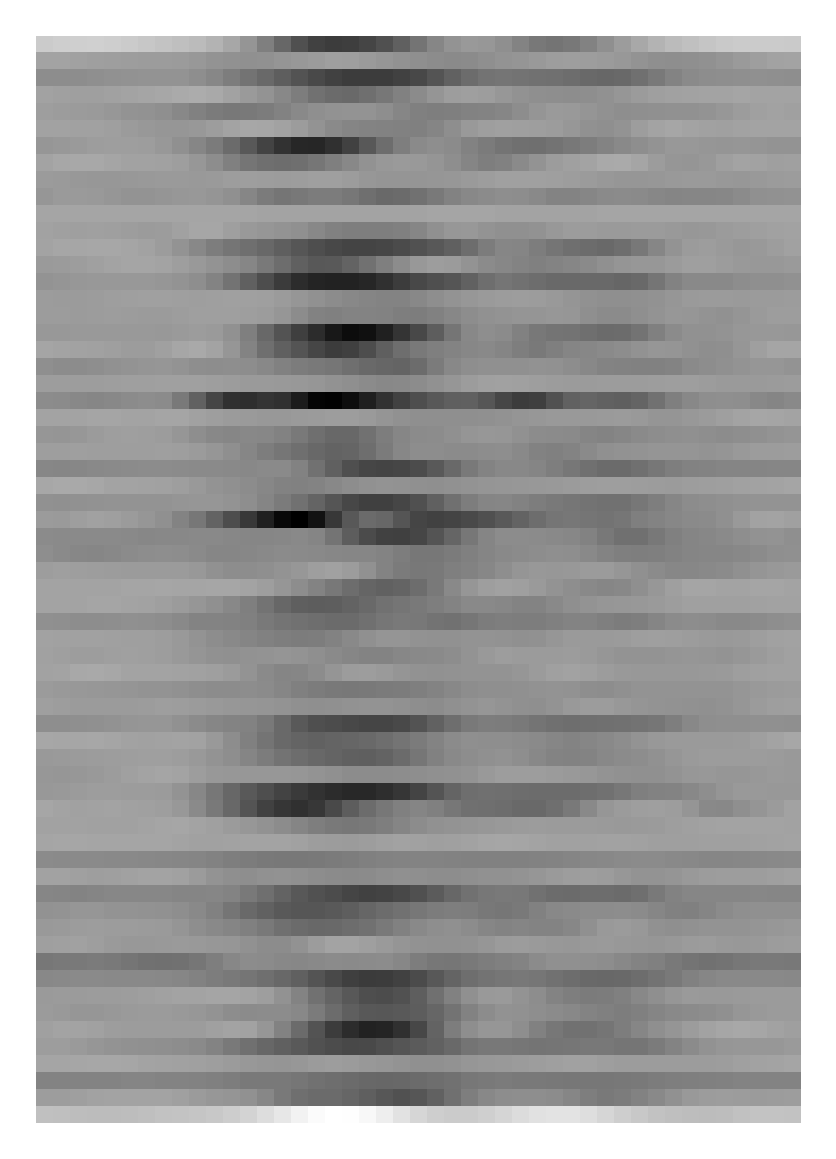

add_6 (45, 64)


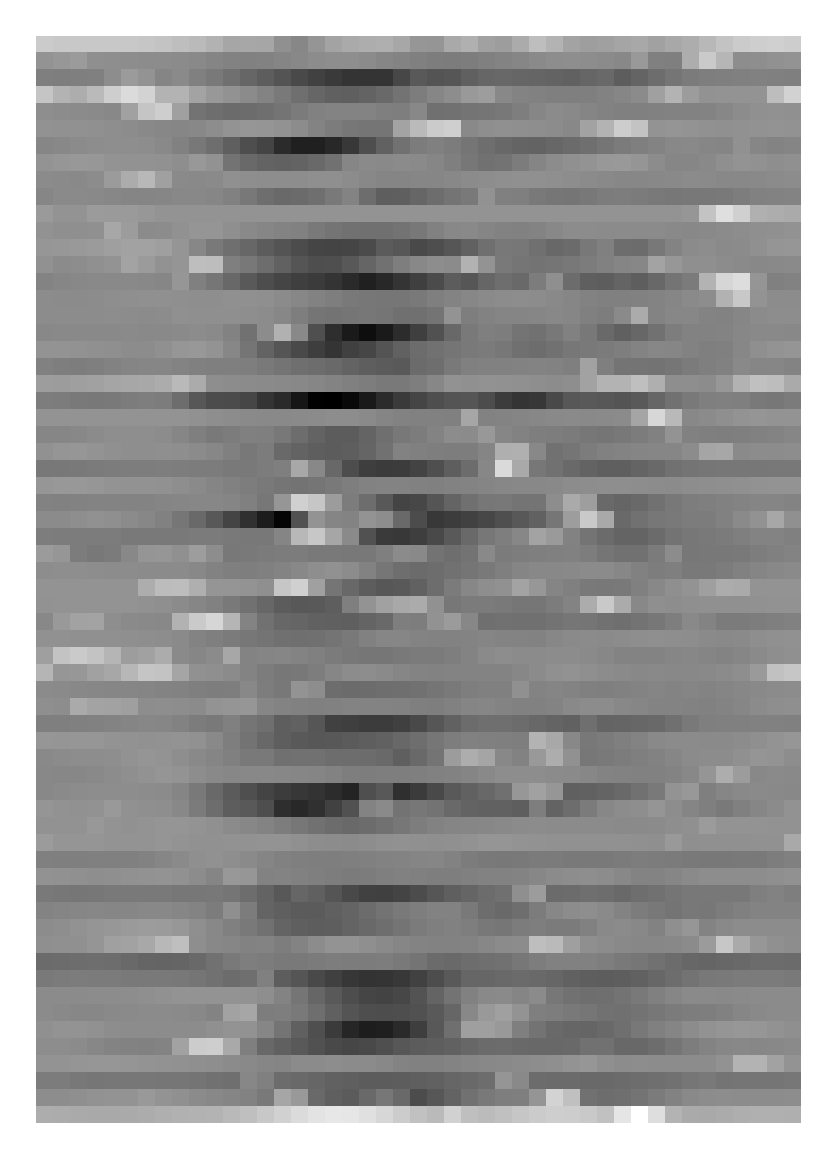

re_lu_19 (45, 64)


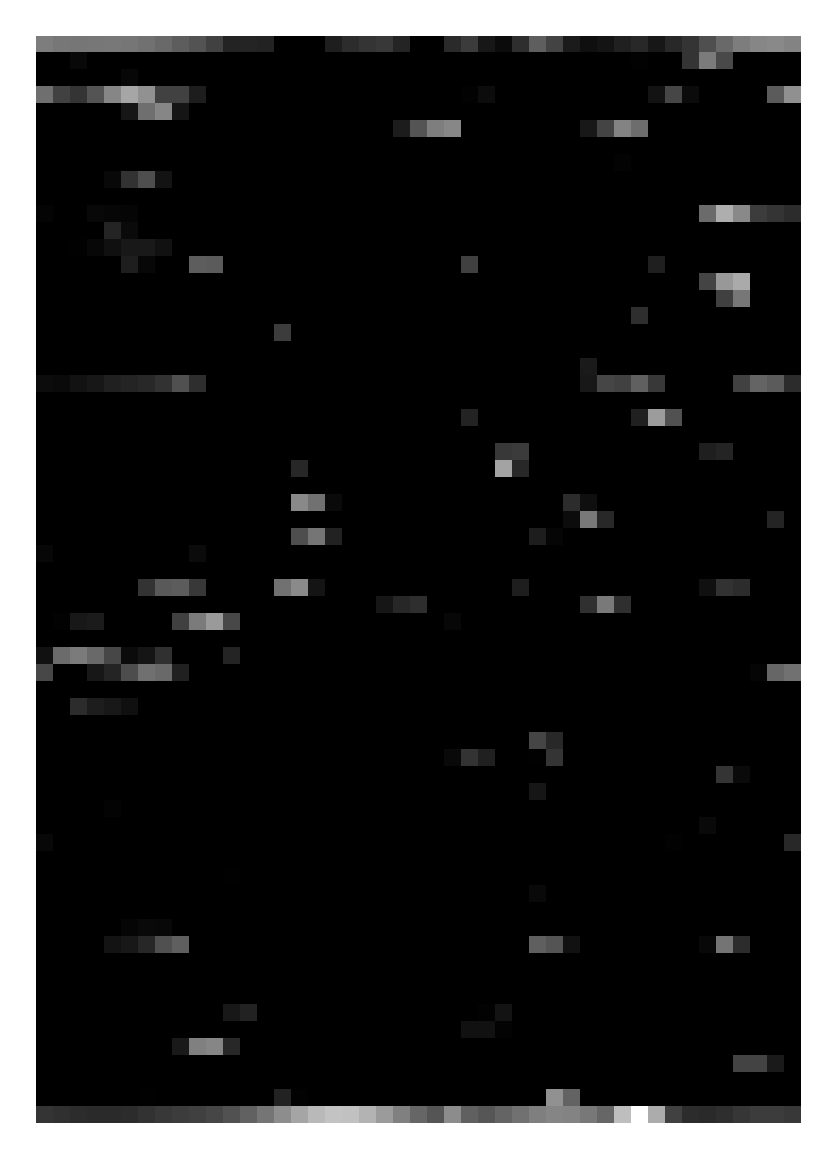

flatten (2880,)


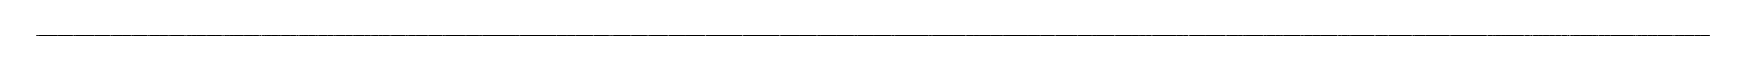

dense (128,)


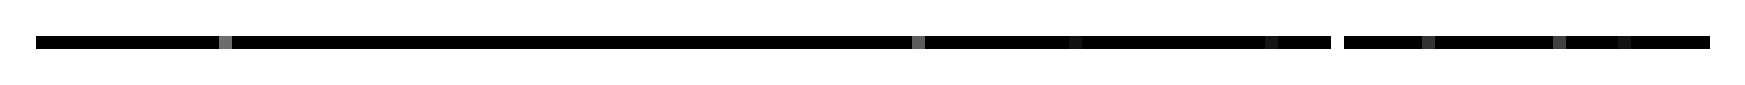

dense_1 (64,)


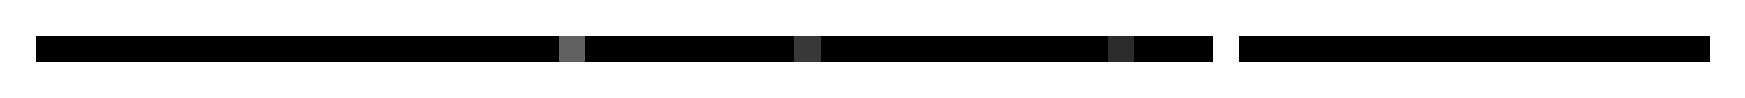

dense_2 (2,)


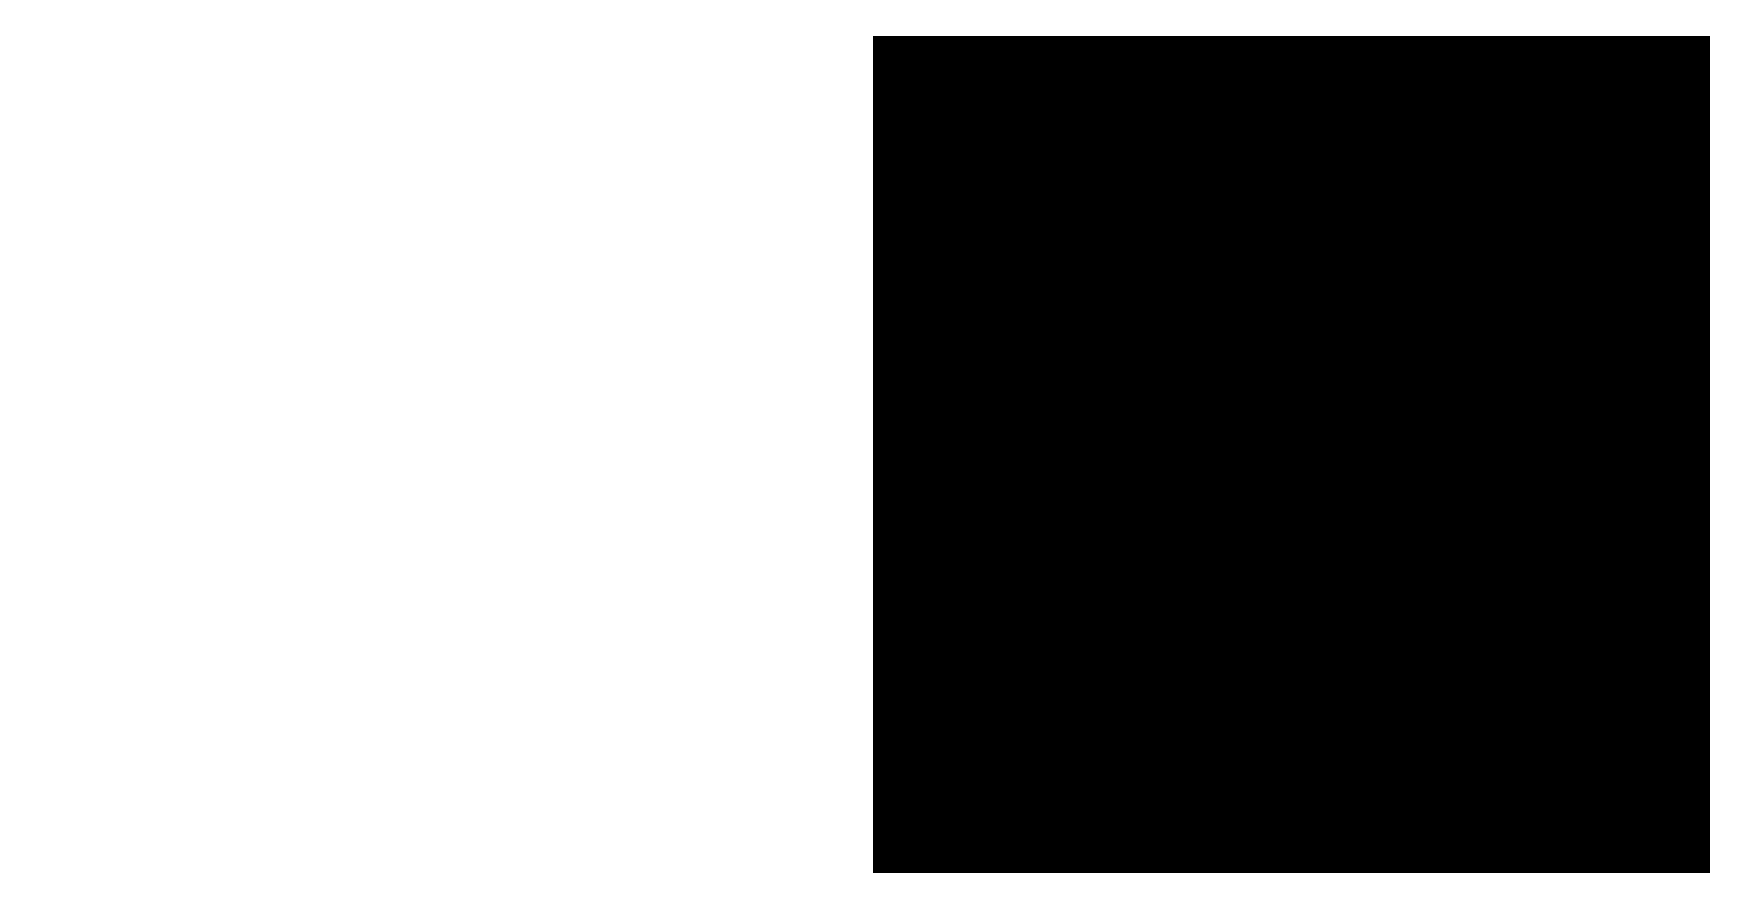

In [7]:
for layer in model.layers:
    #if "pooling" in layer.name:
    cut_model = Model(model.inputs, layer.output)
    output = np.squeeze(cut_model.predict(x[0:1]))
    if len(output.shape) == 2:
        plt.figure(dpi=360)
        plt.axis("off")
        plt.imshow(np.transpose(output), "gray")
        print(layer.name, output.shape)
        plt.show()

    elif len(output.shape) == 1:
        plt.figure(dpi=360)
        plt.axis("off")
        plt.imshow(np.expand_dims(output, axis=0), "gray")
        print(layer.name, output.shape)
        plt.show()